<a href="https://colab.research.google.com/github/samapatil1729/Machine-Learning-techniques/blob/main/MLT_Workbook_V0_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# MLT Workbook 

---
(work in progress)

- [Source 1](https://github.com/ananddotiyer)
- [Source 2](https://gist.github.com/CKPIITM/public)


# Code Practice:

---





###Week2:

####1. Functions:

---



In [ ]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from sklearn.model_selection import train_test_split

In [ ]:
def fit(X,y):
  pass
def loss(X,y, w):
  pass
def calculate_gradient(X,y, w):
  pass
def add_dummy_feature(X):
  pass
def preprocess(X,y):
  pass
def generate_data(n):
  pass
def predict(X,y,w):
  pass
def plot_learning_curves(loss):
  pass
def update_weights(w,grad,lr):
  pass
def learning_schedule(t):
  pass
def gradient_descent(X,y, lr, num_epochs):
  pass
def mbgd(X,y,num_epochs, batch_size):
  pass
def sgd(X,y,num_epochs):
  pass

#####Solution:

In [ ]:
def fit(X,y):
  return np.linalg.pinv(X)@y
def loss(X,y,w):
  e = X@w -y
  return 1/2 * e.T@e 

def calculate_gradient(X,y,w):
  return X.T@(X@w-y)

def update_weights(w,grad,lr):
  return (w - lr*grad)


def gradient_descent(X,y,lr,num_epochs):
  w_all = [] 
  err_all = []
  
  w = np.zeros((X.shape[1])) 
  for i in np.arange(0,num_epochs): 
    w_all.append(w) 
    err_all.append(loss(X,y,w))
    grad = calculate_gradient(X,y,w) 

    if (i%100==0):
      print('Iteration {0}#, loss {1:.2f} : '.format(i,err_all[-1])) 
      w = update_weights(w,grad,lr) 
  return w, err_all, w_all 

import numpy as np
from sklearn.model_selection import train_test_split
def generate_data(n=1000_000):
  w=np.array([4,3])
  X=10*np.random.rand(n)
  X=add_dummy_feature(X)
  noise=np.random.rand(n)
  y= X@w + noise
  return X,y 

def preprocess(X,y):
  X_train,y_train,X_test,y_test = train_test_split(X,y, test_size=0.2, random_state=42) 
  return X_train, y_train,X_test,y_test

def add_dummy_feature(X):
  return np.column_stack((np.ones(X.shape[0]),X))

def predict(X,w):
  return X@w

def plot_learning_curves(err_all):
  plt.plot(err_all)
  plt.xlabel('Iterations #') 
  plt.ylabel('Loss: $J(\mathbf{w})$')

def learning_schedule(t):
  t0,t1 = 200,100000 
  return t0/(t1+t) 

def mbgd(X,y,num_epochs,batch_size):
  w_all =[]
  err_all =[] 
  w = np.zeros((X.shape[1])) 
  t = 0 
  for epoch in range(num_epochs):
    shuffled_indices = np.random.permutation(X.shape[0]) 
    X_shuffled = X[shuffled_indices] 
    y_shuffled = y[shuffled_indices] 

    for i in range(0,X.shape[0],batch_size):
      t+=1
      xi= X_shuffled[i:i+batch_size]
      yi= y_shuffled[i:i+batch_size]

      err_all.append(loss(xi,yi,w))

      grad = 2/batch_size * calculate_gradient(xi,yi,w)
      lr = learning_schedule(t) 
      w = update_weights(w,grad,lr) 
      w_all.append(w) 
  return w ,err_all, w_all 

def sgd(X,y,num_epochs):
  w = np.zeros((X.shape[1])) 
  w_all = []
  err_all =[] 
    
  for epoch in range(num_epochs):
    for i in range(X.shape[0]):
      random_index = np.random.randint((X.shape[0])) 
      xi = X[random_index:random_index+1]
      yi = y[random_index:random_index+1] 
      err_all.append(loss(xi,yi,w))
      w_all.append(w)
      grad = 2* calculate_gradient(xi,yi,w)
      lr = learning_schedule(epoch*X.shape[0]+i)
      w = update_weights(w,grad,lr) 

  return w, err_all,w_all

      

####2. Class LinReg:

In [ ]:
class LinReg():

  def __init__(self):
    pass
  
  def fit(self,X,y):
    pass
  
  def predict(self,X):
    pass

  def loss(self,X,y):
    pass

  def rmse(self,X,y):
    return pass
  
  def calculate_gradient(self,X,y):
    pass

  def update_weight(self,grad,lr): 
    pass

  def learning_schedule(self,t):
    pass

  def gd(self,X,y,num_epochs,lr):
    pass

  def mbgd(self,X,y,num_epochs,batch_size):
    pass 

  def sgd(self,X,y,num_epochs):
    pass
         

#####Solution:

In [ ]:
class LinReg():
    def __init__(self):
        self.t0 = 200
        self.t1 = 100000
    def predict (self, X):
        y = X @ self.w
        return y
    def loss (self, X, y):
        e = y - self.predict(X)
        return 0.5 *(e.T @ e)
    def rmse(self,X, y):
        return np.sqrt(2/X.shape[0] * self.loss(X, y))
    def fit(self, X, y):
        self.w = np.linalg.pinv(X) @ y
        return self.w
    def calculate_gradient(self, X, y):
        return X.T @ (self.predict(X) - y)
    def update_weights(self, grad, lr):
        return (self.w - lr * grad)
    def learning_schedule(self, t):
        return self.t0 / (self.t0 + self.t1)
    def gd(self, X, y, num_epochs, lr):
        self.w = np.zeros(X.shape[1])
        self.w_all = list() 
        self.err_all = list()
        for i in range(epochs):
            dJdw = calculate_gradient(X, y)
            self.w_all.append(self.w)
            self.err_all.append(self.loss(X, y))
            self.w = self.update_weights(dJdw, lr)
        return self.w
    def mbgd(self, X, y, num_epochs, batch_size):
        mini_batch_id = 0
        self.w = np.zeros(X.shape[1])  #initializing arbitrary values.
        self.w_all = list() 
        self.err_all = list()

        for epoch in range(num_epochs):
            shuffled_indices = np.random.permutation(X.shape[0])
            X_shuffled = X[shuffled_indices]
            y_shuffled = y[shuffled_indices]

            for i in range(0, X.shape[0], batch_size):
                mini_batch_id += 1
                x1 = X_shuffled[i:i+batch_size]
                y1 = y_shuffled[i:i+batch_size]

                self.w_all.append(self.w)
                self.err_all.append(self.loss(X, y))

                dJdw = 2/batch_size * self.calculate_gradient(x1, y1)
                self.w = self.update_weights(dJdw, self.learning_schedule(mini_batch_id))

        return self.w
    
    def sgd(self, X, y, num_epochs):
        batch_size = 1
        mini_batch_id = 0
        self.w = np.zeros(X.shape[1])  #initializing arbitrary values.
        self.w_all = list() 
        self.err_all = list()

        for epoch in range(num_epochs):
            shuffled_indices = np.random.permutation(X.shape[0])
            X_shuffled = X[shuffled_indices]
            y_shuffled = y[shuffled_indices]

            for i in range(0, X.shape[0], batch_size):
                mini_batch_id += 1
                x1 = X_shuffled[i:i+batch_size]
                y1 = y_shuffled[i:i+batch_size]

                self.w_all.append(self.w)
                self.err_all.append(self.loss(X, y))

                dJdw = 2/batch_size * self.calculate_gradient(x1, y1)
                self.w = self.update_weights(dJdw, self.learning_schedule(mini_batch_id))

        return self.w

###Week3:

####1. Class LinReg (Ridge):

---



In [ ]:
class LinReg():
    def __init__(self):
      pass
    def predict (self, X):
      pass
    def loss (self, X, y, reg_rate):
      pass
    def rmse(self,X, y, reg_rate):
      pass
    def fit(self, X, y, reg_rate):
      pass
    def calculate_gradient(self, X, y, reg_rate):
      pass
    def update_weights(self, grad, lr):
      pass
    def learning_schedule(self, t):
      pass
    def gd(self, X, y, num_epochs, lr, reg_rate):
      pass
    def mbgd(self, X, y, num_epochs, batch_size):
      pass
    def sgd(self, X, y, num_epochs):
      pass

#####Solution:



In [ ]:
class LinReg():
    def __init__(self):
        self.t0 = 200
        self.t1 = 100000
    def predict (self, X):
        y = X @ self.w
        return y
    def loss (self, X, y, reg_rate):
        e = y - self.predict(X)
        return 0.5 *(e.T @ e) + (reg_rate/2) * (np.transpose(self.w) @ self.w)
    def rmse(self,X, y, reg_rate):
        return np.sqrt(2/X.shape[0] * self.loss(X, y, reg_rate))
    def fit(self, X, y, reg_rate):
#         self.w = np.linalg.pinv(X) @ y
        eye = np.eye(X.shape[1])
        self.w = np.linalg.solve(X.T @ X + reg_rate * eye, X.T @ y)
        return self.w
    def calculate_gradient(self, X, y, reg_rate):
        return X.T @ (self.predict(X) - y) + reg_rate * self.w
    def update_weights(self, grad, lr):
        return (self.w - lr * grad)
    def learning_schedule(self, t):
        return self.t0 / (self.t0 + self.t1)
    def gd(self, X, y, num_epochs, lr, reg_rate):
        self.w = np.zeros(X.shape[1])
        self.w_all = list() 
        self.err_all = list()
        for i in range(num_epochs):
            dJdw = self.calculate_gradient(X, y, reg_rate)
            self.w_all.append(self.w)
            self.err_all.append(self.loss(X, y, reg_rate))
            self.w = self.update_weights(dJdw, lr)
        return self.w
    def mbgd(self, X, y, num_epochs, batch_size):
        mini_batch_id = 0
        self.w = np.zeros(X.shape[1])  #initializing arbitrary values.
        self.w_all = list() 
        self.err_all = list()

        for epoch in range(num_epochs):
            shuffled_indices = np.random.permutation(X.shape[0])
            X_shuffled = X[shuffled_indices]
            y_shuffled = y[shuffled_indices]

            for i in range(0, X.shape[0], batch_size):
                mini_batch_id += 1
                x1 = X_shuffled[i:i+batch_size]
                y1 = y_shuffled[i:i+batch_size]

                self.w_all.append(self.w)
                self.err_all.append(self.loss(X, y))

                dJdw = 2/batch_size * self.calculate_gradient(x1, y1)
                self.w = self.update_weights(dJdw, self.learning_schedule(mini_batch_id))

        return self.w
    
    def sgd(self, X, y, num_epochs):
        batch_size = 1
        mini_batch_id = 0
        self.w = np.zeros(X.shape[1])  #initializing arbitrary values.
        self.w_all = list() 
        self.err_all = list()

        for epoch in range(num_epochs):
            shuffled_indices = np.random.permutation(X.shape[0])
            X_shuffled = X[shuffled_indices]
            y_shuffled = y[shuffled_indices]

            for i in range(0, X.shape[0], batch_size):
              mini_batch_id += 1
                x1 = X_shuffled[i:i+batch_size]
                y1 = y_shuffled[i:i+batch_size]

                self.w_all.append(self.w)
                self.err_all.append(self.loss(X, y))

                dJdw = 2/batch_size * self.calculate_gradient(x1, y1)
                self.w = self.update_weights(dJdw, self.learning_schedule(mini_batch_id))

        return self.w

####2. Class LinReg (Lasso):

---



In [ ]:
class LinReg():
    def __init__(self):
      pass
    def predict (self, X):
      pass
    def loss (self, X, y, reg_rate):
      pass
    def rmse(self,X, y, reg_rate):
      pass
    def fit(self, X, y, reg_rate):
      pass
    def calculate_gradient(self, X, y, reg_rate):
      pass
    def update_weights(self, grad, lr):
      pass
    def learning_schedule(self, t):
      pass
    def gd(self, X, y, num_epochs, lr, reg_rate):
      pass
    def mbgd(self, X, y, num_epochs, batch_size):
      pass
    def sgd(self, X, y, num_epochs):
      pass

#####Solution:



####3. Class LinReg (Multi Output + Ridge):

---



In [ ]:
class LinReg():
    def __init__(self):
      pass
    def predict (self, X):
      pass
    def loss (self, X, y, reg_rate):
      pass
    def rmse(self,X, y, reg_rate):
      pass
    def fit(self, X, y, reg_rate):
      pass
    def calculate_gradient(self, X, y, reg_rate):
      pass
    def update_weights(self, grad, lr):
      pass
    def learning_schedule(self, t):
      pass
    def gd(self, X, y, num_epochs, lr, reg_rate):
      pass
    def mbgd(self, X, y, num_epochs, batch_size):
      pass
    def sgd(self, X, y, num_epochs):
      pass

#####Solution:



In [ ]:
class LinReg():
    def __init__(self):
        self.t0 = 200
        self.t1 = 100000
    def predict (self, X):
        y = X @ self.w
        return y
    def loss (self, X, y, reg_rate):
        e = y - self.predict(X)
        return 0.5 *(e.T @ e) + (reg_rate/2) * (np.transpose(self.w) @ self.w)
    def rmse(self,X, y, reg_rate):
        return np.sqrt(2/X.shape[0] * self.loss(X, y, reg_rate))
    def fit(self, X, y, reg_rate):
#         self.w = np.linalg.pinv(X) @ y
        eye = np.eye(X.shape[1])
        self.w = np.linalg.solve(X.T @ X + reg_rate * eye, X.T @ y)
        return self.w
    def calculate_gradient(self, X, y, reg_rate):
        return X.T @ (self.predict(X) - y) + reg_rate * self.w
    def update_weights(self, grad, lr):
        return (self.w - lr * grad)
    def learning_schedule(self, t):
        return self.t0 / (self.t0 + self.t1)
    def gd(self, X, y, num_epochs, lr, reg_rate):
        self.w = np.zeros((X.shape[1], y.shape[1]))
        self.w_all = list() 
        self.err_all = list()
        for i in range(num_epochs):
            dJdw = self.calculate_gradient(X, y, reg_rate)
            self.w_all.append(self.w)
            self.err_all.append(self.loss(X, y, reg_rate))
            self.w = self.update_weights(dJdw, lr)
        return self.w
    def mbgd(self, X, y, num_epochs, batch_size):
        mini_batch_id = 0
        self.w = np.zeros(X.shape[1])  #initializing arbitrary values.
        self.w_all = list() 
        self.err_all = list()

        for epoch in range(num_epochs):
            shuffled_indices = np.random.permutation(X.shape[0])
            X_shuffled = X[shuffled_indices]
            y_shuffled = y[shuffled_indices]

            for i in range(0, X.shape[0], batch_size):
                mini_batch_id += 1
                x1 = X_shuffled[i:i+batch_size]
                y1 = y_shuffled[i:i+batch_size]

                self.w_all.append(self.w)
                self.err_all.append(self.loss(X, y))

                dJdw = 2/batch_size * self.calculate_gradient(x1, y1)
                self.w = self.update_weights(dJdw, self.learning_schedule(mini_batch_id))

        return self.w
    
    def sgd(self, X, y, num_epochs):
        batch_size = 1
        mini_batch_id = 0
        self.w = np.zeros(X.shape[1])  #initializing arbitrary values.
        self.w_all = list() 
        self.err_all = list()

        for epoch in range(num_epochs):
            shuffled_indices = np.random.permutation(X.shape[0])
            X_shuffled = X[shuffled_indices]
            y_shuffled = y[shuffled_indices]

            for i in range(0, X.shape[0], batch_size):
                mini_batch_id += 1
                x1 = X_shuffled[i:i+batch_size]
                y1 = y_shuffled[i:i+batch_size]

                self.w_all.append(self.w)
                self.err_all.append(self.loss(X, y))

                dJdw = 2/batch_size * self.calculate_gradient(x1, y1)
                self.w = self.update_weights(dJdw, self.learning_schedule(mini_batch_id))

        return self.w

###Week4:

#### 1. Helper functions:

---



In [ ]:
def combinations(x, degree):
  pass

In [ ]:
def compute_new_features(items):
  pass

In [ ]:
def polynomial_transform(x, degree):
  pass

In [ ]:
def encode(arr):
  pass

#####Solution:

---



In [ ]:
def combinations(x, degree):
    return itertools.combinations_with_replacement(x, degree)

In [ ]:
def compute_new_features(items):
    return functools.reduce(lambda x, y: x * y, items)

In [ ]:
def polynomial_transform(x, degree):
    if x.ndim == 1:
        x = x[:, None]

    features = [np.ones(len(x))] #a list of np-arrays with all 1.

    for degree in range(1, degree + 1):
        for item in combinations(x.T, degree):
            features.append(compute_new_features(item))
            
    return np.asarray(features).T

In [ ]:
def encode(arr):
    encoded = np.zeros((arr.size, arr.max() + 1))
    encoded[np.arange(arr.size), arr] = 1
    return encoded

In [ ]:
def plot_learning_curve(err_all):
    err = [err[1][1] for err in err_all]
    plt.plot(np.arange(len(err)), err, 'r-')

In [ ]:
def preprocess(add_class=False, add_outliers=False, degree=1):
    x, y = create_toy_data(add_outliers, add_class)
    x_poly = polynomial_transform(x, degree=degree)
    x_train, x_test, y_train, y_test = train_test_split(x_poly, y) 
    y_train_trans = LabelTransformer().encode(y_train)
    y_test_trans = LabelTransformer().encode(y_test)
    return x_train , x_test, y_train, y_test, y_train_trans, y_test_trans 

In [ ]:
def create_toy_data(add_outliers=False, add_class=False):
    x0 = np.random.normal(size=50).reshape(-1,2) - 1
    x1 = np.random.normal(size=50).reshape(-1,2) + 1
    if add_outliers:  # add 5 (pairs of (x, y)) outliers
        x_1 = np.random.normal(size=10).reshape(-1,2) + np.array([5., 10.])
        return np.concatenate((x0, x1, x_1)), np.concatenate((np.zeros(25), np.ones(30))).astype(int)
    if add_class: #add 25 (pairs of (x, y) additional data)
        x2 = np.random.normal(size=50).reshape(-1,2) + 2
        return np.concatenate((x0, x1, x2)), np.concatenate((np.zeros(25), np.ones(25), 2 + np.zeros(25))).astype(int)
    return np.concatenate((x0, x1)), np.concatenate((np.zeros(25), np.ones(25))).astype(int)

In [ ]:
sns.set_context(context='notebook',font_scale=1.5,rc={"lines.linewidth":2.5})

def visualize_model(X_train, labels, lsc, degree=1):
#     sns.set_style("white")
    f = plt.figure(figsize=(8,8))

    x1_min = np.min(x_train[:,1])
    x1_max = np.max(x_train[:,1])
    x2_min = np.min(x_train[:,2])
    x2_max = np.max(x_train[:,2])
    
    x1_test, x2_test = np.meshgrid(np.linspace(x1_min, x1_max, 100), np.linspace(x2_min, x2_max, 100)) 
    x_test = np.array([x1_test, x2_test]).reshape(2,-1).T
    x_test_poly = polynomial_transform(x_test, degree=degree)
    y_test = lsc.predict(x_test_poly)
    
    sns.scatterplot(data=x_train, x=x_train[:,1], y=x_train[:,2], hue=labels)
    plt.contourf(x1_test, x2_test, y_test.reshape(100,100), alpha=0.5, levels=np.linspace(0,1,3))
    plt.gca().set_aspect('equal', adjustable='box')

####2.LinReg (Least Square Classification)

---



In [ ]:
class LeastSquareClassification(object):
  def __init__(self):
    self.t0=20
    self.t1=1000
  
  def predict(self,X):
    return np.argmax(X @ self.w, axis=-1)

  def predict_internal(self,X):
    return X @ self.w
  
  def loss(self,X,y,reg_rate):
    y_hat = self.predict_internal(X)
    err = y_hat - y
    return (1/2) * (err.T @ err) + (reg_rate / 2) * (self.w.T @ self.w)

  def fit(self,X, y, reg_rate=0):
    self.w = np.linalg.solve(X.T @ X + reg_rate * np.eye(X.shape[-1]), X.T@y)
    print(X.shape, y.shape, self.w.shape)
    return self.w
  
  def calculate_gradient(self, X, y, reg_rate):
    y_hat = self.predict_internal(X)
    return X.T @ (y_hat - y) + reg_rate * self.w
  
  def weight_updates(self, grad,lr):
    return (self.w - lr*grad)
  
  def learning_schedule(self, t):
    return self.t0 / (t + self.t1)
  
  def gd(self, X, y, num_epochs, lr, reg_rate):
    self.w = np.zeros((X.shape[-1], y.shape[-1]))
    self.w_all = []
    self.err_all = []
    for i in np.arange(0, num_epochs):
      djdw = self.calculate_gradient(X, y, reg_rate)
      self.w_all.append(self.w)
      self.err_all.append(self.loss(X, y, reg_rate))
      self.w = self.weight_updates(djdw, lr)
    return self.w
  
  def sgd(self, X, y, num_epochs, reg_rate):
    self.err_all = []
    self.w_all = []
    self.w=np.zeros((X.shape[-1], y.shape[-1]))
    t=0
    for epoch in range(num_epochs):
      for iter in range(X.shape[0]):
        t = t+1
        random_index = np.random.randint(X.shape[0])
        x1 = X[random_index:random_index+1]
        y1 = y[random_index:random_index+1]

        self.w_all.append(self.w)
        self.err_all.append(self.loss(x1, y1, reg_rate))

        djdw = self.calculate_gradient(x1, y1, reg_rate)
        self.w = self.weight_updates(djdw, self.learning_schedule(t))
    return self.w

####3.Evaluation Metrics

---



In [ ]:
y_test_hat = lsc.predict(x_test)

tp = np.where((y_test == 1) & (y_test_hat == 1), 1, 0).sum()
tn = np.where((y_test == 0) & (y_test_hat == 0), 1, 0).sum()
fp = np.where((y_test == 0) & (y_test_hat == 1), 1, 0).sum()
fn = np.where((y_test == 1) & (y_test_hat == 0), 1, 0).sum()

def precision(tp, fp):
  if (tp + fp) == 0:
    return NaN
  return tp / (tp + fp)
def recall(tp,fn):
  if (tp+fn) ==0:
    return NaN
  return tp / tp +fn
def f1_score(pr,re):
  return 2 * ((pr * re)/(pr + re))
def accuracy(tp,fp,fn,tn):
  return (tp + tn) / (tp + tn + fp + fn)


###Week5: (Logistic Regression)

#### 1. Functions:

---



In [ ]:
def linear_combination(X, w):
    pass

def sigmoid(z):
    pass

def activation(X, w):
    pass

def predict(X, w, threshold):
    pass

def loss(y, sigmoid_vector, weight_vector, l1_reg_rate, l2_reg_rate):
    pass

def calculate_gradient(X, y, w, reg_rate):
    pass

#####Solution:

In [ ]:
def linear_combination(X, w):
    return X @ w

def sigmoid(z):
    return 1 / (1 + np.exp(-z))

def activation(X, w):
    return sigmoid(linear_combination(X, w))

def predict(X, w, threshold):
    return np.where(activation(X, w) > threshold, 1, 0)

def loss(y, sigmoid_vector, weight_vector, l1_reg_rate, l2_reg_rate):
    loss_orig = -1 * np.sum(y * np.log(sigmoid_vector) + (1 - y) * np.log(1 - sigmoid_vector))
    l2_reg = l2_reg_rate * np.dot(weight_vector.T, weight_vector)
    l1_reg = l1_reg_rate * np.sum(np.abs(weight_vector))
    return loss_orig + l1_reg + l2_reg

def calculate_gradient(X, y, w, reg_rate):
    return X.T @ (sigmoid(linear_combination(X, w)) - y) + reg_rate * w

#### 2. Class :LogisticRegression

---



In [ ]:
class LogisticRegression():
    def set_weight_vector(self, w):
        pass
    def linear_combination(self, X):
        pass
    def sigmoid(self, z):
        pass
    def activation(self, X):
        pass
    def predict(self, X, threshold=0.5):
        pass
    def loss(self, X, y, reg_rate):
        pass
    def calculate_gradient(self, X, y, reg_rate):
        pass
    def update_weights(self, grad, lr):
        pass
    def gd(self, X, y, num_epochs, lr, reg_rate):
        pass

#####Solution:

In [ ]:
class LogisticRegression():
    def set_weight_vector(self, w):
        self.w = w
    def linear_combination(self, X):
        return X @ self.w
    def sigmoid(self, z):
        return 1 / (1 + np.exp(-z))
    def activation(self, X):
        return self.sigmoid(self.linear_combination(X))
    def predict(self, X, threshold=0.5):
        return np.where(self.activation(X) > threshold, 1, 0)
    def loss(self, X, y, reg_rate):
        sigmoid_vector = self.activation(X)
        loss_orig = -1 * np.sum(y * np.log(sigmoid_vector) + (1 - y) * np.log(1 - sigmoid_vector))
        reg = reg_rate * np.dot(self.w.T, self.w)
        return loss_orig + reg
    def calculate_gradient(self, X, y, reg_rate):
        return X.T @ (self.activation(X) - y) + reg_rate * self.w
    def update_weights(self, grad, lr):
        return self.w - grad * lr
    def gd(self, X, y, num_epochs, lr, reg_rate):
        self.w = np.zeros(X.shape[1])
        self.w_all = []
        self.err_all = []
        for i in range(num_epochs):
            grad = self.calculate_gradient(X, y, reg_rate)
            self.w_all.append(self.w)
            self.err_all.append(self.loss(X, y, reg_rate))
            self.w = self.update_weights(grad, lr)
        return self.w

#### 3. Others:

---



In [ ]:
import itertools, functools
def combinations(x, degree):
    pass

def compute_new_features(items):
    pass

def polynomial_transform(x, degree):
    pass

def plot_learning_curve(err):
    pass

#####Solution:

In [ ]:
import itertools, functools
def combinations(x, degree):
    return itertools.combinations_with_replacement(x, degree)

def compute_new_features(items):
    return functools.reduce(lambda x, y: x * y, items)

def polynomial_transform(x, degree):
    if x.ndim == 1:
        x = x[:, None]

    features = [np.ones(len(x))] #a list of np-arrays with all 1.

    for degree in range(1, degree + 1):
        for item in combinations(x.T, degree):
            features.append(compute_new_features(item))
            
    return np.asarray(features).T
def plot_learning_curve(err):
    plt.plot(np.arange(len(err)), err, 'r-')

#### 4. Optional:

---



In [ ]:
def create_toy_data():
    pass

sns.set_context(context='notebook',font_scale=1.5,rc={"lines.linewidth":2.5})

def visualize_model(X_train, labels, lsc, degree=1):
    pass

#####Solution:

In [ ]:
def create_toy_data():
    x0 = np.random.normal(size=50).reshape(-1, 2) - 1
    x1 = np.random.normal(size=50).reshape(-1, 2) + 1
    return np.concatenate([x0, x1]), np.concatenate([np.zeros(25), np.ones(25)]).astype(np.int)

sns.set_context(context='notebook',font_scale=1.5,rc={"lines.linewidth":2.5})

def visualize_model(X_train, labels, lsc, degree=1):
    f = plt.figure(figsize=(8,8))

    x1_min = np.min(x_train[:,1])
    x1_max = np.max(x_train[:,1])
    x2_min = np.min(x_train[:,2])
    x2_max = np.max(x_train[:,2])
    
    x1_test, x2_test = np.meshgrid(np.linspace(x1_min, x1_max, 100), np.linspace(x2_min, x2_max, 100)) 
    x_test = np.array([x1_test, x2_test]).reshape(2,-1).T
    x_test_poly = polynomial_transform(x_test, degree=degree)
    y_test = lsc.predict(x_test_poly, 0.5)
    
    sns.scatterplot(data=x_train, x=x_train[:,1], y=x_train[:,2], hue=labels)
    plt.contourf(x1_test, x2_test, y_test.reshape(100,100), alpha=0.5, levels=np.linspace(0,1,3))
    plt.gca().set_aspect('equal', adjustable='box')

###Week6:(Naive Bayes)

#### 1. Bernoulli Naive Bayes:

---



In [ ]:
def fit(X, y):
  pass


In [ ]:
from types import prepare_class
class BernoulliNB():
    def __init__(self, alpha=1.0):
      pass
    def fit(self, X, y):
      pass
    def log_likelihood_prior_prod(self, X):
      pass    
    def predict_proba(self, X):
      pass
    def predict(self, X):
      pass

#####Solution:

---



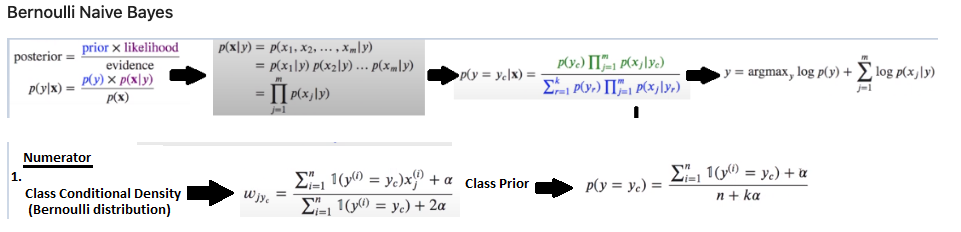

In [ ]:
def fit(X, y):
    alpha = 1 #Laplace correction
    n_samples, n_features = X.shape
    n_classes = len(np.unique(y))
    w = np.zeros((n_classes, n_features), dtype=np.float64)
    w_priors = np.zeros(n_classes, dtype=np.float64)
    
    for c in range(n_classes):
        X_c = X[y == c]
        w[c, :] = (np.sum(X_c, axis=0) + alpha) / (X_c.shape[0] + n_classes * alpha)
        w_priors[c] = (X_c.shape[0] + alpha) / (float(n_samples) + n_classes * alpha)
        
    print("Weight vector:", w)
    print("Prior", w_priors)
    return w, w_priors

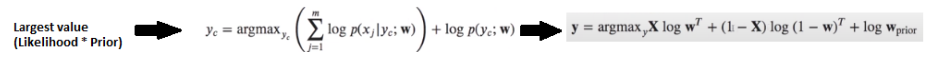

In [ ]:
return X @ (np.log(self.w).T) + (1 - X) @ np.log((1 - self.w).T) + np.log(self.w_priors)


In [ ]:
class BernoulliNB():
    def __init__(self, alpha=1.0):
        self.alpha = alpha
    def fit(self, X, y):
        n_samples, n_features = X.shape
        n_classes = len(np.unique(y))
        self.w = np.zeros((n_classes, n_features), dtype=np.float64)
        self.w_priors = np.zeros(n_classes, dtype=np.float64)

        for c in range(n_classes):
            X_c = X[y == c]
            self.w[c, :] = (np.sum(X_c, axis=0) + self.alpha) / (X_c.shape[0] + n_classes * self.alpha)
            self.w_priors[c] = (X_c.shape[0] + self.alpha) / (float(n_samples) + n_classes * self.alpha)

        print("Class Conditional Density:", self.w)
        print("Prior", self.w_priors)

    def log_likelihood_prior_prod(self, X):
        return X @ (np.log(self.w).T) + (1 - X) @ np.log((1 - self.w).T) + np.log(self.w_priors)
    
    def predict_proba(self, X):
        q = self.log_likelihood_prior_prod(X)
        return np.exp(q) / np.expand_dims(np.sum(np.exp(q), axis=1), axis=1)
    
    def predict(self, X):
        q = self.log_likelihood_prior_prod(X)
        return np.argmax(q, axis=1)

#### 2. Gaussian Naive Bayes:


---



In [ ]:
class GaussianNB():
    def __init__(self, alpha=1.0):
      pass
    def fit(self, X, y):
      pass
       
    def _calc_pdf(self, class_idx, X):
      pass

    def _calc_prod_likelihood_prior(self, X):
      pass
    
    def predict_proba(self, X):
      pass
    
    def predict(self, X):
      pass

#####Solution:

---



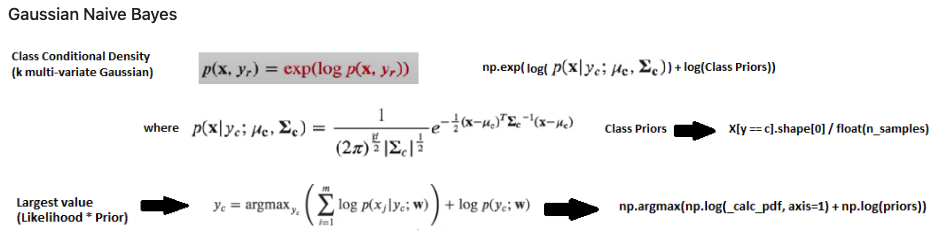

In [ ]:
class GaussianNB():
    def __init__(self, alpha=1.0):
        self.alpha = alpha
    def fit(self, X, y):
        n_samples, n_features = X.shape
        self._classes = np.unique(y)
        n_classes = len(self._classes)
        self._mean = np.zeros((n_classes, n_features), dtype=np.float64)
        self._var = np.zeros((n_classes, n_features), dtype=np.float64)
        self._priors = np.zeros(n_classes, dtype=np.float64)

        for idx, c in enumerate(self._classes):
            X_c = X[y == c]
            self._mean[idx, :] = X_c.mean(axis=0)
            self._var[c] = X_c.var(axis=0)
            self._priors[idx] = X_c.shape[0] / float(n_samples)

        print("Mean:", self._mean)
        print("Variance:", self._var)
        print("Prior", self._priors)
    
    def _calc_pdf(self, class_idx, X):
        mean = self._mean[class_idx]
        var = np.diag(self._var[class_idx])
        z = np.power(2 * np.pi, X.shape[0] / 2) * np.power(np.linalg.det(var), 1/2)
        return (1/z) * np.exp(-0.5 * (X - mean).T @ (np.linalg.inv(var)) @ (X - mean))
    
    def _calc_prod_likelihood_prior(self, X):
        self.q = np.zeros((X.shape[0], len(self._classes)), dtype=np.float64)
        for x_idx, x in enumerate(X):
            for idx, c in enumerate(self._classes):
                self.q[x_idx, c] = (np.log(self._calc_pdf(idx, x)) 
                                                         + np.log(self._priors[idx]))
    
    def predict_proba(self, X):
        self._calc_prod_likelihood_prior(X)
        return np.exp(self.q) / np.expand_dims(np.sum(np.exp(self.q), axis=1), axis=1)
    
    def predict(self, X):
        self._calc_prod_likelihood_prior(X)
        return np.argmax(self.q, axis=1)

#### 3. Multinomial Naive Bayes:


---



In [ ]:
class MultinomialNB():
    def __init__(self, alpha=1.0):
      pass
        
    def fit(self, X, y):
      pass
    def log_likelihood_prior_prod(self, X):
      pass
    
    def predict_proba(self, X):
      pass
    
    def predict(self, X):
      pass

#####Solution:

---



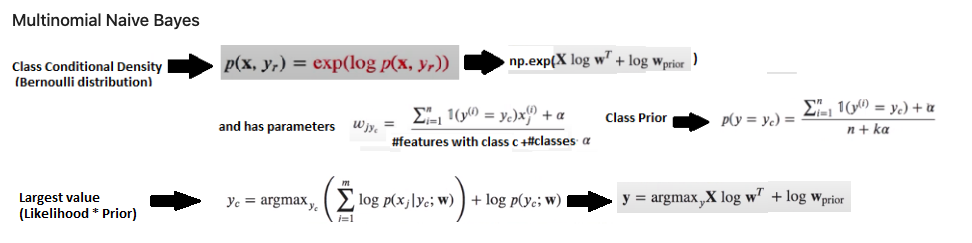

In [ ]:
class MultinomialNB():
    def __init__(self, alpha=1.0):
        self.alpha = alpha
        
    def fit(self, X, y):
        n_samples, n_features = X.shape
        self._classes = np.unique(y)
        n_classes = len(self._classes)
        self.w = np.zeros((n_classes, n_features), dtype=np.float64)
        self.w_priors = np.zeros(n_classes, dtype=np.float64)

        for idx, c in enumerate(self._classes):
            X_c = X[y == c]
            total_count = np.sum(np.sum(X_c, axis=1))
            self.w[idx, :] = (np.sum(X_c, axis=0) + self.alpha) / (total_count + n_classes * self.alpha)
            self.w_priors[idx] = (X_c.shape[0] + self.alpha) / (float(n_samples) + n_classes * self.alpha)

    def log_likelihood_prior_prod(self, X):
        return X @ (np.log(self.w).T) + np.log(self.w_priors)
    
    def predict_proba(self, X):
        q = self.log_likelihood_prior_prod(X)
        return np.exp(q) / np.expand_dims(np.sum(np.exp(q), axis=1), axis=1)
    
    def predict(self, X):
        q = self.log_likelihood_prior_prod(X)
        return np.argmax(q, axis=1)

###Week7:(Softmax Regression, KNN)

#### 1. :One Hot Encoding

---



In [ ]:
# For softmax regression, we've to one-hot encode y
def convert_to_one_hot_encoding(y, k):
  pass

#####Solution:

---



In [ ]:
def lbl_zero_index(y):
  y_unique = list(set(y))
  y_sort = sorted(y_unique)
  for i in range(len(y)):
    y[i] = y_sort.index(y[i])
  return y

def convert_to_one_hot_encoding(y, k):
    y = lbl_zero_index(y)
    y_one_hot = np.zeros((len(y), k))
    y_one_hot[np.arange(len(y)), y] = 1
    return y_one_hot

#Test:
y=np.array([1,2,1,3])
k = len(np.unique(y))
convert_to_one_hot_encoding(y, k)

#### 2. Functions :(Softmax Regression)

---



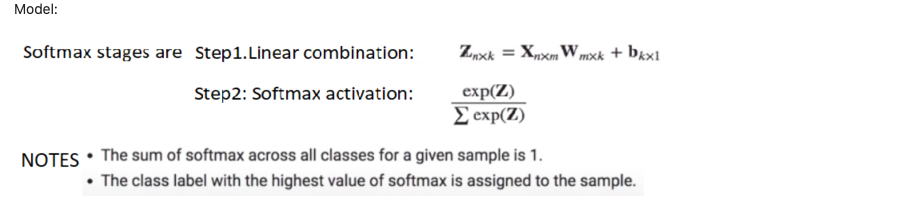

In [ ]:
def linear_combination(X, w, b):
    pass
def softmax(z):
    pass


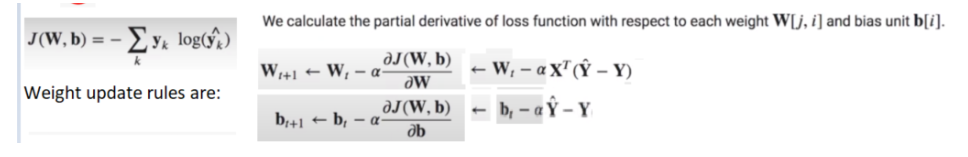

In [ ]:
def fit(X, y, lr, k, epochs):
    pass

def predict(X, w, b):
    pass

def accuracy(y, y_hat):
    pass



#####Solution:

---



In [ ]:
def linear_combination(X, w, b):
    return X @ w + b
def softmax(z):
    # subtracting max of z for numerical stability
    exp = np.exp(z - np.max(z))
    for i in range(len(z)):
        exp[i] /= np.sum(exp[i])
    
    return exp


In [ ]:
def fit(X, y, lr, k, epochs):
    n, m = X.shape
    
    w = np.random.random((m, k))
    b = np.random.random(k)
    
    losses = []
    
    for epoch in range(epochs):
        z = linear_combination(X, w, b)
        y_hat = softmax(z)
        y_hot = convert_to_one_hot_encoding(y, k)
        
        w_grad = (1/n) * (X.T @ (y_hat - y_hot))
        b_grad = (1/n) * np.sum(y_hat - y_hot)
        
        w = w - lr * w_grad
        b = b - lr * b_grad
        
        loss = -np.mean(np.log(y_hat[np.arange(len(y)), y]))
        losses.append(loss)
    return w, b, losses

def predict(X, w, b):
    z = X @ w + b
    y_hat = softmax(z)
    return np.argmax(y_hat, axis=1)

def accuracy(y, y_hat):
    return np.sum(y == y_hat) / len(y)



#### 3. Distance Computation:(KNN)

---



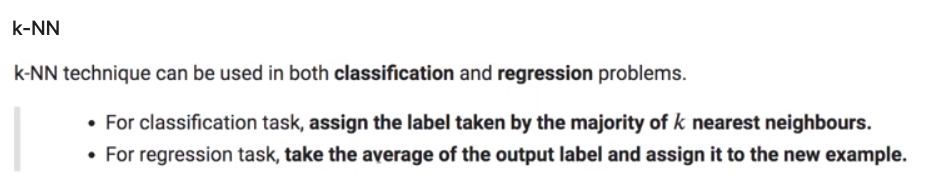

In [ ]:
def EuclideanDistance(x1,x2):
  pass

def ManhattanDistance(x1,x2): 
  pass

#####Solution:

---



In [ ]:
def EuclideanDistance(x1,x2):

  dist = np.sum((x1-x2)**2,axis=1)
  return dist

def ManhattanDistance(x1,x2): 
  np.sum(np.abs(x1-x2),axis=1)

#### 4. Class KNN:

---



In [ ]:
class KNN:
  def __init__(self,k,distance_metric=EuclideanDistance,task_type="Classification"):
    pass
  
  def fit(self,X,y):
    pass
  def predict(self,newExample):
    pass 

  def eval(self, X_test,y_test):
    pass
    



#####Solution:

---



In [ ]:
class KNN:
  def __init__(self,k,distance_metric=EuclideanDistance,task_type="Classification"):
    self._k = k 
    self._distance_metric = distance_metric 
    self._task_type = task_type 
  
  def fit(self,X,y):
    #fitting model on data only requires copying the data
    self._X = X 
    self._y = y 
  def predict(self,newExample):

    #newExample is example for which prediction has to be made.
    ''' label: predicted label for newExample
    k_nearest_neighbours_indices : indices of the nearest k neighbours

    '''
    #2. calculate the distance between the new example and every example from 
    # data. Thus create a distance vector.

    distance_vector = self._distance_metric(self._X,newExample)

    # Get indices of nearest k neighbours

    k_nearest_neighbours_indices = np.argpartition(distance_vector,self._k)[:self._k]
    #4 Get the labels of the selected k entries.
    k_nearest_neighbours = self._y[k_nearest_neighbours_indices]
    # If it is a classification task, return the majority class by computing mode 
    #the k labels
    if self._task_type == 'Classification':
      label = stats.mode(k_nearest_neighbours)[0] 
    else:
      label = k_nearest_neighbours.mean() 
    
    return label, k_nearest_neighbours_indices 

  def eval(self, X_test,y_test):
    if self._task_type == 'Classification':
      y_predicted = np.zeros(y_test.shape) 
      for i in range(y_test.shape[0]):
        y_predicted[i],_ = self.predict(X_test[i,:])
      error = np.mean(y_test==y_predicted, axis = 0)
    
    else:
      y_predicted = np.zeros(y_test.shape) 
      for i in range(y_test.shape[0]):
        y_predicted[i],_ = self.predict(X_test[i,:]) 
        error_vector = y_predicted - y_test 
        error = np.sqrt((error_vector.T@error_vector)/error_vector.ravel().shape[0])
    return error
    



#### 5. Others: (optional)

---



In [ ]:
def draw_decision_boundary(model, axis_chart, num_points=201, opacity=0.05):
  pass

def maketwospirals(num_points=1000,rotations =2, noise = .5):
  ''' 
  Parameters:
  num_points: Number of points to be generated per spiral
  rotations : How many times a spiral should rotate
  noise: noise factor 

  Returns
  -------
  coordinates and class vectors of the two spirals 


  ''' 
  pass
  
  

#####Solution:

---



In [ ]:
def draw_decision_boundary(model, axis_chart, num_points=201, opacity=0.05):
  tx = np.linspace(np.min(model._X[:,0],axis=0)-2,
                   np.max(model._X[:,0],axis=0)+2, num_points)
  ty = np.linspace(np.min(model._X[:,0],axis=0)-2,
                   np.max(model._X[:,0],axis=0)+2, num_points) 
  xx,yy = np.meshgrid(tx,ty) 
  grid_prediction = np.zeros(xx.shape) 

  for i in range(num_points):
    for j in range(num_points):
      grid_prediction[i][j],_ = model.predict([xx[i][j],yy[i][j]]) 
  
  axis_chart.scatter(xx.ravel(),yy.ravel(),c=grid_prediction.ravel(),alpha=opacity)
  

In [ ]:
def maketwospirals(num_points=1000,rotations =2, noise = .5):
  ''' 
  Parameters:
  num_points: Number of points to be generated per spiral
  rotations : How many times a spiral should rotate
  noise: noise factor 

  Returns
  -------
  coordinates and class vectors of the two spirals 


  ''' 
  n = np.sqrt(np.random.rand(num_points,1))*rotations * (2*np.pi)
  rx = -np.cos(n)*n + np.random.rand(num_points,1) * noise 
  ry =  np.sin(n)*n + np.random.rand(num_points,1)*noise

  return (np.concatenate((np.hstack((rx,ry)),
                          np.hstack((-rx,-ry))),
                         axis=0),
          np.concatenate((np.zeros(num_points),
                          np.ones(num_points)),
                         axis=0)) 
  

###Week8:(SVM)

#### 1. class softSVM:

---



In [ ]:
class softSVM:

  def __init__(self,C):
    pass

  def __decision_function(self,X):
    pass

  def __cost(self,margin):
    pass
  
  def __margin(self, X,y):
    pass

  def fit(self,X,y, lr=1e-3, epochs=500):
    pass

  def predict(self,X):
    pass

  def score(self,X,y):
    pass

  def plot_decision_boundary(self):
    pass
    


#####Solution:

---



In [ ]:
class softSVM:

  def __init__(self,C):
    self._support_vectors = None 
    self.C = C
    self.w = None 
    self.b = None 
    self.X = None 
    self.y = None 

    # n is the number of data points 
    self.n = 0 
    # d is the number of dimensions 
    self.d = 0 

  def __decision_function(self,X):
    return X.dot(self.w) + self.b 

  def __cost(self,margin):
    return (1/2)*(self.w).dot(self.w) + self.C*np.sum(np.maximum(0,1-margin))
  
  def __margin(self, X,y):
    return y*self.__decision_function(X) 

  def fit(self,X,y, lr=1e-3, epochs=500):
    # Initialize w and b 
    self.n, self.d = X.shape 
    self.w = np.random.randn(self.d) 
    self.b = 0 

    #required only for plotting 
    self.X = X 
    self.y = y 

    loss_array = []
    
    for _ in range(epochs):
      margin = self.__margin(X,y) 
      loss = self.__cost(margin) 
      loss_array.append(loss)

      missclassified_pts_idx = np.where(margin < 1)[0] 
      d_w = self.w - self.C * y[missclassified_pts_idx].dot(X[missclassified_pts_idx]) 

      self.w = self.w - lr * d_w 

      d_b = -self.C * np.sum(y[missclassified_pts_idx]) 
      self.b = self.b - lr * d_b 
    self._support_vectors = np.where(self.__margin(X,y) <= 1)[0] 

  def predict(self,X):
    return np.sign(self.__decision_function(X)) 

  def score(self,X,y):
    p = self.predict(X) 
    return np.mean(y==p) 

  def plot_decision_boundary(self):
    plt.scatter(self.X[:,0],self.X[:,1],c = self.y, marker='o',s = 100, cmap = 'autumn') 

    ax = plt.gca() 
    xlim = ax.get_xlim() 
    ylim = ax.get_ylim() 

    #create grid to evaluate model 

    xx = np.linspace(xlim[0],xlim[1],30) 
    yy = np.linspace(ylim[0],ylim[1],30) 
    YY,XX = np.meshgrid(yy,xx) 
    xy = np.vstack([XX.ravel(),YY.ravel()]).T 
    z = self.__decision_function(xy).reshape(XX.shape) 

    #plot decision boundary and margins 

    ax.contour(XX,YY,z, colors=['g','k','g'],levels = [-1,0,1],
               linestyles=['--','-','--'],linewidths = [2.0,2.0,2.0]) 

    #highlight the support vectors 

    ax.scatter(self.X[:,0][self._support_vectors],
               self.X[:,1][self._support_vectors],s =250,
               linewidth =1 , facecolors = 'none',edgecolors = 'k') 

    plt.xlabel('x1') 
    plt.ylabel('x2') 

    plt.show() 
  

  







#### 2. : make_blobs

---



In [ ]:
X,Y = make_blobs(n______=60,n_______ =2, centers = [[0,0],[6,6]],
                 cluster_std=1,
                 random_state=12)

Y = np.where(Y == 0 , ___ ,___) 

#plot the two classes 
plt.figure(figsize=(8,8)) 
plt.scatter(_____],_____,marker = 'o', c =Y , s =200, edgecolor='k') 
plt.xlabel('x1',fontsize=20) 
plt.ylabel('x2',fontsize=20) 
plt.title('Data points',fontsize = 20) 
plt.show()



#####Solution:

---



In [ ]:
X,Y = make_blobs(n_samples=60,n_features =2, centers = [[0,0],[6,6]],
                 cluster_std=1,
                 random_state=12)

Y = np.where(Y == 0 , -1 ,1) 

#plot the two classes 
plt.figure(figsize=(8,8)) 
plt.scatter(X[:,0],X[:,1],marker = 'o', c =Y , s =200, edgecolor='k') 
plt.xlabel('x1',fontsize=20) 
plt.ylabel('x2',fontsize=20) 
plt.title('Data points',fontsize = 20) 
plt.show()

#### 3. : Hyper Plane(optional)

---



In [ ]:
svm = softSVM(C=1) 
svm.fit(X,Y) 

print(svm.w) 
def get_hyperplane_value(x,w,b,offset):
  pass


#####Solution:

---



In [ ]:
svm = softSVM(C=1) 
svm.fit(X,Y) 

print(svm.w) 
def get_hyperplane_value(x,w,b,offset):
  return -1*(w[0]*x+b+offset)/w[1] 

fig = plt.figure(figsize=(8,8)) 
ax = fig.add_subplot(1,1,1) 
plt.scatter(X[:,0],X[:,1],marker='o',c=Y, s =200,edgecolor = 'k',cmap='autumn') 
x0_1 = np.amin(X[:,0]) 
x0_2 = np.amax(X[:,0]) 

x1_1 = get_hyperplane_value(x0_1, svm.w, svm.b,0)
x1_2 = get_hyperplane_value(x0_2, svm.w, svm.b,0)

x1_1_m = get_hyperplane_value(x0_1, svm.w, svm.b,-1)
x1_2_m = get_hyperplane_value(x0_2, svm.w, svm.b,-1)

x1_1_p = get_hyperplane_value(x0_1, svm.w, svm.b,1)
x1_2_p = get_hyperplane_value(x0_2, svm.w, svm.b,1) 


ax.plot([x0_1,x0_2],[x1_1,x1_2],'y') 
ax.plot([x0_1,x0_2],[x1_1_m,x1_2_m],'k--') 
ax.plot([x0_1,x0_2],[x1_1_p,x1_2_p],'k--')

x1_min = np.amin(X[:,1]) 
x1_max = np.amax(X[:,1]) 
ax.set_ylim([x1_min -3, x1_max + 3]) 

ax.legend(['Hyperplane','Bounding plane 1', 'Bounding plane 2'],loc='center left', bbox_to_anchor=(1,0.5))
plt.xlabel('x1') 
plt.ylabel('x2') 
plt.show()


#### 4. :Kernel SVM

---



In [ ]:
from urllib.parse import ParseResultBytes
class SVMDualProblem:

  def __init__(self,C=1.0, kernel='rbf', sigma=0.1,degree =2):
    pass

  def _rbf_kernel(self,X1,X2):
    pass

  def _polynomial_kernel(self, X1,X2):
    pass  

  def fit(self, X, y, lr =1e-3, epochs =100):
    pass

  def __decision_function(self,X):
    pass

  def predict(self,X):
    pass
    
  def score(self,X,y):
    pass

  def plot_decision_boundary(self):
    pass

 
    

#####Solution:

---



In [ ]:
class SVMDualProblem:

  def __init__(self,C=1.0, kernel='rbf', sigma=0.1,degree =2):
    self.C = C 
    if kernel == 'poly':
      self.kernel= self._polynomial_kernel
      self.c = 1
      self.degree = degree 

    else: 
      self.kernel = self._rbf_kernel 
      self.sigma = sigma 

    self.X = None 
    self.y = None 
    self.alpha = None 
    self.b = 0 
    self.ones = None 

  def _rbf_kernel(self,X1,X2):
    return np.exp(-1(1/self.sigma**2)*np.linalg.norm(X1[:,np.newaxis]-X2[np.newaxis,:],axis=2)**2) 

  def _polynomial_kernel(self, X1,X2):
    return (self.c + X1.dot(X2.T))**self.degree 
  
  def fit(self, X, y, lr =1e-3, epochs =100):

    self.X = X
    self.y = y 

    self.alpha = np.random.random(X.shape[0]) 
    self.b = 0

    self.ones = np.ones(X.shape[0]) 

    y_iy_jk_ij = np.outer(y,y)*self.kernel(X,X) 

    losses = [] 

    for _ in range(epochs):
      gradient = self.ones - y_iy_jk_ij.dot(self.alpha) 

      self.alpha = self.alpha + lr*gradient 

      self.alpha[self.alpha > self.C] = self.C 
      self.alpha[self.alpha < 0] = 0 

      loss = np.sum(self.alpha) -0.5 * np.sum(
          np.outer(self.alpha,self.alpha)*y_iy_jk_ij) 
      
      losses.append(loss) 

    index = np.where((self.alpha)>0 & (self.alpha < self.C))[0] 

    b_i = y[index] - (self.alpha*y).dot(self.kernel(X,X[index])) 

    #alternative code 
    # b_1 = y[index] - np.sum((self.alpha*y).reshape(-1,1)*self.kernel(X,X[index]),axis =0)

    self.b = np.mean(b_i) 
    plt.plot(losses) 
    plt.title("loss per epochs") 
    plt.show() 

  def __decision_function(self,X):
    return (self.alpha*self.y).dot(self.kernel(self.X,X)) + self.b 

  def predict(self,X):
    return np.sign(self.__decision_function(X))

  def score(self,X,y):
    y_hat = self.predict(X) 
    return np.mean(y==y_hat) 

  def plot_decision_boundary(self):
    plt.scatter(self.X[:,0],self.X[:,1], c = self.y, s=50, cmap = plt.cm.Paired, alpha =0.5) 
    ax = plt.gca() 

    xlim = ax.get_xlim()
    ylim = ax.get_ylim() 

    #create grid to evaluate model 
    xx = np.linspace(xlim[0],xlim[1],30)
    yy = np.linspace(ylim[0],ylim[1],30) 
    YY,XX = np.meshgrid(yy,xx) 
    xy = np.vstack([XX.ravel(),YY.ravel()]).T 
    z = self.__decision_function(xy).reshape(XX.shape) 

    #plot decision boundary and margins 

    ax.contour(XX,YY, z, colors=['b','g','r'],levels = [-1,0,1],alpha=0.5,
               linestyles = ['--','-','--'],linewidths = [2.0,2.0,2.0]) 
    ax.scatter(self.X[:,0][self.alpha > 0.],self.X[:,1][self.alpha > 0.],s=50,
               linewidths=1, facecolors ='none', edgecolors = 'k') 
    plt.show()

 
    

###Week9: ( Decision Trees )

---



#### 1. Entropy:

---



In [ ]:
import pandas as pd
import numpy as np

In [ ]:
def find_entropy_whole(df):
    #last column in the dataframe is target variable
    

    #initialization
    

    #possible values of the target
    

    #for loop
    pass

#####Solution:

---



In [ ]:
def find_entropy_whole(df):
    #last column in the dataframe is target variable
    target = df.keys()[-1]

    #initialization
    overall_entropy = 0

    #possible values of the target
    values_in_target = df[target].unique()
    
    for value in values_in_target:
        p = df[target].value_counts()[value] / len(df[target])
        overall_entropy += -p * np.log2(p)
    return overall_entropy

#### 2. Entropy of attribute:

---



In [ ]:
def find_entropy_of_attribute(df, attribute):
    #last column in dataframe is label
    

    #possible values of the target
    
    
    #this gives different features in that attribute (
        # like hot, cold in temperature )  
    

    #initialize attribute entropy
    

    #for loop implementation
    pass

for attribute in df.keys()[:-1]:
    print(f'Entropy of the attribute "{attribute}" is :', find_entropy_of_attribute(df, attribute))

#####Solution:

---



In [ ]:
def find_entropy_of_attribute(df, attribute):
    #last column in dataframe is label
    target = df.keys()[-1]

    #possible values of the target
    values_in_target = df[target].unique()
    
    #this gives different features in that attribute (
        # like hot, cold in temperature )  
    values_in_attribute = df[attribute].unique()

    #initialize attribute entropy
    entropy_attribute = 0

    #for loop implementation
    for value_in_attribute in values_in_attribute:
        overall_entropy = 0
        for value_in_target in values_in_target:
            num = len(df[attribute][df[attribute] == value_in_attribute][df[target] == value_in_target])
            den = len(df[attribute][df[attribute] == value_in_attribute])
            p = num / (den + eps)
            overall_entropy += -p * np.log2(p + eps)
        p2 = den / len(df)
        entropy_attribute += -p2 * overall_entropy
    return abs(entropy_attribute)

In [ ]:
for attribute in df.keys()[:-1]:
    print(f'Entropy of the attribute "{attribute}" is :', find_entropy_of_attribute(df, attribute))

#### 3. Best attribute to divide:

---



In [ ]:
def find_best_attribute_to_divide(df):
    #information gain initialization
    
    #get all column names
    

    #get information gain for every attribute
    
    
    #get the index of attribute with best information gain
    

    #print index of attribute with maximum gain
    pass


#####Solution:

---



In [ ]:
def find_best_attribute_to_divide(df):
    #information gain initialization
    IG = []
    #get all column names
    all_attributes = df.keys()[:-1]

    #get information gain for every attribute
    for attribute in all_attributes:
        IG.append(find_entropy_whole(df) - find_entropy_of_attribute(df, attribute))
    
    #get the index of attribute with best information gain
    index_of_attribute_with_max_IG = np.argmax(IG)

    #print index of attribute with maximum gain
    best_attribute = all_attributes[index_of_attribute_with_max_IG]
    return best_attribute


#### 4. Build Tree:

---



In [ ]:
def buildTree(df, tree=None):
    #last column in our dataframe
    

    #get attribute with maximum information gain
    

    #get distinct value of that attribute
    

    #create an empty dictionary to create tree
    

    #we make a loop to construct a tree by calling the function recursively 
    #we check if the subset is pure, we stop if pure
    pass

#####Solution:

---



In [ ]:
def buildTree(df, tree=None):
    #last column in our dataframe
    target = df.keys()[-1]

    #get attribute with maximum information gain
    node = find_best_attribute_to_divide(df)

    #get distinct value of that attribute
    attValue = np.unique(df[node])

    #create an empty dictionary to create tree
    if tree is None:
        tree = {}
        tree[node] = {}

    #we make a loop to construct a tree by calling the function recursively 
    #we check if the subset is pure, we stop if pure
    for value in attValue:
        subtable = df[df[node] == value].reset_index(drop=True)
        clValue, counts = np.unique(subtable['play'], return_counts=True)
        if len(counts) == 1: #Checking purity of subset
            tree[node][value] = clValue[0]
        else:
            tree[node][value] = buildTree(subtable) # Calling the function recusively
    return tree



###Week10: (Random Forest, Gradient Boosting)

---



#### 1. Random Forest : 

---


- In case of decision tree, we train a single decision tree. In random forest we train multiple decision trees on different training sets obtained through boostrap aggregation.

---

**Input**:

1. The training data $D$ with shape $(n,m)$, say $D_1,D_2,\ldots ,D_q$ with replacement from $D$.
2. In each of the datasets $D_j$, select $u$ out of $m$ where $u \le m$ features before each split and train a full decision tree $h_j(\mathbf x)$
3. The final predictor is
  * For regression, an average output from $q$ regressors is assigned to the new example:
  
  $$ h(\mathbf x) = \frac {1}{q} \sum_{j=1}^q h_j(\mathbf x) $$

  * For classification, a majority voting is taken and the class label with the maximum number of votes is assigned to the new example.


---

Steps/methods:

---
1. Bagging
2. Majority Voting
3. Random Forest Class
4. Fit Method
5. Predict Method



#####1a. Bagging:

---

We define a function for bagging-creating 1 boostrap samples $D_1,D_2,\ldots,D_q$ from the original dataset $D:$
 * The key step is np.random.choice with `size=n_samples` and `replace=True` which ensures that the boostrap sample has the same number of samples as the original dataset and it is obtained by sampling with replacement.
 

---



In [ ]:
import numpy as np
def bag (X,y):
  #Counts the number or rows in the feature matrix
  

  #Generates a random sample from the  given input.
  
  # Note that the second argument size has been set to the size of 
  # the original sample dataset and replacement has been set to True

  pass

######Solution:

---



In [ ]:
import numpy as np
def bag (X,y):
  #Counts the number or rows in the feature matrix
  n_samples = X.shape[0] 

  #Generates a random sample from the  given input.
  indices = np.random.choice(n_samples,size = n_samples,replace=True,random_state=1)
  # Note that the second argument size has been set to the size of 
  # the original sample dataset and replacement has been set to True

  return X[indices], y[indices]

#####2a. Majority Voting:

---
Code `up` `most_common_label` function for obtaining majority vote for  class labels.

---




In [ ]:
def most_common_label(y):
  pass

#example:
y = [1,1,1,0,0,2,2,2,2,3,3,3]
print(Counter(y))
print(Counter(y).most_common(2)[0][0])


######Solution:

---



In [ ]:
import numpy as np
def bag (X,y):
  #Counts the number or rows in the feature matrix
  n_samples = X.shape[0] 

  #Generates a random sample from the  given input.
  indices = np.random.choice(n_samples,size = n_samples,replace=True,random_state=1)
  # Note that the second argument size has been set to the size of 
  # the original sample dataset and replacement has been set to True

  return X[indices], y[indices]
  
def most_common_label(y):
  counter = Counter(y)
  most_common = counter.most_common(1)[0][0] 
  return most_common


y = [1,1,1,0,0,2,2,2,2,3,3,3]
print(Counter(y))
print(Counter(y).most_common(2)[0][0])


##### 3a.Random Forest Class:

---
we create `RandomForest` class with the following default parameters:

 * number of tree =10
 * minimum number of samples =2
 * maximum depth =100 

The `max_features` is a configurable parameter that can be set by the user.


---




In [ ]:
class RandomForest:
  def __init__(self, n_trees=10, min_samples_split=2, max_depth=100, max_features=None):
    pass

######Solution:

---



In [ ]:
import numpy as np
def bag (X,y):
  #Counts the number or rows in the feature matrix
  n_samples = X.shape[0] 

  #Generates a random sample from the  given input.
  indices = np.random.choice(n_samples,size = n_samples,replace=True,random_state=1)
  # Note that the second argument size has been set to the size of 
  # the original sample dataset and replacement has been set to True

  return X[indices], y[indices]
  
def most_common_label(y):
  counter = Counter(y)
  most_common = counter.most_common(1)[0][0] 
  return most_common


# y = [1,1,1,0,0,2,2,2,2,3,3,3]
# print(Counter(y))
# print(Counter(y).most_common(2)[0][0])


class RandomForest:
  def __init__(self, n_trees=10, min_samples_split=2, max_depth=100, max_features=None):
    self.n_trees = n_trees #hyperparameter for fixing number of trees to be generated
    self.min_samples_split = min_samples_split # min no of samples required for split
    self.max_depth=max_depth #maximum depth of decision tree
    self.max_features = max_features #maximum no of features to be considered
    self.trees = [] 

##### 4a. Fit Method:

---

we implement `fit` method.

 * Initialize an empty list of decision tree classifiers.
 * In the for loop, we train each decision tree with parameters set from random forest on a boostrapped sample obtained through the `bag` function.

---



In [ ]:
def fit(self,X,y):
  pass
    


######Solution:

---



In [ ]:
import numpy as np
def bag (X,y):
  #Counts the number or rows in the feature matrix
  n_samples = X.shape[0] 

  #Generates a random sample from the  given input.
  indices = np.random.choice(n_samples,size = n_samples,replace=True,random_state=1)
  # Note that the second argument size has been set to the size of 
  # the original sample dataset and replacement has been set to True

  return X[indices], y[indices]
  
def most_common_label(y):
  counter = Counter(y)
  most_common = counter.most_common(1)[0][0] 
  return most_common


# y = [1,1,1,0,0,2,2,2,2,3,3,3]
# print(Counter(y))
# print(Counter(y).most_common(2)[0][0])


class RandomForest:
  def __init__(self, n_trees=10, min_samples_split=2, max_depth=100, max_features=None):
    self.n_trees = n_trees #hyperparameter for fixing number of trees to be generated
    self.min_samples_split = min_samples_split # min no of samples required for split
    self.max_depth=max_depth #maximum depth of decision tree
    self.max_features = max_features #maximum no of features to be considered
    self.trees = [] 

def fit(self,X,y):
  self.trees =[] #Empty array of trees which gets filled in during operations.
  for _ in range(self.n_trees): #we are using underscore we are just repeating the operations.
    tree = DecisionTreeClassifier( #we will now make RF class inherit features from Sklearn'
                                  min_samples_split = self.min_samples_split,
                                  max_depth = self.max_depth,
                                  max_features=self.max_features
                                
        
    )
    X_sample, y_sample = bag(X,y) 
    tree.fit(X_sample,y_sample) 
    self.trees.append(tree) # we will append each of these tree.
    


##### 5a. Predict Method:

---

Let's implement `predict` function

Here, we need to note that each of the trees will give predictions for all the individual rows of the input data.

for example if we have random forest with 3 trees and 2 classes 0 & 1, let's assume the prediciton for 5 samples is as follows.

  * Tree 1 gives 11001
  * Tree 2 gives 00111
  * Tree 3 gives 10101

We need to aggregate the output for the respective samples and take an average/majority vote. For this, we will use `np.swapaxes`.

---



In [ ]:
def predict(self,X):
  pass

  

######Solution:

---



In [ ]:
import numpy as np
def bag (X,y):
  #Counts the number or rows in the feature matrix
  n_samples = X.shape[0] 

  #Generates a random sample from the  given input.
  indices = np.random.choice(n_samples,size = n_samples,replace=True,random_state=1)
  # Note that the second argument size has been set to the size of 
  # the original sample dataset and replacement has been set to True

  return X[indices], y[indices]
  
def most_common_label(y):
  counter = Counter(y)
  most_common = counter.most_common(1)[0][0] 
  return most_common


# y = [1,1,1,0,0,2,2,2,2,3,3,3]
# print(Counter(y))
# print(Counter(y).most_common(2)[0][0])


class RandomForest:
  def __init__(self, n_trees=10, min_samples_split=2, max_depth=100, max_features=None):
    self.n_trees = n_trees #hyperparameter for fixing number of trees to be generated
    self.min_samples_split = min_samples_split # min no of samples required for split
    self.max_depth=max_depth #maximum depth of decision tree
    self.max_features = max_features #maximum no of features to be considered
    self.trees = [] 

def fit(self,X,y):
  self.trees =[] #Empty array of trees which gets filled in during operations.
  for _ in range(self.n_trees): #we are using underscore we are just repeating the operations.
    tree = DecisionTreeClassifier( #we will now make RF class inherit features from Sklearn'
                                  min_samples_split = self.min_samples_split,
                                  max_depth = self.max_depth,
                                  max_features=self.max_features
                                
        
    )
    X_sample, y_sample = bag(X,y) 
    tree.fit(X_sample,y_sample) 
    self.trees.append(tree) # we will append each of these tree.
    


def predict(self,X):
  tree_predict = np.array([tree.predict(X) for tree in self.trees])
  tree_predict = np.swapaxes(tree_predict,0,1) #each of the trees will give out predictions
  y_pred = [most_common_label(tree_pred) for tree_pred in tree_predict] 
  return np.array(y_pred) 

  

#####6a. Accuracy

---



In [ ]:
def accuracy(y_true, y_pred):
  pass


######Solution:

---



In [ ]:
import numpy as np
def bag (X,y):
  #Counts the number or rows in the feature matrix
  n_samples = X.shape[0] 

  #Generates a random sample from the  given input.
  indices = np.random.choice(n_samples,size = n_samples,replace=True,random_state=1)
  # Note that the second argument size has been set to the size of 
  # the original sample dataset and replacement has been set to True

  return X[indices], y[indices]
  
def most_common_label(y):
  counter = Counter(y)
  most_common = counter.most_common(1)[0][0] 
  return most_common


# y = [1,1,1,0,0,2,2,2,2,3,3,3]
# print(Counter(y))
# print(Counter(y).most_common(2)[0][0])


class RandomForest:
  def __init__(self, n_trees=10, min_samples_split=2, max_depth=100, max_features=None):
    self.n_trees = n_trees #hyperparameter for fixing number of trees to be generated
    self.min_samples_split = min_samples_split # min no of samples required for split
    self.max_depth=max_depth #maximum depth of decision tree
    self.max_features = max_features #maximum no of features to be considered
    self.trees = [] 

def fit(self,X,y):
  self.trees =[] #Empty array of trees which gets filled in during operations.
  for _ in range(self.n_trees): #we are using underscore we are just repeating the operations.
    tree = DecisionTreeClassifier( #we will now make RF class inherit features from Sklearn'
                                  min_samples_split = self.min_samples_split,
                                  max_depth = self.max_depth,
                                  max_features=self.max_features
                                
        
    )
    X_sample, y_sample = bag(X,y) 
    tree.fit(X_sample,y_sample) 
    self.trees.append(tree) # we will append each of these tree.
    


def predict(self,X):
  tree_predict = np.array([tree.predict(X) for tree in self.trees])
  tree_predict = np.swapaxes(tree_predict,0,1) #each of the trees will give out predictions
  y_pred = [most_common_label(tree_pred) for tree_pred in tree_predict] 
  return np.array(y_pred) 


def accuracy(y_true, y_pred):
  accuracy = np.sum(y_true == y_pred)/len(y_true) 
  return accuracy 

#### 2. Gradient Boosting: 

---

Gradient Boost 

The principle behind boosting algorithms is that first we build a model on the training dataset, then a second model is built to rectify the errors present in the first model. This procedure is continued until and unless the errors are minimized, and the dataset is predicted correctly. In particular, we start with a weak model and subsequently, each new model is fit on a modified version of the original dataset.

Notes:
 * A weak learner is a model that performs at least slightly better than a random model.
 * Decision trees are generally used as weak learners in gradient boost.
 * Unlike AdaBoost where decision trees with only one level (decision stumps) are used, The decision trees used in Gradient Boost generally contain some 3-7 levels.

Steps:
In this colab, we implement Gradient Boosting algorithm and show it works for regression. Following are the steps involved:
  1. Make a first guess for y_train and y_test, using the average of y_train.

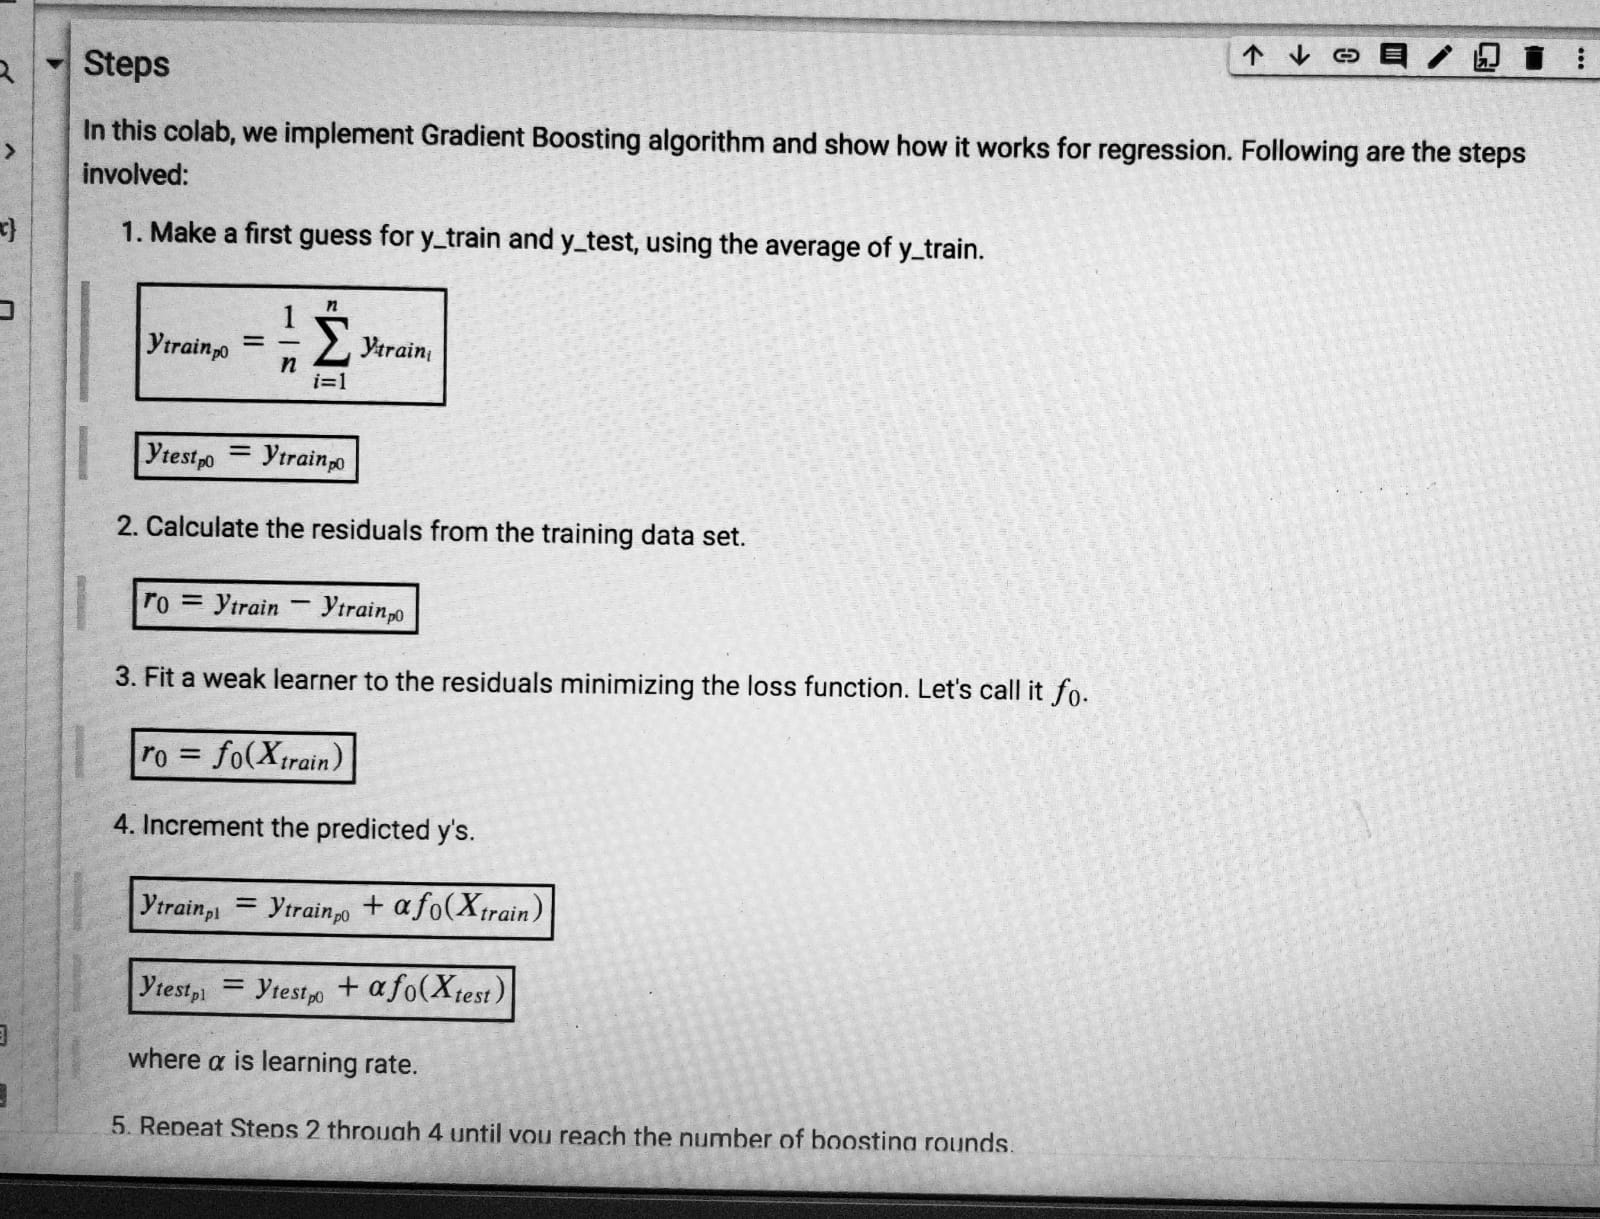





  

In [ ]:
def GradBoost(model, X_train, y_train, X_test, boosting_rounds, learning_rate: float = 0.1):
  # make a first guess of our training target variable using the mean of y_train
  

  # initialize the test prediction with the mean of the training target variable
  

  #calculate the residuals from the training data using the first guess
  

  #iterates through the boosting round.
  
    #fit the model to the residuals
     

    #increment the predicted training y with the pseudo residual * learning rate
    

    #increment the predicted test y as well
    

    #calculate the residuals for the next round 

    pass


    



######Solution:

---



In [ ]:
import numpy as np
np.repeat(np.mean([1,2,3]),10)

array([2., 2., 2., 2., 2., 2., 2., 2., 2., 2.])

In [ ]:
import numpy as np
def bag (X,y):
  #Counts the number or rows in the feature matrix
  n_samples = X.shape[0] 

  #Generates a random sample from the  given input.
  indices = np.random.choice(n_samples,size = n_samples,replace=True,random_state=1)
  # Note that the second argument size has been set to the size of 
  # the original sample dataset and replacement has been set to True

  return X[indices], y[indices]
  
def most_common_label(y):
  counter = Counter(y)
  most_common = counter.most_common(1)[0][0] 
  return most_common


# y = [1,1,1,0,0,2,2,2,2,3,3,3]
# print(Counter(y))
# print(Counter(y).most_common(2)[0][0])


class RandomForest:
  def __init__(self, n_trees=10, min_samples_split=2, max_depth=100, max_features=None):
    self.n_trees = n_trees #hyperparameter for fixing number of trees to be generated
    self.min_samples_split = min_samples_split # min no of samples required for split
    self.max_depth=max_depth #maximum depth of decision tree
    self.max_features = max_features #maximum no of features to be considered
    self.trees = [] 

def fit(self,X,y):
  self.trees =[] #Empty array of trees which gets filled in during operations.
  for _ in range(self.n_trees): #we are using underscore we are just repeating the operations.
    tree = DecisionTreeClassifier( #we will now make RF class inherit features from Sklearn'
                                  min_samples_split = self.min_samples_split,
                                  max_depth = self.max_depth,
                                  max_features=self.max_features
                                
        
    )
    X_sample, y_sample = bag(X,y) 
    tree.fit(X_sample,y_sample) 
    self.trees.append(tree) # we will append each of these tree.
    


def predict(self,X):
  tree_predict = np.array([tree.predict(X) for tree in self.trees])
  tree_predict = np.swapaxes(tree_predict,0,1) #each of the trees will give out predictions
  y_pred = [most_common_label(tree_pred) for tree_pred in tree_predict] 
  return np.array(y_pred) 


def accuracy(y_true, y_pred):
  accuracy = np.sum(y_true == y_pred)/len(y_true) 
  return accuracy 

def GradBoost(model, X_train, y_train, X_test, boosting_rounds, learning_rate: float = 0.1):
  # make a first guess of our training target variable using the mean of y_train
  y_hat_train = np.repeat(np.mean(y_train), len(y_train))

  # initialize the test prediction with the mean of the training target variable
  y_hat_test = np.repeat(np.mean(y_train), len(X_test)) 

  #calculate the residuals from the training data using the first guess
  residuals = y_train - y_hat_train 

  #iterates through the boosting round.
  for i in range(0,boosting_rounds):
    #fit the model to the residuals
    model = model.fit(X_train, residuals) 

    #increment the predicted training y with the pseudo residual * learning rate
    y_hat_train = y_hat_train + learning_rate*model.predict(X_train) 

    #increment the predicted test y as well
    y_hat_test = y_hat_test + learning_rate * model.predict(X_test) 

    #calculate the residuals for the next round 

    residuals = y_train - y_hat_train 
  return y_hat_train, y_hat_test


###Week11: (Clustering)


k-means clustering algorithm is an iterative algorithm that proceeds as follows:

**Input**:
 * $n$ training examples represented with $m$ features.
 * Number of centroids: $k$.

---
**Algorithm**:
 1. Randomly initialize k centroids. Note that each centroid is a vector in $m$ dimensional space.
 2. Repeat until convergence:
   
   i. Assign points to the closest centroids.
   ii. Calculate the centroids based on the points assigned to the cluster.

The algorithm converges when the centroid stops changing or in other words the cluster memebership stabilizes and subsequent iterations do not yield any changes.

---




#### 1. : Fit Method

---



In [ ]:
def fit(X,k):
  # take three random points from data set and take them as initial centroids

   

  #calculate initial label of each data point
  

  for _iteration in range(10):
    #copy labels for all points for comparing later
    

    #compute new centroids
    

    #at last recalculate label of each data point 
     

    #check if labels of points are not cchanging
    pass

  



#####Solution:

---



In [ ]:
def fit(X,k):
  # take three random points from data set and take them as initial centroids

  centroids = X[np.random.randint(0,X.shape[0],size=k)] 

  #calculate initial label of each data point
  labels = np.argmin(cdist(X,centroids), axis=1)

  for _iteration in range(10):
    #copy labels for all points for comparing later
    previous_labels =labels.copy()

    #compute new centroids
    centroids = np.array([np.mean(X[labels==r], axis=0) for r in range(k)])  

    #at last recalculate label of each data point 
    labels = np.argmin(cdist(X,centroids),axis=1) 

    #check if labels of points are not cchanging
    if all (labels ==previous_labels):
      break
  return centroids, labels

  



#### 1. : Plot KMeans 

---



In [ ]:
def plot_kmeans(X,centroids, labels, rseed=0, ax=None):
  #plot input data

  
  #plot data points

  

  #plot the representation of the KMeans model.

  pass

#####Solution:

---



In [ ]:
from scipy.spatial.distance import cdist

def plot_kmeans(X,centroids, labels, rseed=0, ax=None):
  #plot input data

  ax = ax or plt.gca() 
  ax.axis('equal') 

  #plot data points

  ax.scatter(X[:,0],X[:,1],c=labels, s=40, cmap='plasma', zorder=2)

  #plot the representation of the KMeans model.

  radii = [cdist(X[labels==i],[center]).max() for i, center in enumerate(centroids)] 

  for c,r in zip(centroids, radii):
    #add circular shapes to the clusters
    ax.add_patch(plt.Circle(c,r, fc='#CCCCCC',lw =5, alpha=0.5,zorder=1))               

# Exercises:

---



## Week2 Exercises:

---



#### Exercise 1:

---



In [ ]:
# Use the following dataset to answer the questions in preceeding cells:
from sklearn.datasets import make_regression 

X,y, coef = make_regression(n_samples=200,n_features =10,n_informative=10,n_targets=1, shuffle=True, coef = True, noise=0.5, random_state=0)

In [ ]:
#Q1: Obtain X_train, X_test, y_train, y_test 
#    by using train_test_split with test_size =0.2 and random_state = 42

In [ ]:
#Q2:  Fit X_train and y_train to obtain weight vector via normal_equation method and save it as w_ne

In [ ]:
#Q3: Excecute the line of code: np.testing.assert_almost_equal(coef,w_ne, decimal=0); what do you observe?

In [ ]:
#Q4. Use gradient descent on X_train, y_train with num_epochs = 1000, lr = 1e-4 to print weight vector

In [ ]:
#Q5. Use mgbd on X_train, y_train with num_epochs = 1000,to print weight vector and 16 as batch_size

In [ ]:
#Q6. Use sgd on X_train, y_train with num_epochs = 1000,to print weight vector 

In [ ]:
#Q7 create a function plot_learning_curves(loss), to plot loss vs iterations for above dataset using 
#   a)gd b)mbgd c)sgd

#### Exercise 2:

---



In [ ]:
# Use the following dataset to answer the questions in preceeding cells:
from sklearn.datasets import make_regression 

X,y, coef = make_regression(n_samples=300,n_features =7,n_informative=10,n_targets=1, shuffle=True, coef = True, noise=0.8, random_state=0)

In [ ]:
#Q1: Obtain X_train, X_test, y_train, y_test 
#    by using train_test_split with test_size =0.2 and random_state = 42

In [ ]:
#Q2:  Fit X_train and y_train to obtain weight vector via normal_equation method and save it as w_ne

In [ ]:
#Q3: Excecute the line of code: np.testing.assert_almost_equal(coef,w_ne, decimal=0); what do you observe?

In [ ]:
#Q4. Use gradient descent on X_train, y_train with num_epochs = 1000, lr = 1e-4 to print weight vector

In [ ]:
#Q5. Use mgbd on X_train, y_train with num_epochs = 1000,to print weight vector and 16 as batch_size

In [ ]:
#Q6. Use sgd on X_train, y_train with num_epochs = 1000,to print weight vector 

In [ ]:
#Q7 create a function plot_learning_curves(loss), to plot loss vs iterations for above dataset using 
#   a)gd b)mbgd c)sgd

#### Exercise 3:

---



In [ ]:
# Use the following dataset to answer the questions in preceeding cells:
from sklearn.datasets import make_regression 

X,y, coef = make_regression(n_samples=100,n_features =10,n_informative=10,n_targets=1, shuffle=True, coef = True, noise=1.5, random_state=0)

In [ ]:
#Q1: Obtain X_train, X_test, y_train, y_test 
#    by using train_test_split with test_size =0.2 and random_state = 42

In [ ]:
#Q2:  Fit X_train and y_train to obtain weight vector via normal_equation method and save it as w_ne

In [ ]:
#Q3: Excecute the line of code: np.testing.assert_almost_equal(coef,w_ne, decimal=0); what do you observe?

In [ ]:
#Q4. Use gradient descent on X_train, y_train with num_epochs = 1000, lr = 1e-4 to print weight vector

In [ ]:
#Q5. Use mgbd on X_train, y_train with num_epochs = 1000,to print weight vector and 16 as batch_size

In [ ]:
#Q6. Use sgd on X_train, y_train with num_epochs = 1000,to print weight vector 

In [ ]:
#Q7 create a function plot_learning_curves(loss), to plot loss vs iterations for above dataset using 
#   a)gd b)mbgd c)sgd

#### Exercise 4:

---



In [ ]:
# Use the following dataset to answer the questions in preceeding cells:
from sklearn.datasets import make_regression 

X,y, coef = make_regression(n_samples=2000,n_features =3,n_informative=3,n_targets=1, shuffle=True, coef = True, noise=0.7, random_state=0)

In [ ]:
#Q1: Obtain X_train, X_test, y_train, y_test 
#    by using train_test_split with test_size =0.2 and random_state = 42

In [ ]:
#Q2:  Fit X_train and y_train to obtain weight vector via normal_equation method and save it as w_ne

In [ ]:
#Q3: Excecute the line of code: np.testing.assert_almost_equal(coef,w_ne, decimal=0); what do you observe?

In [ ]:
#Q4. Use gradient descent on X_train, y_train with num_epochs = 1000, lr = 1e-4 to print weight vector

In [ ]:
#Q5. Use mgbd on X_train, y_train with num_epochs = 1000,to print weight vector and 16 as batch_size

In [ ]:
#Q6. Use sgd on X_train, y_train with num_epochs = 1000,to print weight vector 

In [ ]:
#Q7 create a function plot_learning_curves(loss), to plot loss vs iterations for above dataset using 
#   a)gd b)mbgd c)sgd

#### Exercise:5

---



In [ ]:
#Q1: Create a 'Class' by name LinReg with following methods in the class:
# def __init__(self):
# def fit(self,X,y):
# def predict(self,X):
# def loss(self,X,y):
# def rmse(self,X,y):
# def calculate_gradient(self,X,y):
# def update_weight(self,grad,lr):
# def learning_schedule(self,t):
# def gd(self,X,y,num_epochs,lr):
# def mbgd(self,X,y,num_epochs,batch_size):
# def sgd(self,X,y,num_epochs):

In [ ]:
# Use the following dataset to answer the questions in preceeding cells:
from sklearn.datasets import make_regression 

X,y, coef = make_regression(n_samples=200,n_features =10,n_informative=10,n_targets=1, shuffle=True, coef = True, noise=0.5, random_state=0)


In [ ]:
#Q2 Create a LinReg object and find the weight vectors using 1) normal equation 2) gd 3) mbgd 4)sgd and compare the weights

In [ ]:
#Q3 Create a LinReg object and plot learning curves with num_epoch = 1000, lr=1e-4, batch_size =16 for
#   1)gd 2)mbgd 3)sgd

#### Exercise:6

---



In [ ]:
#Q1: Create a 'Class' by name LinReg with following methods in the class:
# def __init__(self):
# def fit(self,X,y):
# def predict(self,X):
# def loss(self,X,y):
# def rmse(self,X,y):
# def calculate_gradient(self,X,y):
# def update_weight(self,grad,lr):
# def learning_schedule(self,t):
# def gd(self,X,y,num_epochs,lr):
# def mbgd(self,X,y,num_epochs,batch_size):
# def sgd(self,X,y,num_epochs):

In [ ]:
# Use the following dataset to answer the questions in preceeding cells:
from sklearn.datasets import make_regression 

X,y, coef = make_regression(n_samples=250,n_features =4,n_informative=4,n_targets=1, shuffle=True, coef = True, noise=0.9, random_state=0)


In [ ]:
#Q2 Create a LinReg object and find the weight vectors using 1) normal equation 2) gd 3) mbgd 4)sgd and compare the weights

In [ ]:
#Q3 Create a LinReg object and plot learning curves with num_epoch = 1000, lr=1e-4, batch_size =16 for
#   1)gd 2)mbgd 3)sgd

## Week3 Exercises:

---



#### Exercise:1

---



Q1. Create a python function by the name get_combinations which takes `'X'` and `degree` as input parameters and outputs the combinations of with replacement (use `itertools` library).
- Use the following input value to recheck your function as you loop through the output.
 - Input: `X = [1,2,3]`,`degree = 2`

In [ ]:
import itertools

def get_combinations(X,degree):
  return itertools.combinations_with_replacement(X,degree)

In [ ]:
x_t = [1,2,3]
degree = 2
# for items in itertools.combinations_with_replacement(x_t ,degree):
#   print(items)
for i in get_combinations(x_t,degree):
  print(i)

(1, 1)
(1, 2)
(1, 3)
(2, 2)
(2, 3)
(3, 3)


Q2. Execute the code below and fill the 3 missing comments in your own words

---



In [ ]:
import itertools
import functools

x_t = [1,2,3]
degree = 2
features = [] #1______________
for items in itertools.combinations_with_replacement(x_t ,degree): #2____________
  features.append(functools.reduce(lambda x,y: x*y, items)) #3_____________

print(features)


[1, 2, 3, 4, 6, 9]


#### Exercise:2

---



Q1. Consider the following code and fillin the comments 

In [ ]:
lst = [1,2,3]

p = np.array(lst) #1.__________

q = np.asarray(lst) #2.____________

r, s = np.array(p), np.array(q) 

t, u = np.asarray(p), np.asarray(q) 

print(p,q,r,s,t,u) #3.___________
print(type(p),type(q),type(r),type(s),type(t),type(u)) #4___________


[1 2 3] [1 2 3] [1 2 3] [1 2 3] [1 2 3] [1 2 3]
<class 'numpy.ndarray'> <class 'numpy.ndarray'> <class 'numpy.ndarray'> <class 'numpy.ndarray'> <class 'numpy.ndarray'> <class 'numpy.ndarray'>


Q2. Follow the code below and answer the preceeding questions

---



Q2a. What is the dimension of x ?

In [ ]:
x = np.array([1,2,3])


In [ ]:
x.ndim

1

Q2b. What is the dimension of the x?

In [ ]:
x = np.array([1,2,3])
x = x[:, None]

In [ ]:
x.ndim

2

Q2c. What is the dimension of the x?

In [ ]:
x = np.array([1,2,3])
x = x[:, np.newaxis]

In [ ]:
x.ndim

2

Q3. 
1. Create a polynoial_transform functions (as discussed in video lecture) which takes `x `and `degree` as input and outputs a numpy array of the transformed feature
2. Using `fetch_california_housing` load the dataset from sklearn inbuilt datasets and polynomial transform the features using degree 3 and compare the features shape before and after the transformation

---



In [ ]:
def polynomial_transform(x,degree):
  if x.ndim ==1:
    x=x[:, None]
  x_t = x.transpose()
  features = [np.ones(len(x))]
  for degree in range(1, degree+1):
    for items in itertools.combinations_with_replacement(x_t ,degree):
      features.append(functools.reduce(lambda x ,y : x*y , items)) 
  return np.asarray(features).transpose() 

from sklearn.datasets import fetch_california_housing
X,y = fetch_california_housing(return_X_y=True)
X_t = polynomial_transform(X,3)
print(X.shape)
print(X_t.shape)

(20640, 8)
(20640, 165)


#### Exercise:3

---



Q. 
- Create a 'rmse_poly' function
- Inputs: `X, degree`
- Output: rmse error
- **Note:** polynomial transform the feature matrix and compute the rmse error
- Apply rmse_poly to california housing feature matrix with degree =2

In [ ]:
def polynomial_transform(x,degree):
  if x.ndim == 1:
    x=x[:,None]
  x_t = x.transpose()
  features = [np.ones(len(x))]
  for degree in range(1, degree+1):
    for items in itertools.combinations_with_replacement(x_t, degree):
      features.append(functools.reduce(lambda x,y: x*y, items))
  return np.asarray(features).transpose()

def predict(X,w):
  assert X.shape[-1] == w.shape[0]
  return X@w

def fit(X,y):
  return np.linalg.pinv(X)@y

def rmse_poly(X,y,degree):
  x_t = polynomial_transform(X, degree)
  w = fit(x_t,y)
  e = predict(x_t,w) - y
  return np.sqrt(1/x_t.shape[0] * (e.T @ e) ) ##formula: rmse = np.sqrt(SSE/n)



In [ ]:
from sklearn.datasets import fetch_california_housing
X,y = fetch_california_housing(return_X_y=True)

rmse_poly(X, y, degree = 2)

0.6493882788439673

#### Exercise:4

---



Q1. Consider the following code and compute the loss (assume reg_rate is of 'ridge'):

---



In [ ]:
import numpy as np 
X = np.array([[1,3,2,5],[1,9,4,7]])
y = np.array([6,11])
w = np.ones(X.shape[1])
reg_rate = 0.01

In [ ]:
class LinReg():
    def __init__(self):
        self.t0 = 200
        self.t1 = 100000
    def predict (self, X):
        y = X @ self.w
        return y
    def loss (self, X, y, reg_rate):
        e = y - self.predict(X)
        return 0.5 *(e.T @ e) + (reg_rate/2) * (np.transpose(self.w) @ self.w)
    def rmse(self,X, y, reg_rate):
        return np.sqrt(2/X.shape[0] * self.loss(X, y, reg_rate))
    def fit(self, X, y, reg_rate):
#         self.w = np.linalg.pinv(X) @ y
        eye = np.eye(X.shape[1])
        self.w = np.linalg.solve(X.T @ X + reg_rate * eye, X.T @ y)
        return self.w
    def calculate_gradient(self, X, y, reg_rate):
        return X.T @ (self.predict(X) - y) + reg_rate * self.w
    def update_weights(self, grad, lr):
        return (self.w - lr * grad)
    def learning_schedule(self, t):
        return self.t0 / (self.t0 + self.t1)
    def gd(self, X, y, num_epochs, lr, reg_rate):
        self.w = np.zeros(X.shape[1])
        self.w_all = list() 
        self.err_all = list()
        for i in range(num_epochs):
            dJdw = self.calculate_gradient(X, y, reg_rate)
            self.w_all.append(self.w)
            self.err_all.append(self.loss(X, y, reg_rate))
            self.w = self.update_weights(dJdw, lr)
        return self.w
    def mbgd(self, X, y, num_epochs, batch_size):
        mini_batch_id = 0
        self.w = np.zeros(X.shape[1])  #initializing arbitrary values.
        self.w_all = list() 
        self.err_all = list()

        for epoch in range(num_epochs):
            shuffled_indices = np.random.permutation(X.shape[0])
            X_shuffled = X[shuffled_indices]
            y_shuffled = y[shuffled_indices]

            for i in range(0, X.shape[0], batch_size):
                mini_batch_id += 1
                x1 = X_shuffled[i:i+batch_size]
                y1 = y_shuffled[i:i+batch_size]

                self.w_all.append(self.w)
                self.err_all.append(self.loss(X, y))

                dJdw = 2/batch_size * self.calculate_gradient(x1, y1)
                self.w = self.update_weights(dJdw, self.learning_schedule(mini_batch_id))

        return self.w
    
    def sgd(self, X, y, num_epochs):
        batch_size = 1
        mini_batch_id = 0
        self.w = np.zeros(X.shape[1])  #initializing arbitrary values.
        self.w_all = list() 
        self.err_all = list()

        for epoch in range(num_epochs):
            shuffled_indices = np.random.permutation(X.shape[0])
            X_shuffled = X[shuffled_indices]
            y_shuffled = y[shuffled_indices]

            for i in range(0, X.shape[0], batch_size):
                mini_batch_id += 1
                x1 = X_shuffled[i:i+batch_size]
                y1 = y_shuffled[i:i+batch_size]

                self.w_all.append(self.w)
                self.err_all.append(self.loss(X, y))

                dJdw = 2/batch_size * self.calculate_gradient(x1, y1)
                self.w = self.update_weights(dJdw, self.learning_schedule(mini_batch_id))

        return self.w

lr = LinReg()
lr.w = w

result = lr.loss(X,y,reg_rate)
result

62.52

##Week5 Exercises: (Logistic Regression)

###Exercise: 1(Logistic Regression **STEPS**: Linearly Seperable - Binary Classification)


---



#####Step1) Create or load data: 

---


- eg: Generate two linearly separable classes with 25 samples each, Each example is represented with two features.

In [ ]:
#Q. What could be the sanity check after loading/creating data?
# provide your answer here

######Solution:

In [ ]:
#We need to check for the shapes of features and labels and make sure the following:
assert feature_matrix.shape[0]==label_vector.shape[0]


#####Step2) Add dummy feature: 

---


- We make use of polynomial feature transformation code. The dummy feature can be added by performing polynomial transformation of degree _____ (fill the blank)

######Solution:

In [ ]:
degree = 1

#####Step3) Separate data into training and test sets:

---


- Q1.Which sklearn API is used to seperate the data?
- Q2.Write down the necessary assert statements as part of sanity check/good practice (Assume x_train, y_train are training feature matrix and label vector and x_test, y_test are testing featre matrix and label vector.)

######Solution:

In [ ]:
from sklearn.model_selection import train_test_split

assert x_train.shape[0] == y_train.shape[0]
assert x_test.shape[0]==y_test.shape[0]

#####Step4) Visualize the data:

---


- Q1.Can you visualize the data with more than 2 features?
- Q2.Using sns(seaborn) write necessary code to visualize the feature matrix (assume X_train is your feature matrix, y_train is your label vector)

######Solution:

In [ ]:
# Q1) No
# Q2) sns.scatterplot(data=x_train, x=x_train[:,-2],y=x_train[:,-1], hue=y_train)


In [ ]:
from sklearn.model_selection import train_test_split

assert x_train.shape[0] == y_train.shape[0]
assert x_test.shape[0]==y_test.shape[0]

Step1) Create or load data: 
- eg: Generate two linearly separable classes with 25 samples each, Each example is represented with two features.

In [ ]:
feature_matrix, label_vector = create_toy_data()

#####Step5) Train the model

---


- First instantiate a logistic regression object.
- Train the model with gradient descent procedure on the given training set.
- plot_learning_curve()
- visualize_model()

> Upon the above steps the model learns  __ _______________ that seperates most of the points from 2 classes (fill in the blank)

######Solution:

In [ ]:
#decision boundary

Step1) Create or load data: 
- eg: Generate two linearly separable classes with 25 samples each, Each example is represented with two features.

In [ ]:
feature_matrix, label_vector = create_toy_data()

#####Step6) Model Evaluation

---


- Q1. Write a code of y_test_hat on x_test ( assume x_test is the test data and model as logistic regression object you already fit with training data
- Q2. Which sklearn API would you choose for classification report?
- Q3. What would be the input parameters of the API from Q2

######Solution:

In [ ]:
#y_test_hat = model.predict(x_test)

# from sklearn.metrics import classification_report 
# print(classification_report(y_test,y_test_hat, zero_division=0))

###Exercise: 2(Logistic Regression **CODE**: Linearly Seperable - Binary Classification)

---



####Q1) Write down the steps for solving linearly seperable binary classification problem using logistic regression:

######Solution:

---



In [ ]:
# Step1) Create or load data
# Step2) Add dummy feature
# Step3) Sepearate training and test dataset
# Step4) Visualize the data
# Step5) Model the training data
# Step6) Evaluate on test data


####Q2) Use the following dataset and answer the preceeding questions


In [ ]:
#title [Toy dataset creation]
def create_toy_data():
  x0 = np.random.normal(size=50).reshape(-1,2)-1
  x1 = np.random.normal(size=50).reshape(-1,2)+1
  return np.concatenate([x0,x1]),np.concatenate([np.zeros(x1.shape[0]),np.ones(x1.shape[0])]).astype(int) #check for label vector code in previous colab

#####Q2a: **[ Step1: *Load Data* ]**

---


> a) Create a dataset using above helper function 

> b) Save the feature martix and label vector to variables feature_matrix, label_vector respectively 

> c) Check the shapes of the feature matrix and label vector

> d)Do a sanity check using assert

---



######Solution:

---



In [ ]:
feature_matrix, label_vector = create_toy_data()
print("shape of feature matrix", feature_matrix.shape)
print("shape of label vector:", label_vector.shape)

In [ ]:
assert feature_matrix.shape[0]==label_vector.shape[0]

#####Q2b: **[ Step2: *Add Dummy Feature* ]**

---


> a) Create a dataset using above helper function 

> b) Save the feature martix and label vector to variables feature_matrix, label_vector respectively 

> c) Check the shapes of the feature matrix and label vector

> d)Do a sanity check using assert

---



######Solution:

---



In [ ]:
feature_matrix_bias = polynomial_transform(feature_matrix,degree=1)


#####Q2c: **[ Step3: *Seperate data* ]**

---


> a) Use necessary sklearn API to seperate the data into x_train, x_test, y_train, y_test respectively 

> b) Use necessary assert statements on training and test sets as part of sanity check

---



######Solution:

---



In [ ]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(feature_matrix_bias, label_vector, test_size=0.2)

In [ ]:
assert x_train.shape[0] == y_train.shape[0]
assert x_test.shape[0]==y_test.shape[0]

#####Q2d: **[ Step4: *Visualize data* ]**

---


> a) Use necessary seaborn API to plot the data 

---



######Solution:

---



In [ ]:
sns.set_style('white')
f = plt.figure(figsize=(8,8))
sns.set_context('notebook',font_scale=1.5, rc={'lines.linewidth': 2.5})

sns.scatterplot(data=x_train, x=x_train[:,-2],y=x_train[:,-1], hue=y_train)
plt.xlabel('$x_1$')
plt.ylabel('$x_2$')
plt.show()

#####Q2e: **[ Step5: *Apply LogisticRegression* ]**

---


> a) Write down the LinearRegression class discussed in the video lectures

> b) Instantiate a logistic regression object

> c)Train the model with gradient descent procedure on the given training set

> d)Plot the learning curve using plot_learning_curves() 

> e)[*optional*] Viualize the classification using visualize_model()

---



######Solution:

---



In [ ]:
log_reg = LogisticRegression()
log_reg.gd(x_train,y_train, num_epochs=1000, reg_rate=0,lr=1e-2)


In [ ]:
#[learning curves]
def plot_learning_curve(err):
  plt.plot(np.arange(len(err)),err, 'r-')
  plt.xlabel('Iter #')
  plt.ylabel('$\mathbf {J(w)}$')

In [ ]:
plot_learning_curve(log_reg.err_all)

In [ ]:
import seaborn as sns
#Model visualization 
sns.set_context("notebook", font_scale=1.5, rc={"lines.linewidth": 2.5})


def visualize_model(X_train, labels, log_reg, degree=1):

  f = plt.figure(figsize = (8,8)) 

  #compute xlim and ylim 
  x1_min = np.min(x_train[:,1]) 
  x1_max = np.max(x_train[:,1])
  x2_min = np.min(x_train[:,2])
  x2_max = np.max(x_train[:,2]) 

  x1_test ,x2_test = np.meshgrid(np.linspace(x1_min, x1_max, 100),
                                 np.linspace(x2_min, x2_max, 100)) 
  x_test = np.array([x1_test, x2_test]).reshape(2,-1).T 
  x_test_poly = polynomial_transform(x_test , degree = degree )
  y_test = log_reg.predict(x_test_poly )

  sns.scatterplot(data=X_train, x=X_train[:,1], y =X_train[:,2],hue=labels)
  plt.contourf(x1_test,x2_test, y_test.reshape(100,100),alpha=0.5,
               levels=np.linspace(0,1,3))

  plt.xlabel("$x_1$")
  plt.ylabel("$x_2$")
  plt.xlim(x1_min, x1_max)
  plt.ylim(x2_min, x2_max)
  plt.gca().set_aspect('equal', adjustable='box')
  return plt.show()


In [ ]:
visualize_model(x_train, y_train, log_reg)

#####Q2f: **[ Step6: *Model Evaluation* ]**

---


> a) Using the LogisticRegression object, predict the values for x_test and save it into variable y_hat_test

> b) Import necessary sklearn API to see the classification report on the test set

---



######Solution:

---



In [ ]:
y_test_hat = log_reg.predict(x_test)

In [ ]:
from sklearn.metrics import classification_report 
print(classification_report(y_test,y_test_hat, zero_division=0))

              precision    recall  f1-score   support

           0       1.00      0.60      0.75         5
           1       0.71      1.00      0.83         5

    accuracy                           0.80        10
   macro avg       0.86      0.80      0.79        10
weighted avg       0.86      0.80      0.79        10



###Exercise: 3(Polynomial Logistic Regression **CODE**: Linearly Seperable - Binary Classification)

---



In [ ]:
from sklearn.datasets import make_circles 

_ , _ = make_circles()

#####Q2a: **[ Step1: *Load Data* ]**

---


> a) Generate samples from two classes such that they are separated by a circular decision boundary. using above code 

> b) Save the feature martix and label vector to variables feature_matrix, label_vector respectively 

> c) Check the shapes of the feature matrix and label vector

> d)Do a sanity check using assert

---



######Solution:

---



In [ ]:
from sklearn.datasets import make_circles 
feature_matrix, label_vector = make_circles()

In [ ]:
assert feature_matrix.shape[0]== label_vector.shape[0]


#####Q2b: **[ Step2: *Add Dummy Feature* ]**

---


> a)  Use polynomial_transform with degree =2 for transforming input features into the second order polynomial features and save it to variable x_poly

> b) Compare number of feature before and after the transformation.

---



######Solution:

---



In [ ]:
x_poly = polynomial_transform(feature_matrix,  degree =2)

In [ ]:
print("# features before transformation:", feature_matrix.shape[1])
print("# features after transformation:",x_poly.shape[1])

#####Q2c: **[ Step3: *Seperate data* ]**

---


> a) Use necessary sklearn API to seperate the data into x_train, x_test, y_train, y_test respectively 

> b) Use necessary assert statements on training and test sets as part of sanity check

---



######Solution:

---



In [ ]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x_poly, label_vector)


In [ ]:
assert x_train.shape[0]==y_train.shape[0]
assert x_test.shape[0]==y_test.shape[0]

#####Q2d: **[ Step4: *Visualize data* ]**

---


> a) Use necessary seaborn API to plot the data 

---



######Solution:

---



In [ ]:
sns.set_style('white')
f = plt.figure(figsize=(8,8))
sns.set_context('notebook',font_scale=1.5, rc={'lines.linewidth': 2.5})

sns.scatterplot(data=x_train, x=x_train[:,1],y=x_train[:,2], hue=y_train)
plt.xlabel('$x_1$')
plt.ylabel('$x_2$')
plt.show()

#####Q2e: **[ Step5: *Apply LogisticRegression* ]**

---


> a) Write down the LinearRegression class discussed in the video lectures

> b) Instantiate a logistic regression object

> c)Train the model with gradient descent procedure on the given training set

> d)Plot the learning curve using plot_learning_curves() 

> e)[*optional*] Viualize the classification using visualize_model()

---



######Solution:

---



In [ ]:
log_reg_poly = LogisticRegression() 
log_reg_poly.gd(x_train, y_train, reg_rate=0,num_epochs=10000, lr=1e-2)

In [ ]:
#[learning curves]
def plot_learning_curve(err):
  plt.plot(np.arange(len(err)),err, 'r-')
  plt.xlabel('Iter #')
  plt.ylabel('$\mathbf {J(w)}$')

In [ ]:
plot_learning_curve(log_reg_poly.err_all)

In [ ]:
import seaborn as sns
#Model visualization 
sns.set_context("notebook", font_scale=1.5, rc={"lines.linewidth": 2.5})


def visualize_model(X_train, labels, log_reg, degree=1):

  f = plt.figure(figsize = (8,8)) 

  #compute xlim and ylim 
  x1_min = np.min(x_train[:,1]) 
  x1_max = np.max(x_train[:,1])
  x2_min = np.min(x_train[:,2])
  x2_max = np.max(x_train[:,2]) 

  x1_test ,x2_test = np.meshgrid(np.linspace(x1_min, x1_max, 100),
                                 np.linspace(x2_min, x2_max, 100)) 
  x_test = np.array([x1_test, x2_test]).reshape(2,-1).T 
  x_test_poly = polynomial_transform(x_test , degree = degree )
  y_test = log_reg.predict(x_test_poly )

  sns.scatterplot(data=X_train, x=X_train[:,1], y =X_train[:,2],hue=labels)
  plt.contourf(x1_test,x2_test, y_test.reshape(100,100),alpha=0.5,
               levels=np.linspace(0,1,3))

  plt.xlabel("$x_1$")
  plt.ylabel("$x_2$")
  plt.xlim(x1_min, x1_max)
  plt.ylim(x2_min, x2_max)
  plt.gca().set_aspect('equal', adjustable='box')
  return plt.show()


In [ ]:
visualize_model(x_train, y_train, log_reg_poly, degree=2)

#####Q2f: **[ Step6: *Model Evaluation* ]**

---


> a) Using the LogisticRegression object, predict the values for x_test and save it into variable y_hat_test

> b) Import necessary sklearn API to see the classification report on the test set

---



######Solution:

---



In [ ]:
y_test_hat = log_reg_poly.predict(x_test)

In [ ]:
from sklearn.metrics import classification_report 
print(classification_report(y_test, y_test_hat, zero_division=0))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        13
           1       1.00      1.00      1.00        12

    accuracy                           1.00        25
   macro avg       1.00      1.00      1.00        25
weighted avg       1.00      1.00      1.00        25



##Week6 Exercises: (Naive Bayes)

---



###Exercise 1: (fit method)

---



#####Q1. Predict the output for the code below:

In [ ]:
import numpy as np
X=np.array([[1,1,30],[1,11,1],[3,2,47]])
y=np.array([[0,1,1],[2,1,3],[2,2,1]])
x1=X[y==1]
x1

######Solution:

---



In [ ]:
array([  1,  30, 11,   47])

#####Q2. 
> a)Write a function fit, which takes X, y as inputs and returns weight vector 'w' and priors 'w_priors'

> b) Apply the fit method for `X = np.array([[1,0],[0,1],[0,1],[1,0]])` and `y = np.array([1,0,0,1])` and print the output.

######Solution:

---



In [ ]:
#feature matrix with shape (4,2). x_1 ~ Ber(w_1), x_2~ Ber(w_2)
X = np.array([[1,0],[0,1],[0,1],[1,0]])

#label vector with shape(4,)

y = np.array([1,0,0,1])

#call fit with feature matrix and label vector as arguments.
fit(X,y)

#Returns parameters of bernoulli distributions and priors.

Weight vector [[0. 1.]
 [1. 0.]]
prior [0.5 0.5]


(array([[0., 1.],
        [1., 0.]]), array([0.5, 0.5]))

###Exercise 2: (Binary classification with Bernoulli Naive Bayes)

---



#####Q. 

---


> a)Write a class BernoulliNB(object)

> b) Use `X = np.array([[1,0],[0,1],[0,1],[1,0]])` and `y = np.array([1,0,0,1])` and print the output.

> c) Instantiate BernoulliNB() with a variable 'ber_nb'

> d) Predict the classes for the input X with BernoulliNB object

> e) Print highest value of product of likelihood and priors and note your observations

> f) Predict probabilities for each example.

---



######Solution:

---



In [ ]:
class BernoulliNB():
    def __init__(self, alpha=1.0):
        self.alpha = alpha
    def fit(self, X, y):
        n_samples, n_features = X.shape
        n_classes = len(np.unique(y))
        self.w = np.zeros((n_classes, n_features), dtype=np.float64)
        self.w_priors = np.zeros(n_classes, dtype=np.float64)

        for c in range(n_classes):
            X_c = X[y == c]
            self.w[c, :] = (np.sum(X_c, axis=0) + self.alpha) / (X_c.shape[0] + n_classes * self.alpha)
            self.w_priors[c] = (X_c.shape[0] + self.alpha) / (float(n_samples) + n_classes * self.alpha)

        print("Class Conditional Density:", self.w)
        print("Prior", self.w_priors)

    def log_likelihood_prior_prod(self, X):
        return X @ (np.log(self.w).T) + (1 - X) @ np.log((1 - self.w).T) + np.log(self.w_priors)
    
    def predict_proba(self, X):
        q = self.log_likelihood_prior_prod(X)
        return np.exp(q) / np.expand_dims(np.sum(np.exp(q), axis=1), axis=1)
    
    def predict(self, X):
        q = self.log_likelihood_prior_prod(X)
        return np.argmax(q, axis=1)

In [ ]:
ber_nb = BernoulliNB() 
ber_nb.fit(X,y)

Class conditional density: [[0.25 0.75]
 [0.75 0.25]]
Prior: [0.5 0.5]


In [ ]:
#Let's predict classes for input example.
ber_nb.predict(X)


array([1, 0, 0, 1])

In [ ]:
# The class labels are inferred by selecting the label that results into 
# highest value of product of likelihood and priors: 
ber_nb.log_likelihood_prior_prod(X)

array([[-3.4657359 , -1.26851133],
       [-1.26851133, -3.4657359 ],
       [-1.26851133, -3.4657359 ],
       [-3.4657359 , -1.26851133]])

Observe that based on this calculation, the first example gets class 1, second one gets class 0, third also gets class 0 and the last one gets class 1.

In [ ]:
# let's predict probabilities for each example.
ber_nb.predict_proba(X)

array([[0.1, 0.9],
       [0.9, 0.1],
       [0.9, 0.1],
       [0.1, 0.9]])

###Exercise 3: (Multi-class classification with Bernoulli Naive Bayes)

---



#####Q. 

---


> a)Write a class BernoulliNB(object)

> b) Use `X = np.array([[1,0],[0,1],[0,1],[1,0],[1,1],[1,1]])
` and `y = np.array([1,0,0,1,2,2])` print the output.

> c) Instantiate BernoulliNB() with a variable 'ber_nb'

> d) Predict the classes for the input X with BernoulliNB object

> e) Print highest value of product of likelihood and priors and note your observations

> f) Predict probabilities for each example.

---



######Solution:

---



In [ ]:
class BernoulliNB():
    def __init__(self, alpha=1.0):
        self.alpha = alpha
    def fit(self, X, y):
        n_samples, n_features = X.shape
        n_classes = len(np.unique(y))
        self.w = np.zeros((n_classes, n_features), dtype=np.float64)
        self.w_priors = np.zeros(n_classes, dtype=np.float64)

        for c in range(n_classes):
            X_c = X[y == c]
            self.w[c, :] = (np.sum(X_c, axis=0) + self.alpha) / (X_c.shape[0] + n_classes * self.alpha)
            self.w_priors[c] = (X_c.shape[0] + self.alpha) / (float(n_samples) + n_classes * self.alpha)

        print("Class Conditional Density:", self.w)
        print("Prior", self.w_priors)

    def log_likelihood_prior_prod(self, X):
        return X @ (np.log(self.w).T) + (1 - X) @ np.log((1 - self.w).T) + np.log(self.w_priors)
    
    def predict_proba(self, X):
        q = self.log_likelihood_prior_prod(X)
        return np.exp(q) / np.expand_dims(np.sum(np.exp(q), axis=1), axis=1)
    
    def predict(self, X):
        q = self.log_likelihood_prior_prod(X)
        return np.argmax(q, axis=1)

In [ ]:
bernoulli_nb = BernoulliNB()
bernoulli_nb.fit(X, y)

Class Conditional Density: [[0.2 0.6]
 [0.6 0.2]
 [0.6 0.6]]
Prior [0.33333333 0.33333333 0.33333333]


In [ ]:
bernoulli_nb.predict(X) #note the prediction is matching with the input labels.

array([1, 0, 0, 1, 2, 2], dtype=int64)

In [ ]:
bernoulli_nb.log_likelihood_prior_prod(X)

array([[-3.62434093, -1.83258146, -2.52572864],
       [-1.83258146, -3.62434093, -2.52572864],
       [-1.83258146, -3.62434093, -2.52572864],
       [-3.62434093, -1.83258146, -2.52572864],
       [-3.21887582, -3.21887582, -2.12026354],
       [-3.21887582, -3.21887582, -2.12026354]])

In [ ]:
bernoulli_nb.predict_proba(X)

array([[0.1, 0.6, 0.3],
       [0.6, 0.1, 0.3],
       [0.6, 0.1, 0.3],
       [0.1, 0.6, 0.3],
       [0.2, 0.2, 0.6],
       [0.2, 0.2, 0.6]])

###Exercise 4: (Binary classification with Gaussian Naive Bayes)

---



#####Q. 

---


> a)Write a class GaussianNB()

> b) Use the following information and create a dataset

 > 
from sklearn.datasets import make_classification, make_blobs

from sklearn.model_selection import train_test_split

X, y = make_blobs(n_samples=100, n_features=2, centers=[[5,5],[10,10]], cluster_std=1.5, random_state=2)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=123)

> c) Instantiate GaussianNB() with a variable 'gaussian_nb ' and fit with training data

> d) Predict the classes for the input X with GaussianNB object

> e) Predict probabilities for each example on test data.

> f) Print the classification report using appropraite sklearn API
---



######Solution:

---



In [ ]:
class GaussianNB():
    def __init__(self, alpha=1.0):
        self.alpha = alpha
    def fit(self, X, y):
        n_samples, n_features = X.shape
        self._classes = np.unique(y)
        n_classes = len(self._classes)
        self._mean = np.zeros((n_classes, n_features), dtype=np.float64)
        self._var = np.zeros((n_classes, n_features), dtype=np.float64)
        self._priors = np.zeros(n_classes, dtype=np.float64)

        for idx, c in enumerate(self._classes):
            X_c = X[y == c]
            self._mean[idx, :] = X_c.mean(axis=0)
            self._var[c] = X_c.var(axis=0)
            self._priors[idx] = X_c.shape[0] / float(n_samples)

        print("Mean:", self._mean)
        print("Variance:", self._var)
        print("Prior", self._priors)
    
    def _calc_pdf(self, class_idx, X):
        mean = self._mean[class_idx]
        var = np.diag(self._var[class_idx])
        z = np.power(2 * np.pi, X.shape[0] / 2) * np.power(np.linalg.det(var), 1/2)
        return (1/z) * np.exp(-0.5 * (X - mean).T @ (np.linalg.inv(var)) @ (X - mean))
    
    def _calc_prod_likelihood_prior(self, X):
        self.q = np.zeros((X.shape[0], len(self._classes)), dtype=np.float64)
        for x_idx, x in enumerate(X):
            for idx, c in enumerate(self._classes):
                self.q[x_idx, c] = (np.log(self._calc_pdf(idx, x)) 
                                                         + np.log(self._priors[idx]))
    
    def predict_proba(self, X):
        self._calc_prod_likelihood_prior(X)
        return np.exp(self.q) / np.expand_dims(np.sum(np.exp(self.q), axis=1), axis=1)
    
    def predict(self, X):
        self._calc_prod_likelihood_prior(X)
        return np.argmax(self.q, axis=1)

In [ ]:
gaussian_nb = GaussianNB()
gaussian_nb.fit(X_train, y_train)

Mean: [[ 4.55853975  5.01739665]
 [10.30431548 10.08580617]]
Variance: [[2.13298417 2.30222002]
 [3.22242307 2.20662074]]
Prior [0.5125 0.4875]


In [ ]:
gaussian_nb.predict_proba(X_test)

array([[9.99999746e-01, 2.54140753e-07],
       [7.63749214e-14, 1.00000000e+00],
       [4.23038642e-03, 9.95769614e-01],
       [9.99986614e-01, 1.33855473e-05],
       [7.05769182e-06, 9.99992942e-01],
       [9.99820566e-01, 1.79433743e-04],
       [9.72541524e-01, 2.74584756e-02],
       [9.99982043e-01, 1.79572091e-05],
       [2.85910189e-05, 9.99971409e-01],
       [1.01888837e-07, 9.99999898e-01],
       [7.39129058e-01, 2.60870942e-01],
       [9.99793438e-01, 2.06561658e-04],
       [9.99999915e-01, 8.46737165e-08],
       [2.03213294e-05, 9.99979679e-01],
       [8.76198350e-09, 9.99999991e-01],
       [6.51163513e-05, 9.99934884e-01],
       [9.27638525e-05, 9.99907236e-01],
       [7.58034673e-09, 9.99999992e-01],
       [1.81773339e-03, 9.98182267e-01],
       [9.99985544e-01, 1.44557945e-05]])

In [ ]:
gaussian_nb.predict(X_test)

array([0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0],
      dtype=int64)

In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y_test, gaussian_nb.predict(X_test)))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00         9
           1       1.00      1.00      1.00        11

    accuracy                           1.00        20
   macro avg       1.00      1.00      1.00        20
weighted avg       1.00      1.00      1.00        20



###Exercise 5: (Multi-class classification with Gaussian Naive Bayes)

---



#####Q. 

---


> a)Write a class GaussianNB()

> b) Use the following information and create a dataset

 > 
######Generating synthetic dataset with three classes.
##### Each example is represented with two features.



```
X,y = make_blobs(n_samples =100,
                 n_features=2,
                 centers=[[5,5],[10,10],[20,20]],
                 cluster_std=1.5,
                 random_state=3)
```



`X_train, X_test, y_train,y_test = train_test_split(X,y, test_size=0.2, random_state=123)`

> c) Instantiate GaussianNB() with a variable 'gaus_nb_multiclass' and fit with training data

> d) Predict the classes for the input X with GaussianNB object

> e) Predict probabilities for each example on test data.

> f) Print the classification report using appropraite sklearn API
---



######Solution:

---



In [ ]:
class GaussianNB():
    def __init__(self, alpha=1.0):
        self.alpha = alpha
    def fit(self, X, y):
        n_samples, n_features = X.shape
        self._classes = np.unique(y)
        n_classes = len(self._classes)
        self._mean = np.zeros((n_classes, n_features), dtype=np.float64)
        self._var = np.zeros((n_classes, n_features), dtype=np.float64)
        self._priors = np.zeros(n_classes, dtype=np.float64)

        for idx, c in enumerate(self._classes):
            X_c = X[y == c]
            self._mean[idx, :] = X_c.mean(axis=0)
            self._var[c] = X_c.var(axis=0)
            self._priors[idx] = X_c.shape[0] / float(n_samples)

        print("Mean:", self._mean)
        print("Variance:", self._var)
        print("Prior", self._priors)
    
    def _calc_pdf(self, class_idx, X):
        mean = self._mean[class_idx]
        var = np.diag(self._var[class_idx])
        z = np.power(2 * np.pi, X.shape[0] / 2) * np.power(np.linalg.det(var), 1/2)
        return (1/z) * np.exp(-0.5 * (X - mean).T @ (np.linalg.inv(var)) @ (X - mean))
    
    def _calc_prod_likelihood_prior(self, X):
        self.q = np.zeros((X.shape[0], len(self._classes)), dtype=np.float64)
        for x_idx, x in enumerate(X):
            for idx, c in enumerate(self._classes):
                self.q[x_idx, c] = (np.log(self._calc_pdf(idx, x)) 
                                                         + np.log(self._priors[idx]))
    
    def predict_proba(self, X):
        self._calc_prod_likelihood_prior(X)
        return np.exp(self.q) / np.expand_dims(np.sum(np.exp(self.q), axis=1), axis=1)
    
    def predict(self, X):
        self._calc_prod_likelihood_prior(X)
        return np.argmax(self.q, axis=1)

In [ ]:
gaus_nb_multiclass = GaussianNB()
gaus_nb_multiclass.fit(X_train,y_train)

Mean: [[ 4.94844927  4.67947138]
 [ 9.62097704 10.49990402]
 [19.63832097 19.94706375]]
Variance: [[1.99332345 2.36976247]
 [1.68415535 2.25596351]
 [1.79203315 1.24939267]]
Priors: [0.3375 0.35   0.3125]


In [ ]:
print(classification_report(y_test, gaus_nb_multiclass.predict(X_test)))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00         7
           1       1.00      1.00      1.00         5
           2       1.00      1.00      1.00         8

    accuracy                           1.00        20
   macro avg       1.00      1.00      1.00        20
weighted avg       1.00      1.00      1.00        20



In [ ]:
gaus_nb_multiclass.predict_proba(X_test)

array([[1.02996770e-47, 2.67740135e-24, 1.00000000e+00],
       [5.00111567e-05, 9.99949989e-01, 6.51529293e-32],
       [9.99999999e-01, 9.45325297e-10, 1.33290144e-78],
       [1.00000000e+00, 6.49743430e-12, 7.70260328e-90],
       [1.50617094e-52, 5.94123831e-27, 1.00000000e+00],
       [3.77917160e-47, 9.99218112e-23, 1.00000000e+00],
       [5.30598294e-33, 9.05195020e-13, 1.00000000e+00],
       [6.63950534e-07, 9.99999336e-01, 1.42699786e-26],
       [3.57244754e-61, 3.86494439e-34, 1.00000000e+00],
       [9.70872284e-06, 9.99990291e-01, 5.02104511e-31],
       [9.99982252e-01, 1.77477098e-05, 2.51366893e-63],
       [3.93493321e-39, 5.51495730e-18, 1.00000000e+00],
       [1.00000000e+00, 4.72574372e-11, 1.19906531e-79],
       [1.19575291e-47, 3.45203067e-24, 1.00000000e+00],
       [9.09245241e-01, 9.07547595e-02, 1.30885257e-46],
       [9.99999997e-01, 2.64110663e-09, 3.37901343e-80],
       [9.97572472e-01, 2.42752753e-03, 1.17514148e-55],
       [1.12896485e-05, 9.99988

###Exercise 6: (Binary classification with Multinomial Naive Bayes)

---



#####Q. 

---


> a)Write a class Multinomial NB()

> b) Use the following information, create the dataset and check for shape of feature matrix and label vector

 > 




```
res = np.random.RandomState(1)
X = res.randint(5, size = (1000,5)) # range of data 0 to 4
y= res.randint(2,size=(1000,)) # range of data 0,1

X_train, X_test , y_train, y_test = train_test_split(X,y)
```


> c) Instantiate MultinomialNB() with a variable 'multinomial_nb' and fit with training data

> d) Predict probabilities for each example on test data.

> e) Print the classification report using appropraite sklearn API

> f) Note your observations
---



######Solution:

---



In [ ]:
class MultinomialNB():
    def __init__(self, alpha=1.0):
        self.alpha = alpha
        
    def fit(self, X, y):
        n_samples, n_features = X.shape
        self._classes = np.unique(y)
        n_classes = len(self._classes)
        self.w = np.zeros((n_classes, n_features), dtype=np.float64)
        self.w_priors = np.zeros(n_classes, dtype=np.float64)

        for idx, c in enumerate(self._classes):
            X_c = X[y == c]
            total_count = np.sum(np.sum(X_c, axis=1))
            self.w[idx, :] = (np.sum(X_c, axis=0) + self.alpha) / (total_count + n_classes * self.alpha)
            self.w_priors[idx] = (X_c.shape[0] + self.alpha) / (float(n_samples) + n_classes * self.alpha)

    def log_likelihood_prior_prod(self, X):
        return X @ (np.log(self.w).T) + np.log(self.w_priors)
    
    def predict_proba(self, X):
        q = self.log_likelihood_prior_prod(X)
        return np.exp(q) / np.expand_dims(np.sum(np.exp(q), axis=1), axis=1)
    
    def predict(self, X):
        q = self.log_likelihood_prior_prod(X)
        return np.argmax(q, axis=1)

In [ ]:
print("shape of feature matrix:",X_train.shape)
print("shape of label vector:",y_train.shape)


shape of feature matrix: (750, 5)
shape of label vector: (750,)


In [ ]:
multinomial_nb = MultinomialNB()
multinomial_nb.fit(X_train, y_train)

#Examine the parameters of multinomial NB.
print("Prior:",multinomial_nb.w_prior)
print("Parameters of multinomial distribution:\n",multinomial_nb.w)

Prior: [0.49202128 0.50797872]
Parameters of multinomial distribution:
 [[0.21434437 0.18669587 0.19052833 0.19572954 0.21270189]
 [0.21318124 0.19518378 0.19974651 0.19721166 0.19467681]]


In [ ]:
print(classification_report(y_test, multinomial_nb.predict(X_test)))

              precision    recall  f1-score   support

           0       0.48      0.41      0.44       116
           1       0.55      0.63      0.59       134

    accuracy                           0.52       250
   macro avg       0.52      0.52      0.51       250
weighted avg       0.52      0.52      0.52       250



In [ ]:
multinomial_nb.predict_proba(X_test[:5])

array([[0.4243056 , 0.5756944 ],
       [0.50375165, 0.49624835],
       [0.50541874, 0.49458126],
       [0.54035026, 0.45964974],
       [0.44547043, 0.55452957]])

In [ ]:
# Each class is equally likely -each class has probability of 0.5.
# Sum of probabilities of different features for each class =1.
# The lower values of precision and recall is due to the random label assignment in the synthetic data.


###Exercise 7: (Multi-class classification with Multinomial Naive Bayes)

---



#####Q. 

---


> a)Write a class Multinomial NB()

> b) Use the following information, create the dataset and check for shape of feature matrix and label vector

 > 




```
res = np.random.RandomState(1)
X = res.randint(5,size=(1000,5))
y =res.randint(3,size=(1000,))
X_train, X_test,y_train, y_test = train_test_split(X,y)
```


> c) Instantiate MultinomialNB() with a variable 'multinomial_nb' and fit with training data

> d) Predict probabilities for each example on test data.

> e) Print the classification report using appropraite sklearn API

> f) Note your observations
---



######Solution:

---



In [ ]:
class MultinomialNB():
    def __init__(self, alpha=1.0):
        self.alpha = alpha
        
    def fit(self, X, y):
        n_samples, n_features = X.shape
        self._classes = np.unique(y)
        n_classes = len(self._classes)
        self.w = np.zeros((n_classes, n_features), dtype=np.float64)
        self.w_priors = np.zeros(n_classes, dtype=np.float64)

        for idx, c in enumerate(self._classes):
            X_c = X[y == c]
            total_count = np.sum(np.sum(X_c, axis=1))
            self.w[idx, :] = (np.sum(X_c, axis=0) + self.alpha) / (total_count + n_classes * self.alpha)
            self.w_priors[idx] = (X_c.shape[0] + self.alpha) / (float(n_samples) + n_classes * self.alpha)

    def log_likelihood_prior_prod(self, X):
        return X @ (np.log(self.w).T) + np.log(self.w_priors)
    
    def predict_proba(self, X):
        q = self.log_likelihood_prior_prod(X)
        return np.exp(q) / np.expand_dims(np.sum(np.exp(q), axis=1), axis=1)
    
    def predict(self, X):
        q = self.log_likelihood_prior_prod(X)
        return np.argmax(q, axis=1)

In [ ]:
rng = np.random.RandomState(1)
X = rng.randint(5,size=(1000,5))
y =rng.randint(3,size=(1000,))
X_train, X_test,y_train, y_test = train_test_split(X,y)

In [ ]:
multinomial_nb = MultinomialNB() 
multinomial_nb.fit(X_train,y_train)

#Examine the parameters of multinomial NB.

print("prior:",multinomial_nb.w_prior)
print("Parameters of multinomial distribution:\n",multinomial_nb.w)

prior: [0.35192563 0.34262948 0.30544489]
Parameters of multinomial distribution:
 [[0.20831786 0.2031192  0.19160787 0.1964352  0.20051987]
 [0.21784879 0.18316446 0.1979735  0.20381917 0.19719408]
 [0.20826087 0.20782609 0.18391304 0.19652174 0.20347826]]


In [ ]:
print(classification_report(y_test, multinomial_nb.predict(X_test)))

              precision    recall  f1-score   support

           0       0.33      0.52      0.40        83
           1       0.31      0.44      0.36        85
           2       0.00      0.00      0.00        82

    accuracy                           0.32       250
   macro avg       0.21      0.32      0.25       250
weighted avg       0.21      0.32      0.26       250



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
multinomial_nb.predict_proba(X_test[:5])

array([[0.36999731, 0.31197062, 0.31803206],
       [0.3722606 , 0.28223761, 0.34550179],
       [0.35486354, 0.32412791, 0.32100856],
       [0.33397707, 0.40487127, 0.26115166],
       [0.35524442, 0.31471113, 0.33004446]])

##Week7 Exercises: (Softmax Regression, KNN)

---



###Exercise 1:(numpy)

---



#####Q1. What do you understand by the output for the following program:

In [ ]:
y=[1,0,2,0,3,0,0,0,4]
np.eye((len(y)))[y]

######Solution:

---



In [ ]:
import numpy as np
y=[1,0,2,0,3,0,0,0,4]
np.eye((len(y)))[y]

array([[0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0.]])

#####Q2. What do you understand by the output for the following program:

In [ ]:
y=['b','a','c','b','a','a']
y_unique =list(set(y))
y_sort=sorted(y_unique) 
for i in range(len(y)):
  y[i]=y_sort.index(y[i])

print(y)

######Solution:

---



In [ ]:
y=['b','a','c','b','a','a']
y_unique =list(set(y))
y_sort=sorted(y_unique) 
for i in range(len(y)):
  y[i]=y_sort.index(y[i])

print(y)

[1, 0, 2, 1, 0, 0]


#####Q3. What do you understand by the output for the following program:

In [ ]:
y=np.array([[1,2,1,3]])
y[np.arange(len(y)),y]

z = np.zeros((4,4))
z[np.array([0, 1, 2, 3]),y]=1
z

######Solution:

---



In [ ]:
y=np.array([[1,2,1,3]])
y[np.arange(len(y)),y]

z = np.zeros((4,4))
z[np.array([0, 1, 2, 3]),y]=1
z

array([[0., 1., 0., 0.],
       [0., 0., 1., 0.],
       [0., 1., 0., 0.],
       [0., 0., 0., 1.]])

#####Q4. What do you understand by the output for the following program:

In [ ]:
np.random.seed(0)
a = np.random.randint(0,100,15)
print(a)
# print(np.argsort(a))

######Solution:

---



In [ ]:
np.random.seed(0)
a = np.random.randint(0,100,15)
print(a)
indx = np.argsort(a) #argsort returns index array
print(indx) 
print(a[indx])

[44 47 64 67 67  9 83 21 36 87 70 88 88 12 58]
[ 5 13  7  8  0  1 14  2  3  4 10  6  9 11 12]
[ 9 12 21 36 44 47 58 64 67 67 70 83 87 88 88]


#####Q5. What do you understand by the output for the following program:

In [ ]:
np.random.seed(0)
a = np.random.randint(0,100,15)
print(a)
np.argpartition(a,3)

######Solution:

---



In [ ]:
import numpy as np

np.random.seed(0)
a = np.random.randint(0,100,15)
print(a)
indx = np.argpartition(a,3)
print(indx)
print(a[indx])

[44 47 64 67 67  9 83 21 36 87 70 88 88 12 58]
[13  5  7  8  0  4  6  1  3  9 10 11 12  2 14]
[12  9 21 36 44 67 83 47 67 87 70 88 88 64 58]


###Exercise 2: (Softmax Regression)

---



#####Q1a. [Load Data]

---


> a) Use keras.dataset, import mnist and load the dataset with `(train_X,train_y), (test_X,test_y)` as respective variables

>b) Print the shapes of training and testing data

######Solution:

---



In [ ]:
from keras.datasets import mnist

(train_X,train_y), (test_X,test_y)= mnist.load_data()

In [ ]:
print(train_X.shape, train_y.shape)
print(test_X.shape, test_y.shape)

#####Q1b. [Labels and preprocess Data]

---


> a) Use a helper function 'view_labels' and view the labels

>b) Flatten the $28 X 28 matrix into 784 column

>c) Scale each value by dividing by 255 (each pixel values between 0 to 255)


In [ ]:
def view_labels():
  plt.figure(figsize=(12.94442719,8))
  for i in range(15):
    plt.subplot(3,5,i+1) 
    plt.imshow(train_X[i],cmap='plasma') 
    plt.title('Label (y): {}'.format(train_y[i]))
    plt.axis('off')
  plt.show()


######Solution:

---



In [ ]:
view_labels()

In [ ]:
X_train =train_X.reshape(train_X.shape[0],28*28)#flatten the $28 X 28 matrix into 784 column
X_train.shape
X_test =test_X.reshape(test_X.shape[0],28*28)

#Each pixel values between 0 to 255. We scale each value by dividing by 255 

X_train = X_train/255 
X_test = X_test/255

#####Q1c. [Fit the model]

---


> a) Find parameters by fiiting a model with `lr =0.9, c=10, epochs =100`

>b) Plot the learning curve based on the loss


######Solution:

---



In [ ]:
def lbl_zero_index(y):
  y_unique = list(set(y))
  y_sort = sorted(y_unique)
  for i in range(len(y)):
    y[i] = y_sort.index(y[i])
  return y

def convert_to_one_hot_encoding(y, k):
    y = lbl_zero_index(y)
    y_one_hot = np.zeros((len(y), k))
    y_one_hot[np.arange(len(y)), y] = 1
    return y_one_hot

# #Test:
# y=np.array([1,2,1,3])
# k = len(np.unique(y))
# convert_to_one_hot_encoding(y, k)

def linear_combination(X, w, b):
    return X @ w + b
def softmax(z):
    # subtracting max of z for numerical stability
    exp = np.exp(z - np.max(z))
    for i in range(len(z)):
        exp[i] /= np.sum(exp[i])
    
    return exp

def fit(X, y, lr, k, epochs):
    n, m = X.shape
    
    w = np.random.random((m, k))
    b = np.random.random(k)
    
    losses = []
    
    for epoch in range(epochs):
        z = linear_combination(X, w, b)
        y_hat = softmax(z)
        y_hot = convert_to_one_hot_encoding(y, k)
        
        w_grad = (1/n) * (X.T @ (y_hat - y_hot))
        b_grad = (1/n) * np.sum(y_hat - y_hot)
        
        w = w - lr * w_grad
        b = b - lr * b_grad
        
        loss = -np.mean(np.log(y_hat[np.arange(len(y)), y]))
        losses.append(loss)
    return w, b, losses

def predict(X, w, b):
    z = X @ w + b
    y_hat = softmax(z)
    return np.argmax(y_hat, axis=1)

def accuracy(y, y_hat):
    return np.sum(y == y_hat) / len(y)



In [ ]:
k = len(np.unique(train_y))
w,b, loss = fit(X_train,train_y,lr=0.9,k = k, epochs=100)


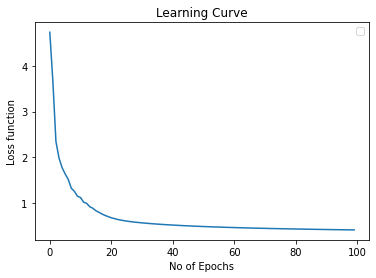

In [ ]:
#Learning curve 

plt.figure() 
plt.title('Learning Curve')
plt.legend('Training Epochs') 
plt.xlabel('No of Epochs')
plt.ylabel('Loss function')
plt.plot(np.arange(len(loss)),loss)
plt.show()

#####Q1d. [Model Evaluation]

---


> a) Find accuracy for the test data

>b) Use confusion_matrix, ConfusionMatrixDisplay from sklearn to display confusion matrix 

>c) Find f1 score, precision, and recall using appropriate sklearn API on test data with average = 'micro'

>d) Find f1 score, precision, and recall using appropriate sklearn API on test data with average = 'macro'

>d) Print labels using helper function view_labels()


In [ ]:
def view_labels():
  plt.figure(figsize=(12.94442719,8))
  for i in range(15):
    plt.subplot(3,5,i+1) 
    plt.imshow(train_X[i],cmap='plasma') 
    plt.title('Label (y): {}'.format(train_y[i]))
    plt.axis('off')
  plt.show()

######Solution:

---



In [ ]:
#Accuracy for test set 
test_preds = predict(X_test,w,b) 
print('Accuracy for test set:',accuracy(test_y,test_preds))

Accuracy for test set: 0.888


In [ ]:
from sklearn.metrics import confusion_matrix 
from sklearn.metrics import ConfusionMatrixDisplay 



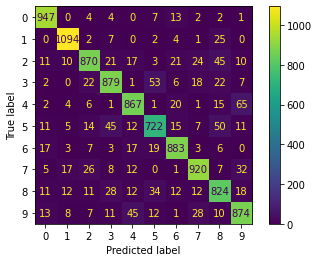

In [ ]:
cm_display = ConfusionMatrixDisplay.from_predictions(test_y, test_preds)
cm_display

In [ ]:
from sklearn.metrics import classification_report 
print(classification_report(test_y, test_preds))

              precision    recall  f1-score   support

           0       0.93      0.97      0.95       980
           1       0.95      0.96      0.96      1135
           2       0.90      0.84      0.87      1032
           3       0.87      0.87      0.87      1010
           4       0.88      0.88      0.88       982
           5       0.85      0.81      0.83       892
           6       0.90      0.92      0.91       958
           7       0.91      0.89      0.90      1028
           8       0.82      0.85      0.83       974
           9       0.86      0.87      0.86      1009

    accuracy                           0.89     10000
   macro avg       0.89      0.89      0.89     10000
weighted avg       0.89      0.89      0.89     10000



In [ ]:
from sklearn.metrics import precision_score 
from sklearn.metrics import recall_score 
from sklearn.metrics import f1_score 


In [ ]:
print('F1 score :', f1_score(test_y,test_preds, average='micro'))
print('precision score :', precision_score(test_y,test_preds, average='micro'))
print('recall score :', recall_score(test_y,test_preds, average='micro'))

F1 score : 0.888
precision score : 0.888
recall score : 0.888


In [ ]:
print('F1 score :', f1_score(test_y,test_preds, average='macro'))
print('precision score :', precision_score(test_y,test_preds, average='macro'))
print('recall score :', recall_score(test_y,test_preds, average='macro'))

F1 score : 0.8862884538542799
precision score : 0.8865169085521666
recall score : 0.8864686155290231


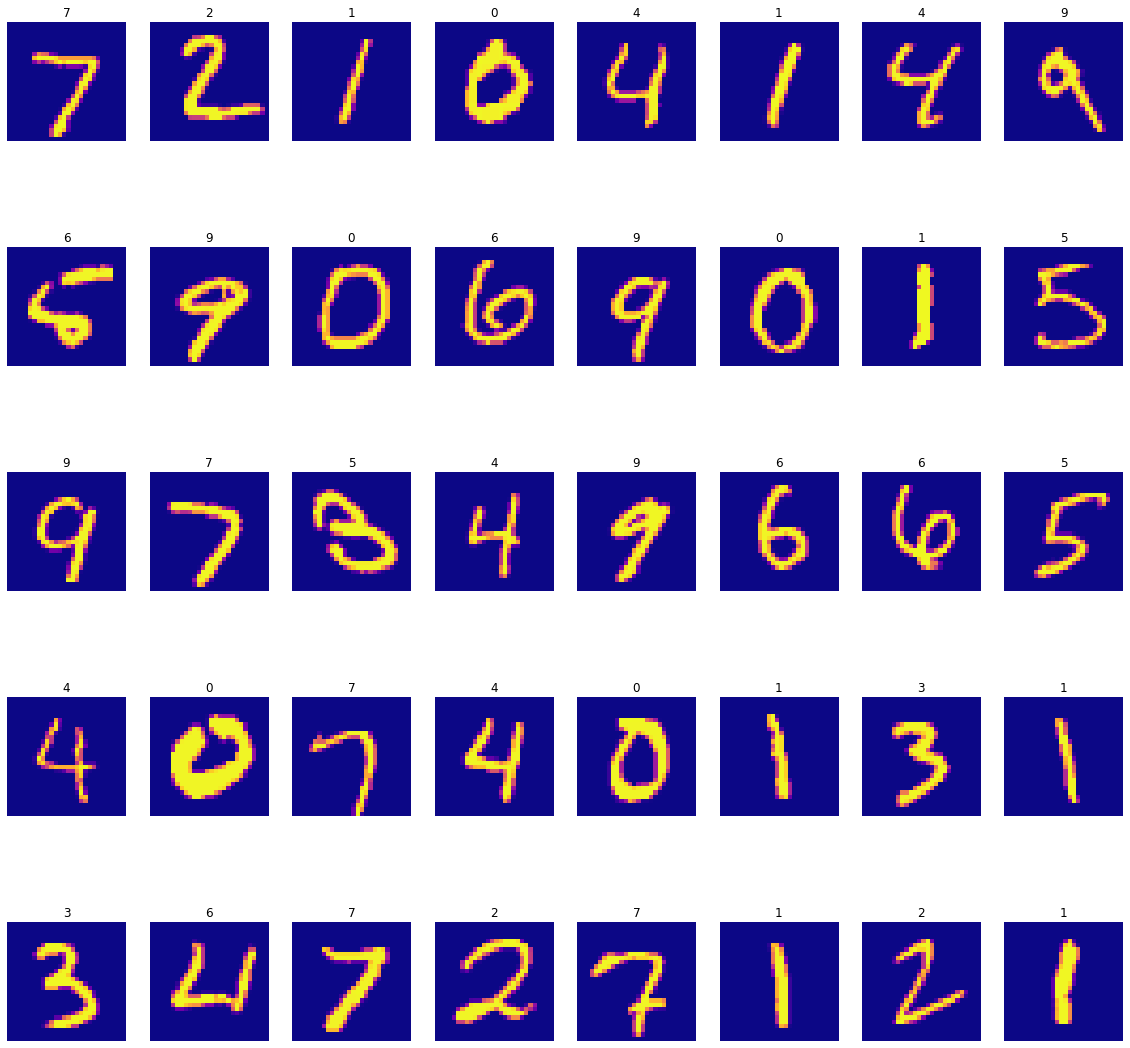

In [ ]:
plt.figure(figsize=(20,20))
for i in range(40):
  plt.subplot(5,8,i+1)
  plt.imshow(test_X[i],cmap='plasma')
  plt.title(test_preds[i])
  plt.axis('off')
plt.show()

###Exercise 3:(KNN Simple Decision Boundary)

---



In [ ]:
 from IPython.display import display, Math, Latex 

 import numpy as np
 import matplotlib.pyplot as plt
 import seaborn as sns

 plt.style.use('seaborn')

 from scipy import stats 
 from sklearn.datasets import make_classification, make_blobs 
 from sklearn.model_selection import train_test_split 


#####Q1a. 
> a) Generate 100 points, each represented with two features and a class label. This dataset is generated for classification task The points are genrated such taht they are clustered in two groups with means  `[0,0]𝑎𝑛𝑑[5,5]`  with standard deviation 1.

> b) Check shapes of feature matrix and label vector

>c) Plot the two classes using a scatter plot

>d) Plot a decision boundary (*Optional*)


######Solution:

---



In [ ]:
X,y = make_blobs(n_samples = 100,
                 n_features =2,
                 centers = [[0,0],[5,5]],
                 cluster_std = 1,
                 random_state=12) 

In [ ]:
def EuclideanDistance(x1,x2):

  dist = np.sum((x1-x2)**2,axis=1)
  return dist

def ManhattanDistance(x1,x2): 
  np.sum(np.abs(x1-x2),axis=1)

In [ ]:
class KNN:
  def __init__(self,k,distance_metric=EuclideanDistance,task_type="Classification"):
    self._k = k 
    self._distance_metric = distance_metric 
    self._task_type = task_type 
  
  def fit(self,X,y):
    #fitting model on data only requires copying the data
    self._X = X 
    self._y = y 
  def predict(self,newExample):

    #newExample is example for which prediction has to be made.
    ''' label: predicted label for newExample
    k_nearest_neighbours_indices : indices of the nearest k neighbours

    '''
    #2. calculate the distance between the new example and every example from 
    # data. Thus create a distance vector.

    distance_vector = self._distance_metric(self._X,newExample)

    # Get indices of nearest k neighbours

    k_nearest_neighbours_indices = np.argpartition(distance_vector,self._k)[:self._k]
    #4 Get the labels of the selected k entries.
    k_nearest_neighbours = self._y[k_nearest_neighbours_indices]
    # If it is a classification task, return the majority class by computing mode 
    #the k labels
    if self._task_type == 'Classification':
      label = stats.mode(k_nearest_neighbours)[0] 
    else:
      label = k_nearest_neighbours.mean() 
    
    return label, k_nearest_neighbours_indices 

  def eval(self, X_test,y_test):
    if self._task_type == 'Classification':
      y_predicted = np.zeros(y_test.shape) 
      for i in range(y_test.shape[0]):
        y_predicted[i],_ = self.predict(X_test[i,:])
      error = np.mean(y_test==y_predicted, axis = 0)
    
    else:
      y_predicted = np.zeros(y_test.shape) 
      for i in range(y_test.shape[0]):
        y_predicted[i],_ = self.predict(X_test[i,:]) 
        error_vector = y_predicted - y_test 
        error = np.sqrt((error_vector.T@error_vector)/error_vector.ravel().shape[0])
    return error
    



In [ ]:
def draw_decision_boundary(model, axis_chart, num_points=201, opacity=0.05):
  tx = np.linspace(np.min(model._X[:,0],axis=0)-2,
                   np.max(model._X[:,0],axis=0)+2, num_points)
  ty = np.linspace(np.min(model._X[:,0],axis=0)-2,
                   np.max(model._X[:,0],axis=0)+2, num_points) 
  xx,yy = np.meshgrid(tx,ty) 
  grid_prediction = np.zeros(xx.shape) 

  for i in range(num_points):
    for j in range(num_points):
      grid_prediction[i][j],_ = model.predict([xx[i][j],yy[i][j]]) 
  
  axis_chart.scatter(xx.ravel(),yy.ravel(),c=grid_prediction.ravel(),alpha=opacity)
  

In [ ]:
#initialize  a model with k=3 and euclidean distance as distance metric 

model = KNN(3,distance_metric=EuclideanDistance) 

model.fit(X,y)  

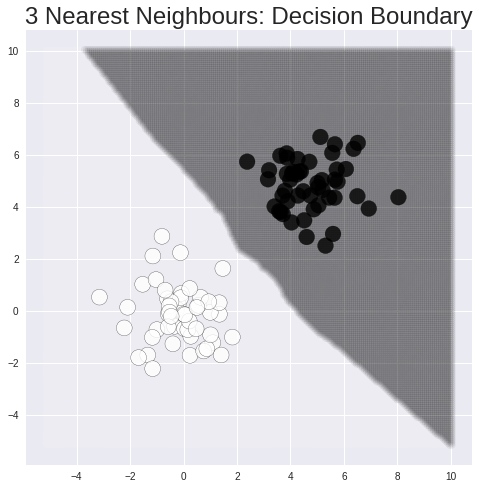

In [ ]:
plt.figure(figsize=(8,8)) 
current_axis = plt.gca() 
plt.grid(True) 
# model=KNN(3,distance_metric=EuclideanDistance)
draw_decision_boundary(model, current_axis) 
plt.scatter(X[:,0],X[:,1],marker='o',c=y, s=250, edgecolor='k',alpha=0.8)
plt.title("3 Nearest Neighbours: Decision Boundary",fontsize=24)
plt.show()

###Exercise 4:(KNN Complex Decision Boundary)

---



#####Q1a. (OPTIONAL)
> a) Use the code provided to generate data for two spirals 

> b) Save the data to X_spiral and y_spiral , check shapes of feature matrix and label vector

>c) Plot a decision boundary 


In [ ]:
def maketwospirals(num_points=1000,rotations =2, noise = .5):
  ''' 
  Parameters:
  num_points: Number of points to be generated per spiral
  rotations : How many times a spiral should rotate
  noise: noise factor 

  Returns
  -------
  coordinates and class vectors of the two spirals 


  ''' 
  n = np.sqrt(np.random.rand(num_points,1))*rotations * (2*np.pi)
  rx = -np.cos(n)*n + np.random.rand(num_points,1) * noise 
  ry =  np.sin(n)*n + np.random.rand(num_points,1)*noise

  return (np.concatenate((np.hstack((rx,ry)),
                          np.hstack((-rx,-ry))),
                         axis=0),
          np.concatenate((np.zeros(num_points),
                          np.ones(num_points)),
                         axis=0)) 
  

######Solution:

---



In [ ]:
X,y = make_blobs(n_samples = 100,
                 n_features =2,
                 centers = [[0,0],[5,5]],
                 cluster_std = 1,
                 random_state=12) 

In [ ]:
def EuclideanDistance(x1,x2):

  dist = np.sum((x1-x2)**2,axis=1)
  return dist

def ManhattanDistance(x1,x2): 
  np.sum(np.abs(x1-x2),axis=1)

In [ ]:
class KNN:
  def __init__(self,k,distance_metric=EuclideanDistance,task_type="Classification"):
    self._k = k 
    self._distance_metric = distance_metric 
    self._task_type = task_type 
  
  def fit(self,X,y):
    #fitting model on data only requires copying the data
    self._X = X 
    self._y = y 
  def predict(self,newExample):

    #newExample is example for which prediction has to be made.
    ''' label: predicted label for newExample
    k_nearest_neighbours_indices : indices of the nearest k neighbours

    '''
    #2. calculate the distance between the new example and every example from 
    # data. Thus create a distance vector.

    distance_vector = self._distance_metric(self._X,newExample)

    # Get indices of nearest k neighbours

    k_nearest_neighbours_indices = np.argpartition(distance_vector,self._k)[:self._k]
    #4 Get the labels of the selected k entries.
    k_nearest_neighbours = self._y[k_nearest_neighbours_indices]
    # If it is a classification task, return the majority class by computing mode 
    #the k labels
    if self._task_type == 'Classification':
      label = stats.mode(k_nearest_neighbours)[0] 
    else:
      label = k_nearest_neighbours.mean() 
    
    return label, k_nearest_neighbours_indices 

  def eval(self, X_test,y_test):
    if self._task_type == 'Classification':
      y_predicted = np.zeros(y_test.shape) 
      for i in range(y_test.shape[0]):
        y_predicted[i],_ = self.predict(X_test[i,:])
      error = np.mean(y_test==y_predicted, axis = 0)
    
    else:
      y_predicted = np.zeros(y_test.shape) 
      for i in range(y_test.shape[0]):
        y_predicted[i],_ = self.predict(X_test[i,:]) 
        error_vector = y_predicted - y_test 
        error = np.sqrt((error_vector.T@error_vector)/error_vector.ravel().shape[0])
    return error
    



In [ ]:
def draw_decision_boundary(model, axis_chart, num_points=201, opacity=0.05):
  tx = np.linspace(np.min(model._X[:,0],axis=0)-2,
                   np.max(model._X[:,0],axis=0)+2, num_points)
  ty = np.linspace(np.min(model._X[:,0],axis=0)-2,
                   np.max(model._X[:,0],axis=0)+2, num_points) 
  xx,yy = np.meshgrid(tx,ty) 
  grid_prediction = np.zeros(xx.shape) 

  for i in range(num_points):
    for j in range(num_points):
      grid_prediction[i][j],_ = model.predict([xx[i][j],yy[i][j]]) 
  
  axis_chart.scatter(xx.ravel(),yy.ravel(),c=grid_prediction.ravel(),alpha=opacity)
  

In [ ]:
#initialize  a model with k=3 and euclidean distance as distance metric 

model = KNN(3,distance_metric=EuclideanDistance) 

model.fit(X,y)  

In [ ]:
def maketwospirals(num_points=1000,rotations =2, noise = .5):
  ''' 
  Parameters:
  num_points: Number of points to be generated per spiral
  rotations : How many times a spiral should rotate
  noise: noise factor 

  Returns
  -------
  coordinates and class vectors of the two spirals 


  ''' 
  n = np.sqrt(np.random.rand(num_points,1))*rotations * (2*np.pi)
  rx = -np.cos(n)*n + np.random.rand(num_points,1) * noise 
  ry =  np.sin(n)*n + np.random.rand(num_points,1)*noise

  return (np.concatenate((np.hstack((rx,ry)),
                          np.hstack((-rx,-ry))),
                         axis=0),
          np.concatenate((np.zeros(num_points),
                          np.ones(num_points)),
                         axis=0)) 
  

In [ ]:
X_spiral, y_spiral = maketwospirals()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: UserWarning: Legend does not support 'C' instances.
A proxy artist may be used instead.
See: http://matplotlib.org/users/legend_guide.html#creating-artists-specifically-for-adding-to-the-legend-aka-proxy-artists
  import sys
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: UserWarning: Legend does not support 'l' instances.
A proxy artist may be used instead.
See: http://matplotlib.org/users/legend_guide.html#creating-artists-specifically-for-adding-to-the-legend-aka-proxy-artists
  import sys
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: UserWarning: Legend does not support 'a' instances.
A proxy artist may be used instead.
See: http://matplotlib.org/users/legend_guide.html#creating-artists-specifically-for-adding-to-the-legend-aka-proxy-artists
  import sys
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: UserWarning: Legend does not support 's' instances.
A proxy artist ma

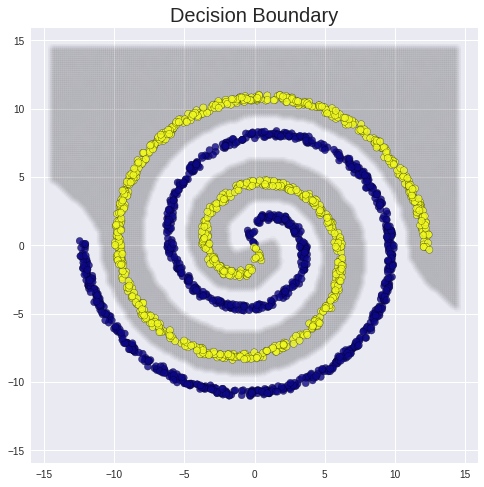

In [ ]:
plt.figure(figsize=(8,8)) 
model = KNN(3) 
model.fit(X_spiral, y_spiral) 
draw_decision_boundary(model,plt.gca(),opacity=0.02) 
plt.scatter(X_spiral[:,0],X_spiral[:,1], marker='o',c = y_spiral, s =50, edgecolor='k',alpha=0.8,cmap='plasma')
plt.title('Decision Boundary',fontsize=20)
plt.legend('Class 1','Class 2')
plt.show()


##Week8 Exercises: ( SVM )

---



###Exercise 1: (Linearly Seperable without noise)

---



Use the following synthetic dataset:

---



In [ ]:
# Given the artificial data points 
X,Y = make_blobs(n_samples=60,n_features =2, centers = [[0,0],[6,6]],
                 cluster_std=1,
                 random_state=12)

Y = np.where(Y == 0 , -1 ,1) 


#####Q1a. Plot the classes for the given dataset using scatter plot

######Solution:

---



In [ ]:

#plot the two classes 
plt.figure(figsize=(8,8)) 
plt.scatter(X[:,0],X[:,1],marker = 'o', c =Y , s =200, edgecolor='k') 
plt.xlabel('x1',fontsize=20) 
plt.ylabel('x2',fontsize=20) 
plt.title('Data points',fontsize = 20) 
plt.show()


#####Q1b. Fit a softSVM with C=1 and plot the decision boundary

######Solution:

---



In [ ]:
class softSVM:

  def __init__(self,C):
    self._support_vectors = None 
    self.C = C
    self.w = None 
    self.b = None 
    self.X = None 
    self.y = None 

    # n is the number of data points 
    self.n = 0 
    # d is the number of dimensions 
    self.d = 0 

  def __decision_function(self,X):
    return X.dot(self.w) + self.b 

  def __cost(self,margin):
    return (1/2)*(self.w).dot(self.w) + self.C*np.sum(np.maximum(0,1-margin))
  
  def __margin(self, X,y):
    return y*self.__decision_function(X) 

  def fit(self,X,y, lr=1e-3, epochs=500):
    # Initialize w and b 
    self.n, self.d = X.shape 
    self.w = np.random.randn(self.d) 
    self.b = 0 

    #required only for plotting 
    self.X = X 
    self.y = y 

    loss_array = []
    
    for _ in range(epochs):
      margin = self.__margin(X,y) 
      loss = self.__cost(margin) 
      loss_array.append(loss)

      missclassified_pts_idx = np.where(margin < 1)[0] 
      d_w = self.w - self.C * y[missclassified_pts_idx].dot(X[missclassified_pts_idx]) 

      self.w = self.w - lr * d_w 

      d_b = -self.C * np.sum(y[missclassified_pts_idx]) 
      self.b = self.b - lr * d_b 
    self._support_vectors = np.where(self.__margin(X,y) <= 1)[0] 

  def predict(self,X):
    return np.sign(self.__decision_function(X)) 

  def score(self,X,y):
    p = self.predict(X) 
    return np.mean(y==p) 

  def plot_decision_boundary(self):
    plt.scatter(self.X[:,0],self.X[:,1],c = self.y, marker='o',s = 100, cmap = 'autumn') 

    ax = plt.gca() 
    xlim = ax.get_xlim() 
    ylim = ax.get_ylim() 

    #create grid to evaluate model 

    xx = np.linspace(xlim[0],xlim[1],30) 
    yy = np.linspace(ylim[0],ylim[1],30) 
    YY,XX = np.meshgrid(yy,xx) 
    xy = np.vstack([XX.ravel(),YY.ravel()]).T 
    z = self.__decision_function(xy).reshape(XX.shape) 

    #plot decision boundary and margins 

    ax.contour(XX,YY,z, colors=['g','k','g'],levels = [-1,0,1],
               linestyles=['--','-','--'],linewidths = [2.0,2.0,2.0]) 

    #highlight the support vectors 

    ax.scatter(self.X[:,0][self._support_vectors],
               self.X[:,1][self._support_vectors],s =250,
               linewidth =1 , facecolors = 'none',edgecolors = 'k') 

    plt.xlabel('x1') 
    plt.ylabel('x2') 

    plt.show() 
  

  







In [ ]:
svm = softSVM(C=1) 
svm.fit(X,Y) 

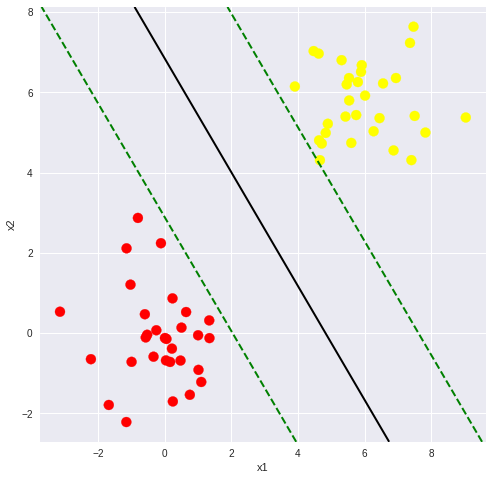

In [ ]:
fig = plt.figure(figsize=(8,8)) 
svm.plot_decision_boundary()

#####Q1c. Fit a softSVM with C=10 and plot the decision boundary

######Solution:

---



In [ ]:
svm = softSVM(C=1) 
svm.fit(X,Y) 

In [ ]:
fig = plt.figure(figsize=(8,8)) 
svm.plot_decision_boundary()

#####Q1d. If` newExample = np.array([-2.2,2.2])`, predict which class it belongs to?

######Solution:

---



In [ ]:
svm.predict(newExample)

#####Q1a.

######Solution:

---



###Exercise 2: (Linearly Seperable with noise)

---



Use the following synthetic dataset:

---



In [ ]:
# Given the artificial data points 
X,y = make_blobs(n_samples = 100, 
                 centers =2, 
                 random_state =0, 
                 cluster_std =1.1) 


Y = np.where(Y == 0 , -1 ,1) 


#####Q1a. Plot the classes for the given dataset using scatter plot

######Solution:

---



In [ ]:

#plot the two classes 
plt.figure(figsize=(8,8)) 
plt.scatter(X[:,0],X[:,1],marker = 'o', c =Y , s =200, edgecolor='k') 
plt.xlabel('x1',fontsize=20) 
plt.ylabel('x2',fontsize=20) 
plt.title('Data points',fontsize = 20) 
plt.show()


#####Q1b. Fit a softSVM with C=1 and plot the decision boundary, print values of w and b

######Solution:

---



In [ ]:
class softSVM:

  def __init__(self,C):
    self._support_vectors = None 
    self.C = C
    self.w = None 
    self.b = None 
    self.X = None 
    self.y = None 

    # n is the number of data points 
    self.n = 0 
    # d is the number of dimensions 
    self.d = 0 

  def __decision_function(self,X):
    return X.dot(self.w) + self.b 

  def __cost(self,margin):
    return (1/2)*(self.w).dot(self.w) + self.C*np.sum(np.maximum(0,1-margin))
  
  def __margin(self, X,y):
    return y*self.__decision_function(X) 

  def fit(self,X,y, lr=1e-3, epochs=500):
    # Initialize w and b 
    self.n, self.d = X.shape 
    self.w = np.random.randn(self.d) 
    self.b = 0 

    #required only for plotting 
    self.X = X 
    self.y = y 

    loss_array = []
    
    for _ in range(epochs):
      margin = self.__margin(X,y) 
      loss = self.__cost(margin) 
      loss_array.append(loss)

      missclassified_pts_idx = np.where(margin < 1)[0] 
      d_w = self.w - self.C * y[missclassified_pts_idx].dot(X[missclassified_pts_idx]) 

      self.w = self.w - lr * d_w 

      d_b = -self.C * np.sum(y[missclassified_pts_idx]) 
      self.b = self.b - lr * d_b 
    self._support_vectors = np.where(self.__margin(X,y) <= 1)[0] 

  def predict(self,X):
    return np.sign(self.__decision_function(X)) 

  def score(self,X,y):
    p = self.predict(X) 
    return np.mean(y==p) 

  def plot_decision_boundary(self):
    plt.scatter(self.X[:,0],self.X[:,1],c = self.y, marker='o',s = 100, cmap = 'autumn') 

    ax = plt.gca() 
    xlim = ax.get_xlim() 
    ylim = ax.get_ylim() 

    #create grid to evaluate model 

    xx = np.linspace(xlim[0],xlim[1],30) 
    yy = np.linspace(ylim[0],ylim[1],30) 
    YY,XX = np.meshgrid(yy,xx) 
    xy = np.vstack([XX.ravel(),YY.ravel()]).T 
    z = self.__decision_function(xy).reshape(XX.shape) 

    #plot decision boundary and margins 

    ax.contour(XX,YY,z, colors=['g','k','g'],levels = [-1,0,1],
               linestyles=['--','-','--'],linewidths = [2.0,2.0,2.0]) 

    #highlight the support vectors 

    ax.scatter(self.X[:,0][self._support_vectors],
               self.X[:,1][self._support_vectors],s =250,
               linewidth =1 , facecolors = 'none',edgecolors = 'k') 

    plt.xlabel('x1') 
    plt.ylabel('x2') 

    plt.show() 
  

  







In [ ]:
y[y==0]=-1 
svm = softSVM(C=1) 
svm.fit(X,y) 
print(svm.w,svm.b) 
fig = plt.figure(figsize=(8,8)) 
svm.plot_decision_boundary()

#####Q1c. Fit a softSVM with C=10, C=100 and plot the decision boundary, print values of w and b

######Solution:

---



In [ ]:
svm = softSVM(C=10) 
svm.fit(X,Y) 
print(svm.w,svm.b) 


In [ ]:
fig = plt.figure(figsize=(8,8)) 
svm.plot_decision_boundary()

#####Q1d. If` newExample = np.array([-2.2,2.2])`, predict which class it belongs to?

######Solution:

---



In [ ]:
svm.predict(newExample)

#####Q1a.

######Solution:

---



###Exercise 3:(softSVM on Linearly non-separable data)

---



Use the following synthetic dataset:

---



In [ ]:
# Given the artificial data points 
from sklearn.datasets import make_circles 
X,y = make_circles(500,factor = 0.5, noise = 0.08) 


y[y==0]=-1 # same as --> Y = np.where(Y == 0 , -1 ,1) 


#####Q1a. Plot the classes for the given dataset using scatter plot

######Solution:

---



In [ ]:
plt.figure(figsize=(10,8)) 
plt.scatter(X[:,0],X[:,1],marker = 'o', c=y, s =200, edgecolor ='k', cmap ='autumn') 
plt.xlabel('x1',fontsize=20) 
plt.ylabel('x2',fontsize =20) 
plt.title('Data points',fontsize =20) 
plt.show()

#####Q1b. Fit a softSVM with C=1,10,100 and plot the decision boundary, print values of w and b

######Solution:

---



In [ ]:
class softSVM:

  def __init__(self,C):
    self._support_vectors = None 
    self.C = C
    self.w = None 
    self.b = None 
    self.X = None 
    self.y = None 

    # n is the number of data points 
    self.n = 0 
    # d is the number of dimensions 
    self.d = 0 

  def __decision_function(self,X):
    return X.dot(self.w) + self.b 

  def __cost(self,margin):
    return (1/2)*(self.w).dot(self.w) + self.C*np.sum(np.maximum(0,1-margin))
  
  def __margin(self, X,y):
    return y*self.__decision_function(X) 

  def fit(self,X,y, lr=1e-3, epochs=500):
    # Initialize w and b 
    self.n, self.d = X.shape 
    self.w = np.random.randn(self.d) 
    self.b = 0 

    #required only for plotting 
    self.X = X 
    self.y = y 

    loss_array = []
    
    for _ in range(epochs):
      margin = self.__margin(X,y) 
      loss = self.__cost(margin) 
      loss_array.append(loss)

      missclassified_pts_idx = np.where(margin < 1)[0] 
      d_w = self.w - self.C * y[missclassified_pts_idx].dot(X[missclassified_pts_idx]) 

      self.w = self.w - lr * d_w 

      d_b = -self.C * np.sum(y[missclassified_pts_idx]) 
      self.b = self.b - lr * d_b 
    self._support_vectors = np.where(self.__margin(X,y) <= 1)[0] 

  def predict(self,X):
    return np.sign(self.__decision_function(X)) 

  def score(self,X,y):
    p = self.predict(X) 
    return np.mean(y==p) 

  def plot_decision_boundary(self):
    plt.scatter(self.X[:,0],self.X[:,1],c = self.y, marker='o',s = 100, cmap = 'autumn') 

    ax = plt.gca() 
    xlim = ax.get_xlim() 
    ylim = ax.get_ylim() 

    #create grid to evaluate model 

    xx = np.linspace(xlim[0],xlim[1],30) 
    yy = np.linspace(ylim[0],ylim[1],30) 
    YY,XX = np.meshgrid(yy,xx) 
    xy = np.vstack([XX.ravel(),YY.ravel()]).T 
    z = self.__decision_function(xy).reshape(XX.shape) 

    #plot decision boundary and margins 

    ax.contour(XX,YY,z, colors=['g','k','g'],levels = [-1,0,1],
               linestyles=['--','-','--'],linewidths = [2.0,2.0,2.0]) 

    #highlight the support vectors 

    ax.scatter(self.X[:,0][self._support_vectors],
               self.X[:,1][self._support_vectors],s =250,
               linewidth =1 , facecolors = 'none',edgecolors = 'k') 

    plt.xlabel('x1') 
    plt.ylabel('x2') 

    plt.show() 
  

  







In [ ]:
y[y==0]=-1 
svm = softSVM(C=1) 
svm.fit(X,y) 
print(svm.w,svm.b) 
fig = plt.figure(figsize=(8,8)) 
svm.plot_decision_boundary()

###Exercise 4:(KernelSVM on Linearly non-separable data)

---



Use the following synthetic dataset:

---



In [ ]:
# Given the artificial data points 
import sys

sys.setrecursionlimit(2**10)

from sklearn.datasets import make_circles 
X,y = make_circles(500,factor = 0.5, noise = 0.08) 


y[y==0]=-1 # same as --> Y = np.where(Y == 0 , -1 ,1) 


#####Q1a. Plot the classes for the given dataset using scatter plot

######Solution:

---



In [ ]:
plt.figure(figsize=(10,8)) 
plt.scatter(X[:,0],X[:,1],marker = 'o', c=y, s =200, edgecolor ='k', cmap ='autumn') 
plt.xlabel('x1',fontsize=20) 
plt.ylabel('x2',fontsize =20) 
plt.title('Data points',fontsize =20) 
plt.show()

#####Q1b. 
> a) Instantiate a `SVMDualProblem()` object with `C=1.0,kernel='poly', degree =2` parameters 

> b) Fit the data with lr = 1e-3

> c) Get the score of the data

> d) Plot the decision boundary

######Solution:

---



In [ ]:
import sys

sys.setrecursionlimit(2**10)
svm = SVMDualProblem(C=1.0,kernel='poly', degree =2) 
svm.fit(X,y,lr =1e-3) 
print('train score', svm.score(X,y)) 
svm.plot_decision_boundary()

###Exercise 1:

---



#####Q1a.

######Solution:

---



In [ ]:
df = pd.DataFrame([['overcast', 'hot', 'high', 'FALSE', 'yes'],
['overcast', 'cool', 'normal', 'TRUE', 'yes'],
['overcast', 'mild', 'high', 'TRUE', 'yes'],
['overcast', 'hot', 'normal', 'FALSE', 'yes'],
['rainy', 'mild', 'high', 'FALSE', 'yes'],
['rainy', 'cool', 'normal', 'FALSE', 'yes'],
['rainy', 'cool', 'normal', 'TRUE', 'no'],
['rainy', 'mild', 'normal', 'FALSE', 'yes'],
['rainy', 'mild', 'high', 'TRUE', 'no'],
['sunny', 'hot', 'high', 'FALSE', 'no'],
['sunny', 'hot', 'high', 'TRUE', 'no'],
['sunny', 'mild', 'high', 'FALSE', 'no'],
['sunny', 'cool', 'normal', 'FALSE', 'yes'],
['sunny', 'mild', 'normal', 'TRUE', 'yes']], columns=['outlook','temp','humidity','windy','play'])

##Week9 Exercises: ( Decision Trees )

---



###Exercise 1: Explore dataframe

---



#####Q1. For the dataframe below:


```
df = pd.DataFrame([['overcast', 'hot', 'high', 'FALSE', 'yes'],
['overcast', 'cool', 'normal', 'TRUE', 'yes'],
['overcast', 'mild', 'high', 'TRUE', 'yes'],
['overcast', 'hot', 'normal', 'FALSE', 'yes'],
['rainy', 'mild', 'high', 'FALSE', 'yes'],
['rainy', 'cool', 'normal', 'FALSE', 'yes'],
['rainy', 'cool', 'normal', 'TRUE', 'no'],
['rainy', 'mild', 'normal', 'FALSE', 'yes'],
['rainy', 'mild', 'high', 'TRUE', 'no'],
['sunny', 'hot', 'high', 'FALSE', 'no'],
['sunny', 'hot', 'high', 'TRUE', 'no'],
['sunny', 'mild', 'high', 'FALSE', 'no'],
['sunny', 'cool', 'normal', 'FALSE', 'yes'],
['sunny', 'mild', 'normal', 'TRUE', 'yes']], columns=['outlook','temp','humidity','windy','play'])
```
- Q1a. Find the shape of df
- Q1b. Find the keys of df
- Q1c. Find the valus of df
- Q1d. Use np.finfo with float as its parameter and create a eps variable to avoid division by zero issues


######Solution:

---



In [ ]:
df = pd.DataFrame([['overcast', 'hot', 'high', 'FALSE', 'yes'],
['overcast', 'cool', 'normal', 'TRUE', 'yes'],
['overcast', 'mild', 'high', 'TRUE', 'yes'],
['overcast', 'hot', 'normal', 'FALSE', 'yes'],
['rainy', 'mild', 'high', 'FALSE', 'yes'],
['rainy', 'cool', 'normal', 'FALSE', 'yes'],
['rainy', 'cool', 'normal', 'TRUE', 'no'],
['rainy', 'mild', 'normal', 'FALSE', 'yes'],
['rainy', 'mild', 'high', 'TRUE', 'no'],
['sunny', 'hot', 'high', 'FALSE', 'no'],
['sunny', 'hot', 'high', 'TRUE', 'no'],
['sunny', 'mild', 'high', 'FALSE', 'no'],
['sunny', 'cool', 'normal', 'FALSE', 'yes'],
['sunny', 'mild', 'normal', 'TRUE', 'yes']], columns=['outlook','temp','humidity','windy','play'])

In [ ]:
df.shape

(14, 5)

In [ ]:
df.keys()

Index(['outlook', 'temp', 'humidity', 'windy', 'play'], dtype='object')

In [ ]:
df.values

array([['overcast', 'hot', 'high', 'FALSE', 'yes'],
       ['overcast', 'cool', 'normal', 'TRUE', 'yes'],
       ['overcast', 'mild', 'high', 'TRUE', 'yes'],
       ['overcast', 'hot', 'normal', 'FALSE', 'yes'],
       ['rainy', 'mild', 'high', 'FALSE', 'yes'],
       ['rainy', 'cool', 'normal', 'FALSE', 'yes'],
       ['rainy', 'cool', 'normal', 'TRUE', 'no'],
       ['rainy', 'mild', 'normal', 'FALSE', 'yes'],
       ['rainy', 'mild', 'high', 'TRUE', 'no'],
       ['sunny', 'hot', 'high', 'FALSE', 'no'],
       ['sunny', 'hot', 'high', 'TRUE', 'no'],
       ['sunny', 'mild', 'high', 'FALSE', 'no'],
       ['sunny', 'cool', 'normal', 'FALSE', 'yes'],
       ['sunny', 'mild', 'normal', 'TRUE', 'yes']], dtype=object)

In [ ]:
#Used to avoid zero in the denominator
eps = np.finfo(float).eps
eps

2.220446049250313e-16

###Exercise 2: Find Overall Entropy

---



#####Q1. Consider the following dataframe with last column as label with 2 classes 'yes' and 'no'

---



```
df = pd.DataFrame([['overcast', 'hot', 'high', 'FALSE', 'yes'],
['overcast', 'cool', 'normal', 'TRUE', 'yes'],
['overcast', 'mild', 'high', 'TRUE', 'yes'],
['overcast', 'hot', 'normal', 'FALSE', 'yes'],
['rainy', 'mild', 'high', 'FALSE', 'yes'],
['rainy', 'cool', 'normal', 'FALSE', 'yes'],
['rainy', 'cool', 'normal', 'TRUE', 'no'],
['rainy', 'mild', 'normal', 'FALSE', 'yes'],
['rainy', 'mild', 'high', 'TRUE', 'no'],
['sunny', 'hot', 'high', 'FALSE', 'no'],
['sunny', 'hot', 'high', 'TRUE', 'no'],
['sunny', 'mild', 'high', 'FALSE', 'no'],
['sunny', 'cool', 'normal', 'FALSE', 'yes'],
['sunny', 'mild', 'normal', 'TRUE', 'yes']], columns=['outlook','temp','humidity','windy','play'])
```
Q. Find the overall entropy

---




######Solution:

---



In [ ]:
df = pd.DataFrame([['overcast', 'hot', 'high', 'FALSE', 'yes'],
['overcast', 'cool', 'normal', 'TRUE', 'yes'],
['overcast', 'mild', 'high', 'TRUE', 'yes'],
['overcast', 'hot', 'normal', 'FALSE', 'yes'],
['rainy', 'mild', 'high', 'FALSE', 'yes'],
['rainy', 'cool', 'normal', 'FALSE', 'yes'],
['rainy', 'cool', 'normal', 'TRUE', 'no'],
['rainy', 'mild', 'normal', 'FALSE', 'yes'],
['rainy', 'mild', 'high', 'TRUE', 'no'],
['sunny', 'hot', 'high', 'FALSE', 'no'],
['sunny', 'hot', 'high', 'TRUE', 'no'],
['sunny', 'mild', 'high', 'FALSE', 'no'],
['sunny', 'cool', 'normal', 'FALSE', 'yes'],
['sunny', 'mild', 'normal', 'TRUE', 'yes']], columns=['outlook','temp','humidity','windy','play'])

In [ ]:
def find_entropy_whole(df):
    #last column in the dataframe is target variable
    target = df.keys()[-1]

    #initialization
    overall_entropy = 0

    #possible values of the target
    values_in_target = df[target].unique()
    
    for value in values_in_target:
        p = df[target].value_counts()[value] / len(df[target])
        overall_entropy += -p * np.log2(p)
    return overall_entropy


In [ ]:
find_entropy_whole(df)

0.9402859586706309

###Exercise 3: Entropy of each Attribute

---

For the dataset below:


```
df = pd.DataFrame([['overcast', 'hot', 'high', 'FALSE', 'yes'],
['overcast', 'cool', 'normal', 'TRUE', 'yes'],
['overcast', 'mild', 'high', 'TRUE', 'yes'],
['overcast', 'hot', 'normal', 'FALSE', 'yes'],
['rainy', 'mild', 'high', 'FALSE', 'yes'],
['rainy', 'cool', 'normal', 'FALSE', 'yes'],
['rainy', 'cool', 'normal', 'TRUE', 'no'],
['rainy', 'mild', 'normal', 'FALSE', 'yes'],
['rainy', 'mild', 'high', 'TRUE', 'no'],
['sunny', 'hot', 'high', 'FALSE', 'no'],
['sunny', 'hot', 'high', 'TRUE', 'no'],
['sunny', 'mild', 'high', 'FALSE', 'no'],
['sunny', 'cool', 'normal', 'FALSE', 'yes'],
['sunny', 'mild', 'normal', 'TRUE', 'yes']], columns=['outlook','temp','humidity','windy','play'])
```

- Q. Print the entropy of each attribute

######Solution:

---



In [ ]:
df = pd.DataFrame([['overcast', 'hot', 'high', 'FALSE', 'yes'],
['overcast', 'cool', 'normal', 'TRUE', 'yes'],
['overcast', 'mild', 'high', 'TRUE', 'yes'],
['overcast', 'hot', 'normal', 'FALSE', 'yes'],
['rainy', 'mild', 'high', 'FALSE', 'yes'],
['rainy', 'cool', 'normal', 'FALSE', 'yes'],
['rainy', 'cool', 'normal', 'TRUE', 'no'],
['rainy', 'mild', 'normal', 'FALSE', 'yes'],
['rainy', 'mild', 'high', 'TRUE', 'no'],
['sunny', 'hot', 'high', 'FALSE', 'no'],
['sunny', 'hot', 'high', 'TRUE', 'no'],
['sunny', 'mild', 'high', 'FALSE', 'no'],
['sunny', 'cool', 'normal', 'FALSE', 'yes'],
['sunny', 'mild', 'normal', 'TRUE', 'yes']], columns=['outlook','temp','humidity','windy','play'])

In [ ]:
def find_entropy_of_attribute(df, attribute):
    target = df.keys()[-1]
    values_in_target = df[target].unique()
    values_in_attribute = df[attribute].unique()
    entropy_attribute = 0
    for value_in_attribute in values_in_attribute:
        overall_entropy = 0
        for value_in_target in values_in_target:
            num = len(df[attribute][df[attribute] == value_in_attribute][df[target] == value_in_target])
            den = len(df[attribute][df[attribute] == value_in_attribute])
            p = num / (den + eps)
            overall_entropy += -p * np.log2(p + eps)
        p2 = den / len(df)
        entropy_attribute += -p2 * overall_entropy
    return abs(entropy_attribute)

In [ ]:
#Used to avoid zero in the denominator
eps = np.finfo(float).eps
eps

In [ ]:
for attribute in df.keys()[:-1]:
    print(f'Entropy of the attribute "{attribute}" is :', find_entropy_of_attribute(df, attribute))

Entropy of the attribute "outlook" is : 0.6935361388961914
Entropy of the attribute "temp" is : 0.9110633930116756
Entropy of the attribute "humidity" is : 0.7884504573082889
Entropy of the attribute "windy" is : 0.892158928262361


###Exercise 4: Best Attribute to Divide

---
Use the below dataset to find the best attribute to divide


```
df = pd.DataFrame([['overcast', 'hot', 'high', 'FALSE', 'yes'],
['overcast', 'cool', 'normal', 'TRUE', 'yes'],
['overcast', 'mild', 'high', 'TRUE', 'yes'],
['overcast', 'hot', 'normal', 'FALSE', 'yes'],
['rainy', 'mild', 'high', 'FALSE', 'yes'],
['rainy', 'cool', 'normal', 'FALSE', 'yes'],
['rainy', 'cool', 'normal', 'TRUE', 'no'],
['rainy', 'mild', 'normal', 'FALSE', 'yes'],
['rainy', 'mild', 'high', 'TRUE', 'no'],
['sunny', 'hot', 'high', 'FALSE', 'no'],
['sunny', 'hot', 'high', 'TRUE', 'no'],
['sunny', 'mild', 'high', 'FALSE', 'no'],
['sunny', 'cool', 'normal', 'FALSE', 'yes'],
['sunny', 'mild', 'normal', 'TRUE', 'yes']], columns=['outlook','temp','humidity','windy','play'])
```




######Solution:

---



In [ ]:
df = pd.DataFrame([['overcast', 'hot', 'high', 'FALSE', 'yes'],
['overcast', 'cool', 'normal', 'TRUE', 'yes'],
['overcast', 'mild', 'high', 'TRUE', 'yes'],
['overcast', 'hot', 'normal', 'FALSE', 'yes'],
['rainy', 'mild', 'high', 'FALSE', 'yes'],
['rainy', 'cool', 'normal', 'FALSE', 'yes'],
['rainy', 'cool', 'normal', 'TRUE', 'no'],
['rainy', 'mild', 'normal', 'FALSE', 'yes'],
['rainy', 'mild', 'high', 'TRUE', 'no'],
['sunny', 'hot', 'high', 'FALSE', 'no'],
['sunny', 'hot', 'high', 'TRUE', 'no'],
['sunny', 'mild', 'high', 'FALSE', 'no'],
['sunny', 'cool', 'normal', 'FALSE', 'yes'],
['sunny', 'mild', 'normal', 'TRUE', 'yes']], columns=['outlook','temp','humidity','windy','play'])

In [ ]:
def find_best_attribute_to_divide(df):
    IG = []
    all_attributes = df.keys()[:-1]
    for attribute in all_attributes:
        IG.append(find_entropy_whole(df) - find_entropy_of_attribute(df, attribute))
    index_of_attribute_with_max_IG = np.argmax(IG)
    best_attribute = all_attributes[index_of_attribute_with_max_IG]
    return best_attribute
find_best_attribute_to_divide(df)

'outlook'

###Exercise 5: Build Tree

---

Using the dataframe below:


```
df = pd.DataFrame([['overcast', 'hot', 'high', 'FALSE', 'yes'],
['overcast', 'cool', 'normal', 'TRUE', 'yes'],
['overcast', 'mild', 'high', 'TRUE', 'yes'],
['overcast', 'hot', 'normal', 'FALSE', 'yes'],
['rainy', 'mild', 'high', 'FALSE', 'yes'],
['rainy', 'cool', 'normal', 'FALSE', 'yes'],
['rainy', 'cool', 'normal', 'TRUE', 'no'],
['rainy', 'mild', 'normal', 'FALSE', 'yes'],
['rainy', 'mild', 'high', 'TRUE', 'no'],
['sunny', 'hot', 'high', 'FALSE', 'no'],
['sunny', 'hot', 'high', 'TRUE', 'no'],
['sunny', 'mild', 'high', 'FALSE', 'no'],
['sunny', 'cool', 'normal', 'FALSE', 'yes'],
['sunny', 'mild', 'normal', 'TRUE', 'yes']], columns=['outlook','temp','humidity','windy','play'])
```
- Q. Build a tree


######Solution:

---



In [ ]:
df = pd.DataFrame([['overcast', 'hot', 'high', 'FALSE', 'yes'],
['overcast', 'cool', 'normal', 'TRUE', 'yes'],
['overcast', 'mild', 'high', 'TRUE', 'yes'],
['overcast', 'hot', 'normal', 'FALSE', 'yes'],
['rainy', 'mild', 'high', 'FALSE', 'yes'],
['rainy', 'cool', 'normal', 'FALSE', 'yes'],
['rainy', 'cool', 'normal', 'TRUE', 'no'],
['rainy', 'mild', 'normal', 'FALSE', 'yes'],
['rainy', 'mild', 'high', 'TRUE', 'no'],
['sunny', 'hot', 'high', 'FALSE', 'no'],
['sunny', 'hot', 'high', 'TRUE', 'no'],
['sunny', 'mild', 'high', 'FALSE', 'no'],
['sunny', 'cool', 'normal', 'FALSE', 'yes'],
['sunny', 'mild', 'normal', 'TRUE', 'yes']], columns=['outlook','temp','humidity','windy','play'])

In [ ]:
def buildTree(df, tree=None):
    target = df.keys()[-1]
    node = find_best_attribute_to_divide(df)
    attValue = np.unique(df[node])
    if tree is None:
        tree = {}
        tree[node] = {}
    for value in attValue:
        subtable = df[df[node] == value].reset_index(drop=True)
        clValue, counts = np.unique(subtable['play'], return_counts=True)
        if len(counts) == 1: #Checking purity of subset
            tree[node][value] = clValue[0]
        else:
            tree[node][value] = buildTree(subtable) # Calling the function recusively
    return tree

buildTree(df)

{'outlook': {'overcast': 'yes',
  'rainy': {'windy': {'FALSE': 'yes', 'TRUE': 'no'}},
  'sunny': {'humidity': {'high': 'no', 'normal': 'yes'}}}}

###Exercise 1:

---



#####Q1a.

######Solution:

---



In [ ]:
df = pd.DataFrame([['overcast', 'hot', 'high', 'FALSE', 'yes'],
['overcast', 'cool', 'normal', 'TRUE', 'yes'],
['overcast', 'mild', 'high', 'TRUE', 'yes'],
['overcast', 'hot', 'normal', 'FALSE', 'yes'],
['rainy', 'mild', 'high', 'FALSE', 'yes'],
['rainy', 'cool', 'normal', 'FALSE', 'yes'],
['rainy', 'cool', 'normal', 'TRUE', 'no'],
['rainy', 'mild', 'normal', 'FALSE', 'yes'],
['rainy', 'mild', 'high', 'TRUE', 'no'],
['sunny', 'hot', 'high', 'FALSE', 'no'],
['sunny', 'hot', 'high', 'TRUE', 'no'],
['sunny', 'mild', 'high', 'FALSE', 'no'],
['sunny', 'cool', 'normal', 'FALSE', 'yes'],
['sunny', 'mild', 'normal', 'TRUE', 'yes']], columns=['outlook','temp','humidity','windy','play'])

##Week10 Exercises: ( Random Forest, Gradient Boosting )

---



###Exercise 1: Random Forest

---



#####Q1. From sklearn datasets import load_breast_cancer daaset and answer the below questions: 


- Q1a. Sepearate feature matrix `X `and label `y `
- Q1b. Print the shape of `X `and label `y `
- Q1c. Print the feature names
- Q1d. Split the data as training and test set using train_test_split with random_state =1`


######Solution:

---



In [ ]:
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split

bc = load_breast_cancer()
X = bc.data
y = bc.target

print(X.shape, y.shape, type(X), type(y), type(bc))
print()
print(bc.keys())
print()
#print(bc.values())


(569, 30) (569,) <class 'numpy.ndarray'> <class 'numpy.ndarray'> <class 'sklearn.utils.Bunch'>

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])



In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=1)

#####Q2. Write a random forest class and necessary methods to follow steps below and implement the code: 

- Q2a. Instantiate `clf`, a random forest object with `n_trees=10, max_depth=10, max_features = 'sqrt'`

- Q2b. Fit the object with training data
- Q2c. Predict on the test data
- Q2d. Print the accuracy score


---
**Note**: Make use of DecisionTreeClassifier from scikit-learn library for decision tree components

---





######Solution:

---



In [ ]:
import numpy as np 
import pandas as pd
from collections import Counter
from sklearn.tree import DecisionTreeClassifier



In [ ]:
def bag (X,y):
  #Counts the number or rows in the feature matrix
  n_samples = X.shape[0] 

  #Generates a random sample from the  given input.
  indices = np.random.choice(n_samples,size = n_samples,replace=True)
  # Note that the second argument size has been set to the size of 
  # the original sample dataset and replacement has been set to True

  return X[indices], y[indices]

def most_common_label(y):
  counter = Counter(y)
  most_common = counter.most_common(1)[0][0] 
  return most_common

def accuracy(y_true, y_pred):
  accuracy = np.sum(y_true == y_pred)/len(y_true) 
  return accuracy 
  
class RandomForest:
  def __init__(self, n_trees=10, min_samples_split=2, max_depth=100, max_features=None):
    self.n_trees = n_trees #hyperparameter for fixing number of trees to be generated
    self.min_samples_split = min_samples_split # min no of samples required for split
    self.max_depth=max_depth #maximum depth of decision tree
    self.max_features = max_features #maximum no of features to be considered
    self.trees = [] 
    
  def fit(self,X,y):
    self.trees =[] #Empty array of trees which gets filled in during operations.
    for _ in range(self.n_trees): #we are using underscore we are just repeating the operations.
      tree = DecisionTreeClassifier( #we will now make RF class inherit features from Sklearn'
                                    min_samples_split = self.min_samples_split,
                                    max_depth = self.max_depth,
                                    max_features=self.max_features
                                  
          
      )
      X_sample, y_sample = bag(X,y) 
      tree.fit(X_sample,y_sample) 
      self.trees.append(tree) # we will append each of these tree.

  def predict(self,X):

    tree_predict = np.array([tree.predict(X) for tree in self.trees])
    tree_predict = np.swapaxes(tree_predict,0,1) #each of the trees will give out predictions
    y_pred = [most_common_label(tree_pred) for tree_pred in tree_predict] 
    return np.array(y_pred) 

  
  



In [ ]:
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split

bc = load_breast_cancer()
X = bc.data
y = bc.target

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=1)

In [ ]:
clf = RandomForest(n_trees=10, max_depth=10, max_features = 'sqrt') 

clf.fit(X_train,y_train) 
y_pred = clf.predict(X_test) 
acc = accuracy(y_test, y_pred) 

print("Accuracy:", acc) 

Accuracy: 0.956140350877193


#####Q3. Get necessary inferences as below: 

- Q3a. Print a classification report

- Q3b. Print a confusion matrix using both sklearn and seaborn libraries
- Q3c. Import and print ConfusionMatrixDisplay 



---
**Note**: Make use of DecisionTreeClassifier from scikit-learn library for decision tree components

---





######Solution:

---



In [ ]:
from sklearn.metrics import confusion_matrix 
matrix = confusion_matrix(y_test, y_pred) 
matrix 


array([[38,  4],
       [ 1, 71]])

In [ ]:
from sklearn.metrics import classification_report 
print(classification_report(y_test,y_pred)) 


              precision    recall  f1-score   support

           0       0.97      0.90      0.94        42
           1       0.95      0.99      0.97        72

    accuracy                           0.96       114
   macro avg       0.96      0.95      0.95       114
weighted avg       0.96      0.96      0.96       114



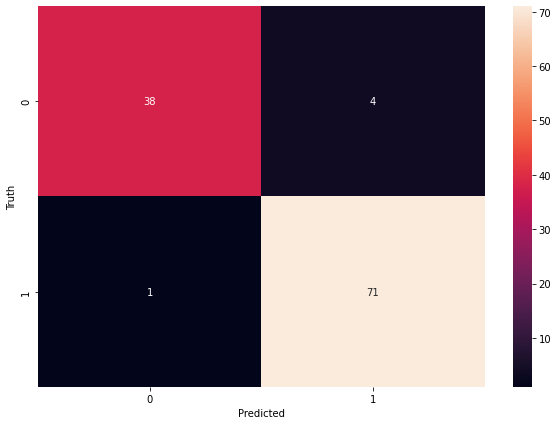

In [ ]:
import matplotlib.pyplot as plt 
import seaborn as sns
plt.figure(figsize=(10,7))
sns.heatmap(matrix,annot=True) 
plt.xlabel("Predicted") 
plt.ylabel('Truth') 
plt.show()

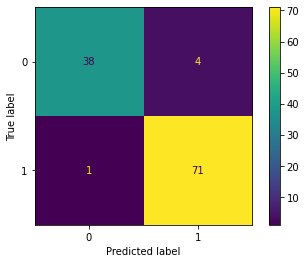

In [ ]:
from sklearn.metrics import ConfusionMatrixDisplay 
cm = ConfusionMatrixDisplay
cm.from_predictions(y_test,y_pred)
plt.show()

###Exercise 2: Gradient Bossting

---



#####Q1. Use the following dataset:



```
from sklearn.datasets import make_regression 


X, y = make_regression(
    n_samples=1000,
    n_features = 20,
    n_informative =15,
    n_targets =1,
    bias = 0.0,
    noise=20,
    shuffle=True,
    random_state=13
)

x_train = X[0:800] 
y_train = y[0:800] 

x_test = X[800:] 
y_test = y[800:] 
```



```
mse_train = [] 
n_rounds = np.arange(5,101,5) 
for n_round in n_rounds:
  y_hat_train = GradBoost(model, 
                          x_train,
                          y_train,
                          x_test,
                          boosting_rounds=n_round,
                          learning_rate=0.1)[0]   #gradboos returns 2 values so [0] picks first see above code 
  print("round#", n_round) 
  mse_train.append(np.mean((y_train-y_hat_train)**2))    
```


- Q1a. Import `DecisionTreeRegressor` from sklearn and create an object called `model` with paramenters `criterion='squared_error', max_depth=3`
- Q1b. Plot "Training MSE vs. Boosting Rounds"
- Q1c. Note your observations



######Solution:

---



In [ ]:
def GradBoost(model, X_train, y_train, X_test, boosting_rounds, learning_rate: float = 0.1):
  # make a first guess of our training target variable using the mean of y_train
  y_hat_train = np.repeat(np.mean(y_train), len(y_train))

  # initialize the test prediction with the mean of the training target variable
  y_hat_test = np.repeat(np.mean(y_train), len(X_test)) 

  #calculate the residuals from the training data using the first guess
  residuals = y_train - y_hat_train 

  #iterates through the boosting round.
  for i in range(0,boosting_rounds):
    #fit the model to the residuals
    model = model.fit(X_train, residuals) 

    #increment the predicted training y with the pseudo residual * learning rate
    y_hat_train = y_hat_train + learning_rate*model.predict(X_train) 

    #increment the predicted test y as well
    y_hat_test = y_hat_test + learning_rate * model.predict(X_test) 

    #calculate the residuals for the next round 

    residuals = y_train - y_hat_train 
  return y_hat_train, y_hat_test


    



In [ ]:
from sklearn.datasets import make_regression 


X, y = make_regression(
    n_samples=1000,
    n_features = 20,
    n_informative =15,
    n_targets =1,
    bias = 0.0,
    noise=20,
    shuffle=True,
    random_state=13
)

x_train = X[0:800] 
y_train = y[0:800] 

x_test = X[800:] 
y_test = y[800:] 


In [ ]:
from sklearn.tree import DecisionTreeRegressor 
model = DecisionTreeRegressor(criterion='squared_error', max_depth=3) 


In [ ]:
mse_train = [] 
n_rounds = np.arange(5,101,5) 
for n_round in n_rounds:
  y_hat_train = GradBoost(model, 
                          x_train,
                          y_train,
                          x_test,
                          boosting_rounds=n_round,
                          learning_rate=0.1)[0]   #gradboos returns 2 values so [0] picks first see above code 
  print("round#", n_round) 
  mse_train.append(np.mean((y_train-y_hat_train)**2))                         

round# 5
round# 10
round# 15
round# 20
round# 25
round# 30
round# 35
round# 40
round# 45
round# 50
round# 55
round# 60
round# 65
round# 70
round# 75
round# 80
round# 85
round# 90
round# 95
round# 100


Text(0, 0.5, 'Training Mean Squared Error')

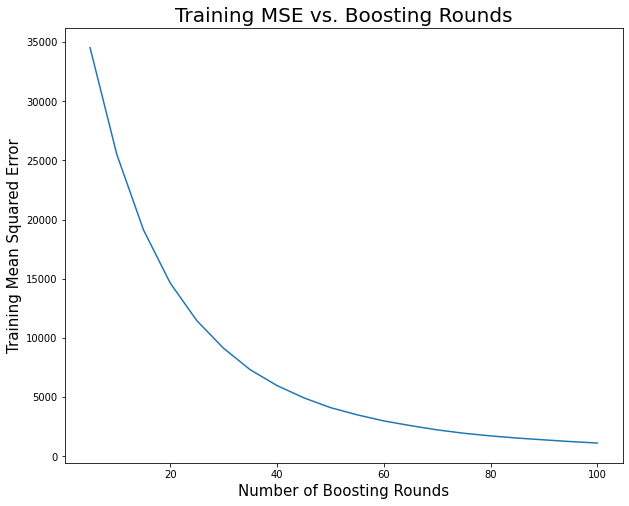

In [ ]:
plt.rcParams['figure.figsize'] = (10,8) 
plt.plot(n_rounds, mse_train) 
plt.title("Training MSE vs. Boosting Rounds", fontsize=20) 
plt.xlabel('Number of Boosting Rounds', fontsize=15) 
plt.ylabel('Training Mean Squared Error',fontsize=15) 


#####Q2. Use the following dataset:



```
from sklearn.datasets import make_regression 


X, y = make_regression(
    n_samples=1000,
    n_features = 20,
    n_informative =15,
    n_targets =1,
    bias = 0.0,
    noise=20,
    shuffle=True,
    random_state=13
)

x_train = X[0:800] 
y_train = y[0:800] 

x_test = X[800:] 
y_test = y[800:] 
```



```
n_rounds = 0 

y_hat_train, y_hat_test = GradBoost(model,
                                    x_train,
                                    y_train,
                                    x_test,
                                    boosting_rounds=n_rounds,
                                    learning_rate=0.1)   
```


- Q1a. Import `DecisionTreeRegressor` from sklearn and create an object called `model` with paramenters `criterion='squared_error', max_depth=3`
- Q1b. Plot 4 plots: Actual vs. Predicted on Training Data with n_rounds = 0, 10, 15, 300 
- Q1c. Note your observations



######Solution:

---



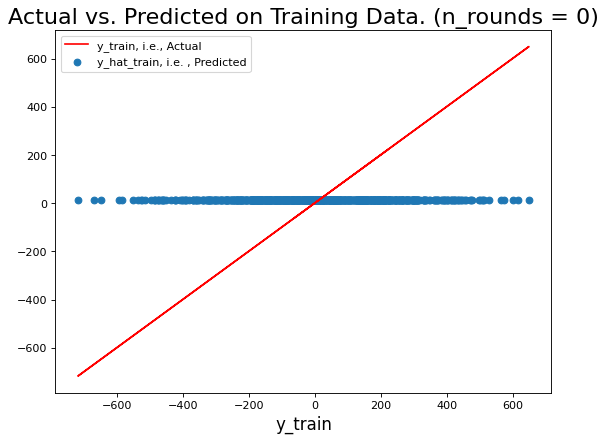

In [ ]:
fig=plt.figure(figsize=(8,6),dpi=80, facecolor='w', edgecolor='k') 

n_rounds = 0 

y_hat_train, y_hat_test = GradBoost(model,
                                    x_train,
                                    y_train,
                                    x_test,
                                    boosting_rounds=n_rounds,
                                    learning_rate=0.1) 

plt.scatter(y_train, y_hat_train, label = 'y_hat_train, i.e. , Predicted') 
plt.title('Actual vs. Predicted on Training Data. (n_rounds = '+str(n_rounds)+
          ')', fontsize=20) 
plt.xlabel('y_train', fontsize=15) 
plt.plot(y_train, y_train, color='r', label = 'y_train, i.e., Actual') 
plt.legend()
plt.show()

boosting_rounds=10
We can see how the prediction gets better as the number of training rounds is increased to 10.


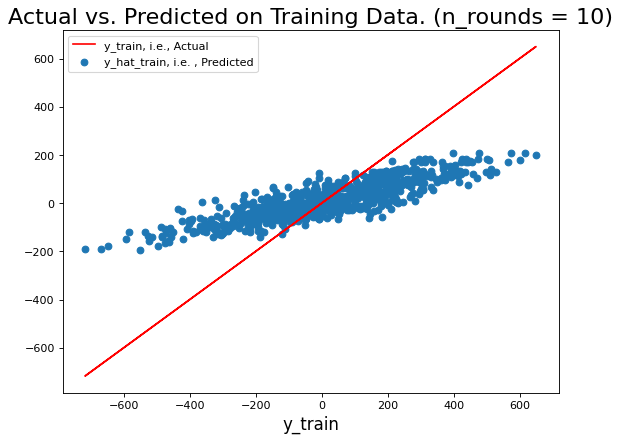

In [ ]:
fig=plt.figure(figsize=(8,6),dpi=80, facecolor='w',edgecolor='k' )

n_rounds=10
y_hat_train, y_hat_test = GradBoost(model,
                                    x_train,
                                    y_train,
                                    x_test,
                                    boosting_rounds=n_rounds,
                                    learning_rate=0.1) 

plt.scatter(y_train, y_hat_train, label = 'y_hat_train, i.e. , Predicted') 
plt.title('Actual vs. Predicted on Training Data. (n_rounds = '+str(n_rounds)+
          ')', fontsize=20) 
plt.xlabel('y_train', fontsize=15) 
plt.plot(y_train, y_train, color='r', label = 'y_train, i.e., Actual') 
plt.legend()
plt.show()

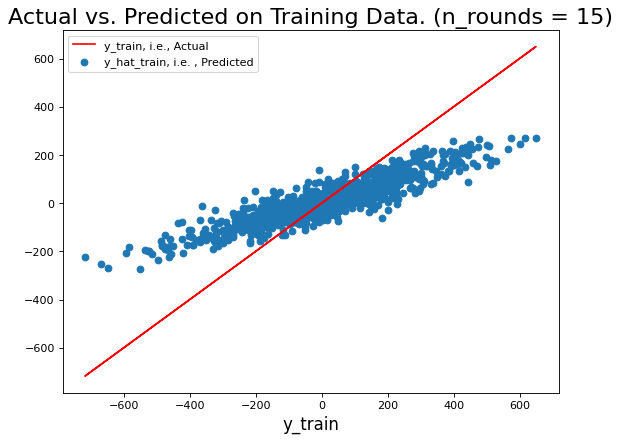

In [ ]:
fig=plt.figure(figsize=(8,6),dpi=80, facecolor='w',edgecolor='k' )

n_rounds=15
y_hat_train, y_hat_test = GradBoost(model,
                                    x_train,
                                    y_train,
                                    x_test,
                                    boosting_rounds=n_rounds,
                                    learning_rate=0.1) 

plt.scatter(y_train, y_hat_train, label = 'y_hat_train, i.e. , Predicted') 
plt.title('Actual vs. Predicted on Training Data. (n_rounds = '+str(n_rounds)+
          ')', fontsize=20) 
plt.xlabel('y_train', fontsize=15) 
plt.plot(y_train, y_train, color='r', label = 'y_train, i.e., Actual') 
plt.legend()
plt.show()

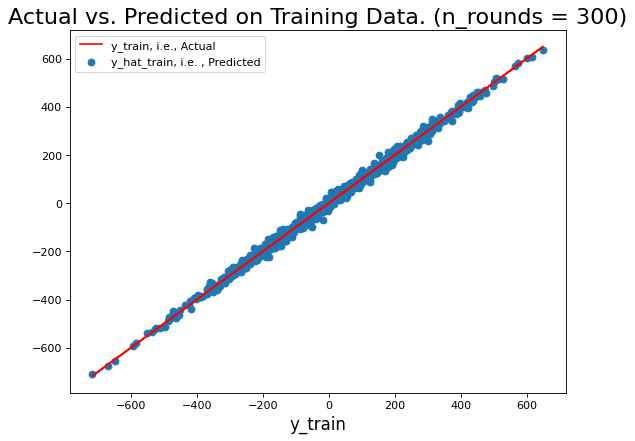

In [ ]:

fig=plt.figure(figsize=(8,6),dpi=80, facecolor='w',edgecolor='k' )

n_rounds=300
y_hat_train, y_hat_test = GradBoost(model,
                                    x_train,
                                    y_train,
                                    x_test,
                                    boosting_rounds=n_rounds,
                                    learning_rate=0.1) 

plt.scatter(y_train, y_hat_train, label = 'y_hat_train, i.e. , Predicted') 
plt.title('Actual vs. Predicted on Training Data. (n_rounds = '+str(n_rounds)+
          ')', fontsize=20) 
plt.xlabel('y_train', fontsize=15) 
plt.plot(y_train, y_train, color='r', label = 'y_train, i.e., Actual') 
plt.legend()
plt.show()

##Week11 Exercises: ( KMeans Clustering )

---



###Exercise 1: 

---



#####Q1. Use the following information and answer the preceeding questions


```
X,y = make_blobs(n_samples=100, n_features=2, centers=3,random_state=1) 
```



```
cluster_count = 3
```


```
from scipy.spatial.distance import cdist
```




- Q1a. Print the shape of `X `and label `y `
- Q1b. Plot a scatter plot from the feature matrix
- Q1c. Use cdist and print labels and find the 
np.argmin(labels,axis=1)
- Q1d. Fit the feature matrix X along with the cluster_count to get the centroids and labels
- Q1e. Plot the KMeans plot


######Solution:

---



In [ ]:
import matplotlib.pyplot as plt 
import seaborn as sns; sns.set() #for plot styling
import numpy as np

from scipy.spatial.distance import cdist 
from sklearn.datasets import make_blobs 



In [ ]:
cluster_count = 3

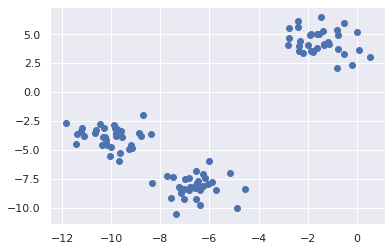

In [ ]:
X,y = make_blobs(n_samples=100, n_features=2, centers=3,random_state=1) 
X.shape
y.shape

plt.scatter(X[:,0],X[:,1])
plt.show()



In [ ]:
np.random.seed(1234)
centroids = X[np.random.randint(0,X.shape[0],size=3)] 
# labels = np.argmin(cdist(X,centroids), axis=1)
labels = cdist(X,centroids)[:5]
print(labels)
np.argmin(labels,axis=1)

[[ 1.60060758 10.13570072 11.50885115]
 [12.44397113  4.57170773  1.05840646]
 [14.10664358  6.79245429  1.26710263]
 [12.01729549  6.00474853  1.42643018]
 [12.48439433  1.49590155  6.8274392 ]]


array([0, 2, 2, 2, 1])

In [ ]:
def fit(X,k):
  # take three random points from data set and take them as initial centroids

  centroids = X[np.random.randint(0,X.shape[0],size=k)] 

  #calculate initial label of each data point
  labels = np.argmin(cdist(X,centroids), axis=1)

  for _iteration in range(10):
    #copy labels for all points for comparing later
    previous_labels =labels.copy()

    #compute new centroids
    centroids = np.array([np.mean(X[labels==r], axis=0) for r in range(k)])  

    #at last recalculate label of each data point 
    labels = np.argmin(cdist(X,centroids),axis=1) 

    #check if labels of points are not cchanging
    if all (labels ==previous_labels):
      break
  return centroids, labels

  



In [ ]:
centroids, labels = fit(X,cluster_count) 



In [ ]:
print('Centroids:',centroids) 


Centroids: [[ -6.58196786  -8.17239339]
 [ -1.4710815    4.33721882]
 [-10.04935243  -3.85954095]]


In [ ]:
def plot_kmeans(X,centroids, labels, rseed=0, ax=None):
  #plot input data

  ax = ax or plt.gca() 
  ax.axis('equal') 

  #plot data points

  ax.scatter(X[:,0],X[:,1],c=labels, s=40, cmap='plasma', zorder=2)

  #plot the representation of the KMeans model.

  radii = [cdist(X[labels==i],[center]).max() for i, center in enumerate(centroids)] 

  for c,r in zip(centroids, radii):
    #add circular shapes to the clusters
    ax.add_patch(plt.Circle(c,r, fc='#CCCCCC',lw =5, alpha=0.5,zorder=1))               

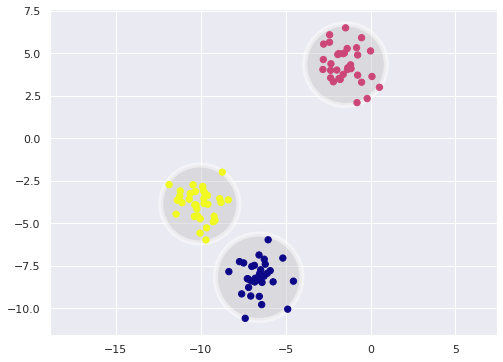

In [ ]:
plt.figure(figsize=(8,6)) 
plot_kmeans(X,centroids, labels)

# Notes

---



### W2 Notes:

1. fit()
2. loss()
3. calculate_gradient()
4. weight_update()
5. gradient_descent()
6. mbgd()
7. sgd()
8. add_dummy_feature()
9. generate_data()
10. preprocess()
11. predict()
12. plot_learning_curves()
13. learning_schedule()



In [ ]:
import numpy as np
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split

In [ ]:
def fit(X,y):
  return np.linalg.pinv(X)@y
def loss(X,y,w):
  e = X@w -y
  return 1/2 * e.T@e 

def calculate_gradient(X,y,w):
  return X.T@(X@w-y)

def update_weights(w,grad,lr):
  return (w - lr*grad)


def gradient_descent(X,y,lr,num_epochs):
  w_all = [] 
  err_all = []
  
  w = np.zeros((X.shape[1])) 
  for i in np.arange(0,num_epochs): 
    w_all.append(w) 
    err_all.append(loss(X,y,w))
    grad = calculate_gradient(X,y,w) 

    if (i%100==0):
      print('Iteration {0}#, loss {1:.2f} : '.format(i,err_all[-1])) 
      w = update_weights(w,grad,lr) 
  return w, err_all, w_all 

import numpy as np
from sklearn.model_selection import train_test_split
def generate_data(n=1000_000):
  w=np.array([4,3])
  X=10*np.random.rand(n)
  X=add_dummy_feature(X)
  noise=np.random.rand(n)
  y= X@w + noise
  return X,y 

def preprocess(X,y):
  X_train,y_train,X_test,y_test = train_test_split(X,y, test_size=0.2, random_state=42) 
  return X_train, y_train,X_test,y_test

def add_dummy_feature(X):
  return np.column_stack((np.ones(X.shape[0]),X))

def predict(X,w):
  return X@w

In [ ]:
def plot_learning_curves(err_all):
  plt.plot(err_all)
  plt.xlabel('Iterations #') 
  plt.ylabel('Loss: $J(\mathbf{w})$')

In [ ]:
t0,t1 = 200,100000 
def learning_schedule(t):
  return t0/(t1+t) 

In [ ]:
def mbgd(X,y,num_epochs,batch_size):
  w_all =[]
  err_all =[] 
  w = np.zeros((X.shape[1])) 
  t = 0 
  for epoch in range(num_epochs):
    shuffled_indices = np.random.permutation(X.shape[0]) 
    X_shuffled = X[shuffled_indices] 
    y_shuffled = y[shuffled_indices] 

    for i in range(0,X.shape[0],batch_size):
      t+=1
      xi= X_shuffled[i:i+batch_size]
      yi= y_shuffled[i:i+batch_size]

      err_all.append(loss(xi,yi,w))

      grad = 2/batch_size * calculate_gradient(xi,yi,w)
      lr = learning_schedule(t) 
      w = update_weights(w,grad,lr) 
      w_all.append(w) 
  return w ,err_all, w_all 


In [ ]:
def sgd(X,y,num_epochs):
  w = np.zeros((X.shape[1])) 
  w_all = []
  err_all =[] 
    
  for epoch in range(num_epochs):
    for i in range(X.shape[0]):
      random_index = np.random.randint((X.shape[0])) 
      xi = X[random_index:random_index+1]
      yi = y[random_index:random_index+1] 
      err_all.append(loss(xi,yi,w))
      w_all.append(w)
      grad = 2* calculate_gradient(xi,yi,w)
      lr = learning_schedule(epoch*X.shape[0]+i)
      w = update_weights(w,grad,lr) 

  return w, err_all,w_all

      

#### Weights Comparision:

---



In [ ]:
X,y = generate_data(100)
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.2, random_state = 42)

X_train.shape, X_test.shape, y_train.shape, y_test.shape #sanity check

((80, 2), (20, 2), (80,), (20,))

In [ ]:
w_ne = fit(X_train,y_train) #normal_equation
w_ne

array([4.43526216, 3.00687915])

In [ ]:
w_gd, _, _ = gradient_descent(X_train, y_train, num_epochs = 1000, lr = 1e-4)
w_gd

Iteration 0#, loss 16258.81 : 
Iteration 100#, loss 9512.16 : 
Iteration 200#, loss 5589.49 : 
Iteration 300#, loss 3308.67 : 
Iteration 400#, loss 1982.41 : 
Iteration 500#, loss 1211.12 : 
Iteration 600#, loss 762.48 : 
Iteration 700#, loss 501.44 : 
Iteration 800#, loss 349.46 : 
Iteration 900#, loss 260.89 : 


array([0.62602137, 3.38241113])

In [ ]:
w_mbgd, _, _ = mbgd(X_train, y_train, num_epochs = 1000, batch_size = 16)
w_mbgd

array([4.39379724, 3.01349563])

In [ ]:
w_sgd,_, _  = sgd(X_train, y_train, num_epochs = 1000)
w_sgd

array([4.43042106, 3.00956334])

In [ ]:
w_ne, w_gd, w_mbgd, w_sgd #weights comparision

(array([4.43526216, 3.00687915]),
 array([0.62602137, 3.38241113]),
 array([4.39379724, 3.01349563]),
 array([4.43042106, 3.00956334]))

Learning Curves:

---



In [ ]:
X,y = generate_data(100)
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.2, random_state = 48)

X_train.shape, X_test.shape, y_train.shape, y_test.shape #sanity check

((80, 2), (20, 2), (80,), (20,))

Iteration 0#, loss 18190.12 : 
Iteration 100#, loss 52105.12 : 
Iteration 200#, loss 149798.95 : 
Iteration 300#, loss 431191.12 : 
Iteration 400#, loss 1241679.44 : 
Iteration 500#, loss 3576094.75 : 
Iteration 600#, loss 10299795.10 : 
Iteration 700#, loss 29665718.00 : 
Iteration 800#, loss 85444357.79 : 
Iteration 900#, loss 246100597.60 : 


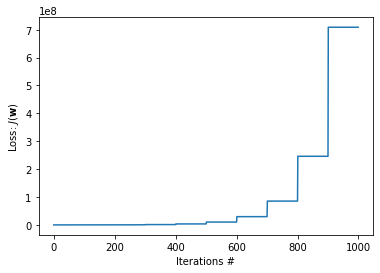

In [ ]:
_, err_all, _ = gradient_descent(X_train, y_train,  lr = 1e-3, num_epochs = 1000)
plot_learning_curves(err_all)

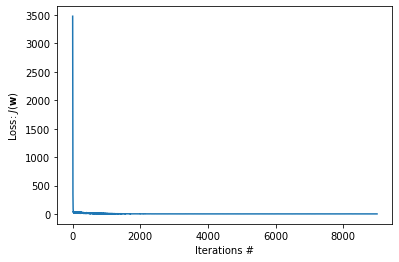

In [ ]:
_, err_all, _ = mbgd(X_train, y_train, num_epochs = 1800, batch_size = 16)
plot_learning_curves(err_all)

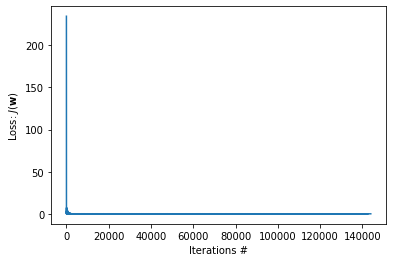

In [ ]:
w , err_all, w_all = sgd(X_train,y_train,num_epochs=1800)
plot_learning_curves(err_all)

### W3 Notes:

####Polynomial regression

This colab implements polynomial regression from scratch with basic python libraties like `numpy`. Recall that polynomial regression is linear regression wtih  an additional step of polynomial transformation.
    
    Features --> polynomial transformation --> Linear regression --> Label
we will use `LinReg` class that implements linear regression model.
We will implement:
* Polynomial transformation function.

A few helper function for 
* Generation of training data with non-linear relationship between features and labels. We generate examples with single features $x_1$ and label $y$.
* Visualization of training data and model fitment.

We use polynomial transformations of different degress for modeling realtionship between input features and labels.Each degree results in a new polynomial model. Thus, we have multiple polynomial models from which we need to select the best performing model. We have implemented the model selection scheme towards the end of this colab.


####polynomial transformation

Steps for generating polynomial transformation of degree *M*.
1. Generate combination of input features of lengths $= 0,1,\ldots, \textit M.$
2. Perform multiplication operation between features to obtain the new features.


For example:
* For a single feature $x_1$ $ \phi_m = [1,x_1^1,x_1^2, \ldots , x_1^m]$
  * Generate combinations of $\{1,x_1,(x_1,x_1), (x_1,x_1,x_1),\ldots, (x_1,x_1), \ldots, (m times)\}$
    * 0-th degree: 1
    * 1st degree: $x_1$
    * 2nd degree: $x_1,x_1$
    * 3rd degree: $x_1,x_1,x_1$
    * mth degree:$(x_1,x_1,x_1,\ldots ,m \ times)$
  * Taking the product of elements in combination:
  

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
def create_nonlin_training_set(func, sample_size,std):
  x = np.linspace(0,1,sample_size)
  y = func(x) + np.random.normal(scale=std, size = x.shape)
  return x,y

def nonlin(x):
  return np.sin(2*np.pi*x)



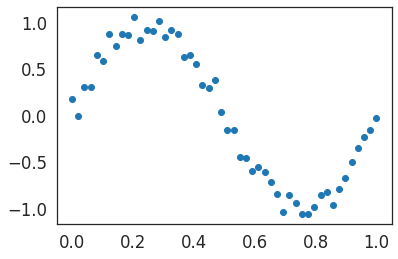

In [ ]:
x ,y = create_nonlin_training_set(nonlin,50,0.1)

plt.scatter(x,y)


### W4 Notes:

###### 
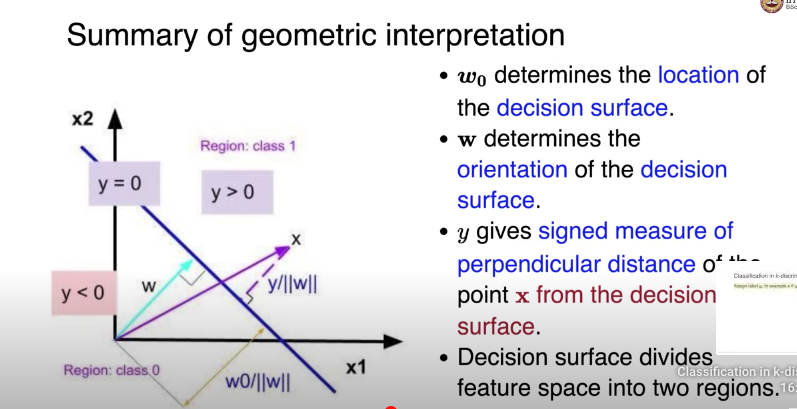

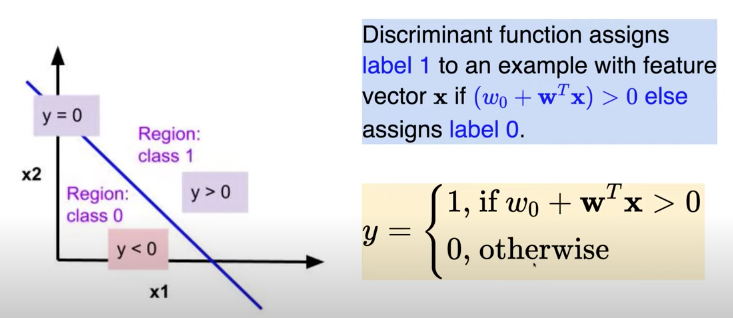

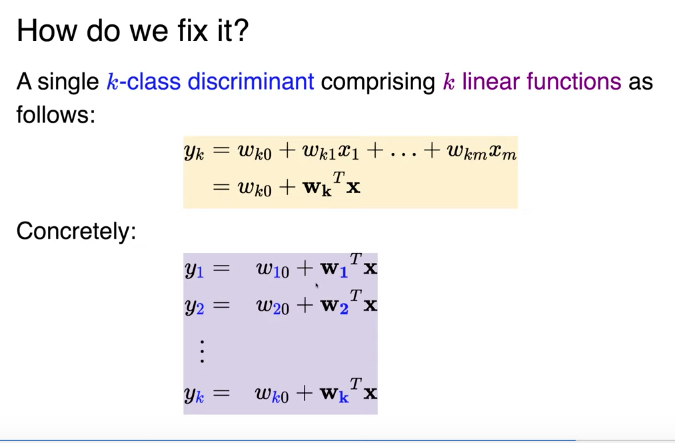

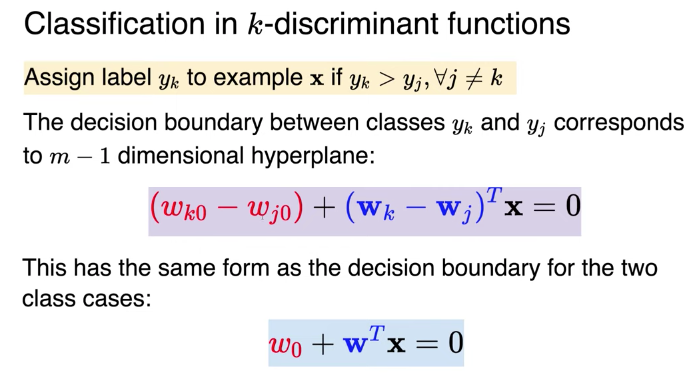

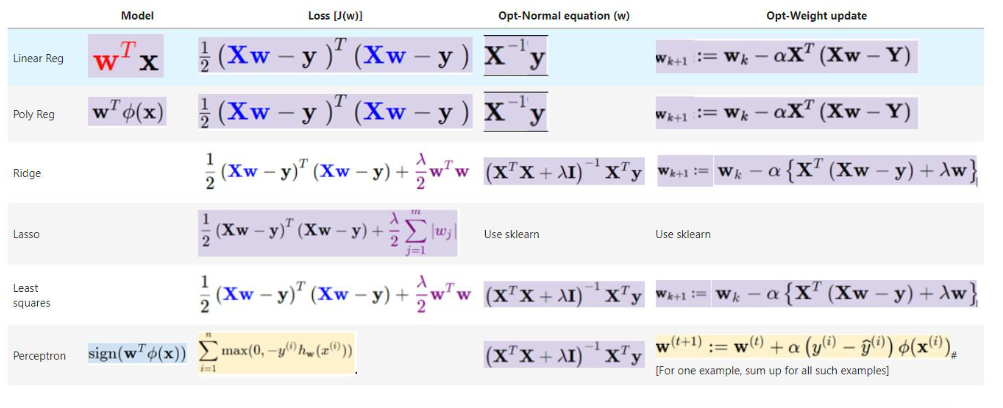

####Least square classifier from scratch 

#Background 

We will implement least square classificaiton from scratch in this colab 

A few points to recall from the theory:

* Least square classification is used for estimating parameters of discriminant function from the given training data.
* Least square classification adapts linear regression model for classification.
 * It uses **least square error** as a **loss funciton**
 * It uses **normal equation** method and **gradient descent** for estimating model parameters or weight vector.
* Since it is a classification algorithm, we would use classification related evaluation metrics such as precision, recall, F-1 score ,AUC ROC/PR, and accuracy.

Additionally note that: 
* We make use of polynomial feature transformation to obtain new features and then use that representation to learn non-linear decision boundaries between classes.

\begin{equation} y= w_0 + \mathbf w^T \phi\mathbf(x) \end{equation} 

where, $ \phi(\mathbf x)$ is a polynomial feature transformation.

* we can tackle issues of overfitting by using ridge or lasso regularizaiton just like linear regression model.


####Label encoding 

since the output $y$ is a discrete quantity, we use one-hot encoding to represent label. For a **binary classification** 
* The label$0$ is represented with $[1,0]$, and 
* The label $1$ is represented with $[0,1]$.

The same scheme is extended to the **multi-class setting**. In general for a $k$ class set up, we use one hot encoding in $k$ components vector. $[y_1,y_2,\ldots, y_k]$ for label $1 \le r \le k, y_r$ would be 1 and other components would be 0.

concretely for a three class classification set up,
* The label $0$ is represented with $[1,0,0]$
* The label $1$ is represented with $[0,1,0]$
* The label $2$ is represented with $[0,0,1]$

IN the following class, we implement, LabelTransformer, that converts discrete label into `one hot encoding`. We are using this implementation from 


In [ ]:
class LabelTransformer(object):
  """ Label encoder decoder 
  Atrributes
  ----------
  n_classes : int 
    number of classes, K
  
  """
  def __init__(self,n_classes:int=None):
    self.n_classes=n_classes 


  @property 
  def n_classes(self):
    return self.__n_classes 


  @n_classes.setter
  def n_classes(self,K):
    self.__n_classes =K 
    self.__encoder =None if K is None else np.eye(K) 
  
  @property 
  def encoder(self):
    return self.__encoder
  
  def encode(self, class_indices:np.ndarray):
    """
    encode class index into one-of-k code 
    Parameters
    ----------
    class_indices : (N,) np.ndarray 
        non-negative class index 
        elements must be integer in [0, n_classes]


    Returns : 
    -------
    (N,K) np.ndarray 
        one-of-K encoding of input 

     """
    if self.n_classes is None: 
        self.n_classes = np.max(class_indices) + 1 
     
    return self.encoder[class_indices] 
  
  def decode(self,onehot:np.ndarray):
    """
    decode one-of-k code into class index 
    parameters
    ----------
    onehot :(N,K) np.ndarray   
    Returns:
    -------
    (N,) np.ndarray 
        class index 
    """
    return np.argmax(onehot, axis=1) 



####Let's demonstrate the `LabelTransformer` with the couple of examples.

Binary classification set up: 


In [ ]:
binary_labels = LabelTransformer(2).encode(np.array([1,0,1,0]))
binary_labels 



array([[0., 1.],
       [1., 0.],
       [0., 1.],
       [1., 0.]])

Multiclass set up with three classes: 


In [ ]:
multiclass_labels =LabelTransformer(3).encode(np.array([1,0,1,2])) 
multiclass_labels



array([[0., 1., 0.],
       [1., 0., 0.],
       [0., 1., 0.],
       [0., 0., 1.]])

####Least square classification implementation

>Training data  

> This representation of label has an impact on the learning set up. Now we have
* A feature matrix $\mathbf X$ of shape $(n,m)$ wher $n$ is the number of examples, $m$ is the number of features.
* A label matrix $\mathbf Y$ of shape $(n,k)$ where $k$ is number of class labels. Note that this set up is similar to multiple regression.

Model

The label matrix is obtained by matrix multiplication of feature matrix and weight **matrix**. After adding a dummy feature of the feature matrix, its shape becomes $n\times(m+1)$.

\begin{equation}  \mathbf Y_{n \times k} =  \mathbf X_{n \times (m+1)} \mathbf W_{(m+1) \times k} \end{equation} 

There is one weight vector per output. Hence the total number of parameters to be estimated = $(m+1) \times k$ 


#### Loss function

This results into the following loss matrix of shape $(k,k)$. 
\begin{eqnarray}  J(\mathbf W) &=&\frac{1}{2} (\mathbf Y_{n \times k} - \mathbf X_{n \times (m+1)} \mathbf W_{(m+1) \times k})^T(\mathbf Y_{n \times k} - \mathbf X_{n \times (m+1)} \mathbf W_{(m+1) \times k}) + \frac{\lambda}{2} \mathbf W^T \mathbf W \\ &=& \frac{1}{2} (\mathbf E^T)_{k \times n}\mathbf E_{n\times k} + \frac{\lambda}{2} \left(\frac{\lambda}{2} \mathbf W^TW \right)_{k \times k} \end{eqnarray}


#### Normal equation
There is almost no code change needed in `fit` function that uses normal equation method for parameter or weight vector estimation: 
\begin{equation} \mathbf W = \left(\mathbf X^TX +  {\color {blue} \lambda}\mathbf {\color {blue} I } \right)^{-1} \mathbf {X^TY}  \end{equation} 

####Iterative optimization (GD,MBGD and SGD) 

The gradient calculation (`calculate_gradient`) for iterative optimization is performed as follows: 
\begin{equation} \frac{\partial J(\mathbf W)}{\partial \mathbf W} = \mathbf{X^T(XW-Y) + {\color {green}{\lambda W}}} \end{equation} 

And the new value of $\mathbf W$ is calculated in vectorized form:

\begin{equation} {\color{red} {\mathbf {W^{new} := W^{old} -\alpha \frac{\partial J (W)}{\partial W}} }} \end{equation}

Inference 

The `predict` funciton for this classification set up is expected to return a discrete quantity (unlike a real number in regression set up) 
* We return the class label with the largest value of linear combination of features among all classes.

####Works for multi-class classification 
> All other functions are adapted from ridge regression and multiple regression colabs.

This implementation is generic enough to work on multi-class set up and also polynomial transformation followed by the least squares classification.



####**Perceptron**
In this colab, we will implement perceptron algorithm from scratch:

####Summary of perceptron components: 

####Training Data 
* Feature matrix: $\mathbf X_{n \times (m+1)} $ includes a dummy feature $x_0$ that is set to 1.
* Label vector: $\mathbf y_{n \times 1}$ 

> Note that perceptron can solve only **binary classification** problems.


####Model 


\begin{eqnarray} h_{\mathbf w} \colon y &=& \text{sign}(\mathbf w^T \phi(\mathbf x)) \\&=& \text {sign}(z)  \end{eqnarray}

where,
* $\mathbf w$ is a weight vector in $ {\Re}^{(m+1)} $
* \begin{equation}  \text {sign} (z)= \begin{cases} +1, \mbox { if $z$ $\ge$ 0}\\-1, \text {otherwise} (i.e. z < 0) \end{cases}  \end{equation} 


####Loss function 
\begin{eqnarray} J(\mathbf w) &=& {\sum}_{i=1}^{n}\\ &=& \sum_{i=1}^{n}\text {max} (-h_{\mathbf w}(\mathbf x^{(i)})y^{(i)},0) \end{eqnarray}


####Optimization procedure (Perceptron update rule) 
1. Initialize $\mathbf w^{(0)} =0$
2. For each training example $(\mathbf x^{(i)},y^{(i)})\colon $
    * $\hat y^{(i)}= \text{sign}(\mathbf w^T \phi(\mathbf x))$[Calculate the ouput value] 
    * $\mathbf w^{(t+1}:= \mathbf w^{(t)}+ \alpha (y^{(i)} -\hat y^{(i)}) \phi(\mathbf x^{(i)})$ [Update the weights] 

> Linear separable examples leads to convergence of the algorightm with zero training loss, else it oscillates. 

####Evaluation metrics 
* Confusion matrix 
* Precision/Recall/F1 

####Implementation 

Let's first import useful libraries for this implementation and visualization.



### W6 Notes:

Image Notes Source: [AnandIyer Colab](https://github.com/ananddotiyer/IIT-M/blob/main/My%20Notes/MLT/Week6.ipynb)


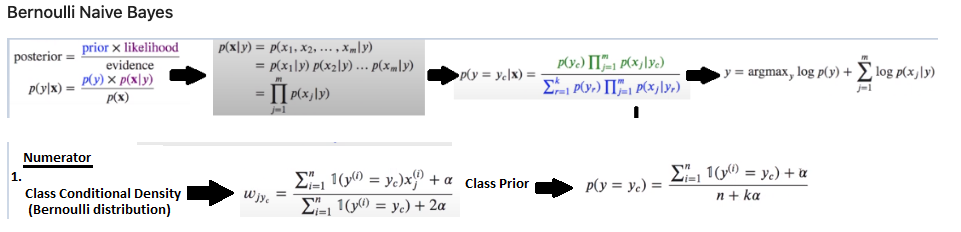

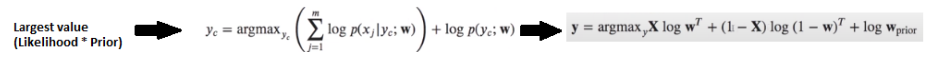

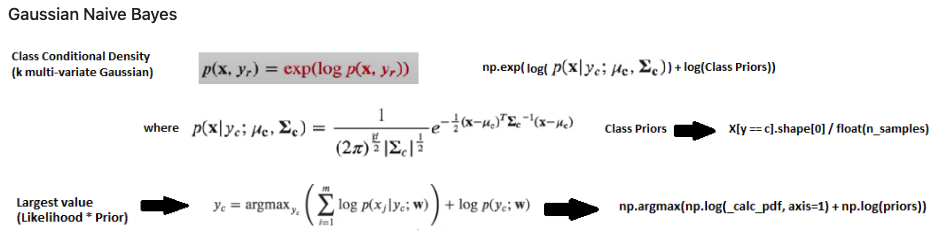

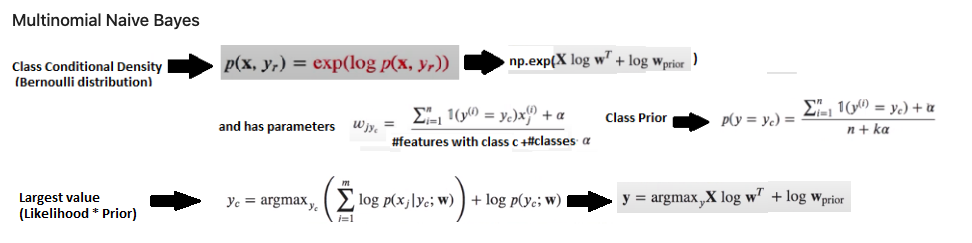

Objective
In this colab we will implement Naive Bayes (NB) classifier from scratch.

Naive Bayes Classifier

* Naive bayes classifier is a **generative classifier**.
* It **estimates probability** of a sample belonging to a class using **Bayes theorem**:
\begin{eqnarray} \text {posterior} &=& \frac{\text {prior} \times \text{likelihood} } { \text {evidence} } \\
 p(y|\mathbf x) &=& \frac{p(y) \times p(\mathbf x |y) }{p(\mathbf x)} \end{eqnarray}

* It simplifies the calculation of **likelihood** with conditional independence assumption: NB assumes that the features are conditionally independent given labels.
 * The **likelihood** can be expressed as: 
 \begin{eqnarray} p(\mathbf x| y) &=& p(x_1,x_2,\ldots,x_m|y) \\
 &=& p(x_1|y) \ p(x_2|y) \ldots\ p(x_m|y) \\
 &=& \prod_{j=1}^{m}p(x_j|y) \end{eqnarray}

* Substituting likelihood in the Bayes theorem gives us the following formula:
\begin{equation}p(y=y_c|\mathbf x)= \frac{p(y_c)\prod_{j=1}^{m}p(x_j|y_c)}{\sum_{r=1}^kp(y_r) \prod_{j=1}^{m}p(x_j|y_r)}\end{equation}


Inference
* We perform this calculation in **log-space** to avoid issues with underflow due to multiplication of small numbers:
 * The label that results in the **highest value of the numerator** i.e $\color{red} { \text {likelihood} \times \text{prior}}$ is assigned to the given example. *Note that the evidence is fixed for all labels and acts as a normalizing constant.* 

\begin{equation} y = \text {argmax}_y \log p(y) + \sum_{j=1}^{m}\log p(x_j|y) \end{equation}

* Posterior probability however needs full calculation of the Bayes formula:
 * We first product of likelihood and prior for each label in log space:
 \begin{equation} \log p(\mathbf x, y_r) =\log p(y_r) + \sum_{j=1}^{m} 
 \log p(x_j|y_r) \end{equation} and convert that to probability by taking

 \begin{equation} p(\mathbf x, y_r)=\color{red} {\exp (\log p(\mathbf x,y_r))}\end{equation}
 * Sum up these probabilities for obtaining the evidence or the denominator of the formula.
 \begin{equation} p(\mathbf x) = \sum_{r=1}^{k} p(\mathbf x,y_r)=\sum_{r=1}^{k} \exp (\log p(\mathbf x,y_r)) \end{equation}
 * Substituting these values one can obtain the posterior probability.
 \begin{equation} p(y_r|\mathbf x) = \frac{p(\mathbf x, y_r)}{p(\mathbf x)}\end{equation}
 
NB classifier is used in applicaiton like **document classification** and **spam filtering**.

 Learning problem

* $k$ prior probabilities to be estimated: $\{p(y_1),p(y_2),\ldots,p(y_k)\}$
* $k \times m$ class conditional probabilities: $\{p(x_1|y_1,\ldots, p(x_m|y_1,p(x_1|y_2),\ldots,p(x_m|y_2),\ldots,p(x_1|y_k),\ldots,p(x_m|y_k)\}$

The class conditional densities depend on the nature of features.

The following are some popular class conditional densities used in NB classifier: 

* **Bernoulli distribution**: when $x_j$ is a **binary feature**, we use Bernoulli distribution to model the class conditional density: $p(x_j|y_c)$.
* **Categorical distribution**: When $x_j$ is a **categorical feature** i.e. it takes one of the $e \gt 2$ discrete values \[e.g. {red,green,blue} or roll of a dice\], we use categorical distribution to model the class conditional density $p(x_j|y_c)$
* **Multinomial distribution**: When $\mathbf x$ is count vector i.e. each component $x_j$ is a count of apperance in the object it represents and $\sum x_j=l$, which is the length of the object, we use multinomial distribution to model $p(\mathbf x|y_c)$
* **Gaussian distribution**: When $x_j$ is a **continuous feature** i.e. it takes a real value, we use gaussian (or normal) distribution to model the class conditional density $p(x_j|y_c)$.

We will implement these different class conditional densities in different NB implementations. We will discuss parameter estimation in detail in the respective sections.

####Bernoulli NB: Implementation

####Parameter estimation: Class conditional density and prior

Remember that the **class conditional density** for Bernoulli NB is calculated as follows:
\begin{equation} w_{y_c} = \frac{\sum_{i=1}^{n} \mathbb {1} (y^{(i)}=y_c)}{n} \end{equation} Here-

* The numerator gives us **total number of examples with label $y_c$ and is divided by the total number of examples in the training set**.

While estimating parameters of the model, we process examples from each label separately and estimate the parameters.



 

A few observations:
* Since there are 50% examples of each class 1 and class 0, the prior probability vector has 0.5 for each class.
* Note that
  * For class 0, $x_1=0 \ \text {and} \ x_2=1$ and hence the parameters of bernoulli distributions are 0 and 1 respectively.
   * $w_{01}=0,w_{02}=1$
* For class 1, $x_1=1 \ \text {and} \ x_2=0$ and hence the parameters of bernoulli distributions are 0 and 1 respectively.
   * $w_{11}=1,w_{21}=0$


Let's understand class conditional density calculation step-by-step:
**STEP 1**: Filter examples for a class, say c=1

 **STEP 1**: Filter examples for a class, say c =1


#### **STEP 2**: Feature wise sum.


#### STEP 3: Dividing by class count

####Incorporating Laplace correction

As we talked in the lecture slides, the 0 value for parameter is a problem as it leads to 0 posterior probability. We can fix this problem with **Laplace correction** or by adding a small dummy counts in each class for each feature.
* The **class priors** with laplace correction can be calculated as follows:

 \begin{equation} p(y=y_c)= \frac{\sum \limits_{i=1}^n 1(y^{(i)}=y_c) + \alpha}{n+k\alpha}\end{equation}
* The class conditional density with laplace correction is computed as follows:
\begin{equation} \frac{\sum \limits_{i=1}^n 1(y^{(i)}=y_c)x_j^{(i)}+\alpha}{\sum \limits_{i=1}^n 1(y^{(i)}=y_c)+2\alpha}\end{equation} In both cases, we use $\alpha=1$. (**Laplace correction or smoothing**)

###Inference 
####Determine class label

Remember that we assign class label $y_c$ that results in the largest product of likelihood and prior.

\begin{eqnarray} y_c &=& \text{argmax}_{y_c}\left(\sum \limits_{j=1}^m \log \ p(x_j|y_c;\mathbf w)\right)+ \log \ p(y_c;\mathbf w) \\
&=& \text{argmax}_{y_c} \left(\sum \limits_{j=1}^m w_{jy_c}^{x_j}(1-w_{jy_c})^{1-x_j}\right)+\log \ p(y_c;\mathbf w)\\
&=& \text{argmax}_{y_c}\left(\sum \limits_{j=1}^m \log \ w_{jy_c}+(1-x_j) \log \ (1-w_{jy_c})\right)+\log \ p(y_c; \mathbf w)\end{eqnarray} 

Note that we perform these computations in log space to avoid problem with underflow.

Further with vectorization, this is implemented as follows:

$y=\text{argmax}_y \mathbf X \log \mathbf w^T + (1-\mathbf X) \log (1-\mathbf w)^T + \log \mathbf w_{\text {prior}} $

####Implementation





#### Gaussian NB: Implementation

####Parameterization 

$ \\ \\ $

Here the features have real numbers or continuous values. And we assume that **each feature given label is drawn from a gaussian distribution.** Formally we write it as
$$ 
x_j|y_r   \sim   \mathcal{N} (\mu , \sigma^2)
$$

There are two parameters in Gaussian or normal distribution $\mathcal{N} :$
* Mean $ \mu $
* Variance $ \sigma^2 $ 

There are $ m \times k $ **Gaussian distribution** - one for each feature and label.

Each Gaussian distribution has 2 parameters to estimate hence the **total number of parameters** are $2 \times m \times k$.

####Alternate parameterization through multi-variate Gaussian

Alternatively, for each label, we can assume a multi-variate Gaussian distribution with $ m $ variables,Such a distribution will have

* a **mean vector** $(\mu)$ with $m$ components - one mean per feature.
* a **covariance matrix** $(\sum ) \text {with} m \times m $ entries-
 * However since we are making a conditional independence assumption among variables, the covariance matrix is assumed to be diagonal-
  * It's off-diagonal entries are $ 0 \sum_{jr}=0 \ \text {where} \ j \ne r$.
  * The diagnonal entries denote variance for each feature $ \sum_{jj}= \sigma^2$.

In this scheme, we need to estimate $k $ multi-variate Gaussian distributions, one per label.

For each distribution, we need to estimate
* $m$ means
* $m$ variances
$\\$
As such the number of parameters are the same in both the representation. However the later representation is more efficient in terms of computation.

####Parameter estimation

Let **$ n_r $ the total number of samples with label** $y_r$.
$$ n_r = \sum \limits_{i=1}^n \mathbb{1}(y^{(i)}=y_r) $$

The parameters for **multivariate Gaussian** for label $r$ can be calculated as follows:
\begin{eqnarray} \mu_r &=&\frac{1}{n_r}\sum \limits_{i=1}^n 1(y^{(i)}=y_r) \mathbf x^{(i)} \\ 
{{\sum}_{jjr}^2}&=&\frac{1}{n_r}\sum \limits_{i=1}^n 1(y^{(i)}=y_r)(\mathbf x^{(i)}-\mu_r)^2 \end{eqnarray}

####Inference 

The posterior probability can be  calculated based on Bayes theorem:
$$ p(y=y_c | \mathbf x) = \frac{p(\mathbf x| y_c) \ p(y_c)}{p(y_c)}$$

The likelihood is computed with following formula:
$$ p(x_j|y_c; \mu_{jc},\sigma_{jc}^2)=\frac{1}{\sqrt {2 \pi} \sigma_{jc}} e^{- \frac{1}{2} \left(\frac{x_j-\mu_{jc}}{\sigma{jc}} \right)^2}$$

This can be implemented with multi-variate Gaussian distribution with diagonal covariance matrix:
$$ p(x_j|y_c; \mu_{jc},{\sum}_c)=\frac{1}{{(2\pi)}^{\frac{d}{2}} |{\sum}_c|^{\frac{1}{2}}}e^{-\frac{1}{2}}(\mathbf x -\mu_c)^T \small \small {\small {\sum}_c^{-1}}(\mathbf x -\mu_c)$$ 

It is interesting to note that
* We calculate the distance between the mean and the sample normalized by the variance: ${-\frac{1}{2}}(\mathbf x -\mu_c)^T \small \small {\small {\sum}_c^{-1}}(\mathbf x -\mu_c)$

* We calculate exponential of this distance and convert it into probability by dividing it with ${{(2\pi)}^{\frac{d}{2}} |{\sum}_c|^{\frac{1}{2}}}$





####Demo

$ \\ \\ $ 
####Binary classification 
* Generates examples from two classes.
* Divide the data into train and test split.
* Train the model on the examples from training set.
* Evaluate the classification performation on the test set.

**STEP 1**: Generate training data with two multi-variate Gaussian distribution one with mean \[5,5\] and the second one with mean \[10,10\] and standard deviation 1.5 for each Gaussian.

* The number of features per example = 2 
* Total number of examples =100



**STEP 2** Train the naive bayes classifier.


Observe that since each examples has two features and we have two classes, we have
* Mean vector for each class has two components-mean for feature 1 and feature 2.
* Variance also has two entries-one for variance of feature 1 and feature 2. Note that we are only storing the diagonal elements of covariance matrix for each class label.

There are two priors-one for each class.

Since we are performing parameter estimation on examples generated from the known distributions, we can compare estimated means with the actual means.

* One distribution has mean close to \[5,5\] and the other one has mean close to \[10,10\] which are **very close to the actual means**.

#####STEP 3: Plot the gaussian distributions.



**STEP 4**: Let's test the inference procedure on the test data.
* Let's get class predictions for the test examples.


Observe that the probability of the new example belonging to class 0, which has mean of \[5,5\], is 0.99, which is much larger than the other class and hence it is assigned class label of 0.
####Multiclass classification 

Our implementation also works for multi-class case.Here is a demo.
* We generate 100 examples from three classes with means $[5,5],[10,10],[20,20]$.
* Each example has two features.



####Multinomial NB: Implementation
We use **multinomial naive Bayes classifier** for problems like **document classification**.
* We represent $i-$th document with a feature vector $ \color{red} { \mathbf x^{(i)}}$ containing counts of words in the vocabulary $\color{red} { \{ x_1^{(i)}, x_2^{(i)},\ldots, x_m^{(i)}\}}$
* The sum of all feature counts is equal to the total number of words in the document: $ \color{red} {\sum \limits_{j=1}^m x_j^{(i)}=l}$ 

In mathematical terms: 
$$ \mathbf x|y_r \sim \text{Multinomial}(w_{1y_r},w_{2y_r},\ldots,w_{my_r}) $$
$$ \sim \text {Multinomial}(\mathbf w_{\mathbf y_r})$$

The **total number of parameters** $=m \times k + k$ where
* $m \times k$ is the total number of features for $k$ multinomial distributions and 
* $k$ is the total number priors.

####Parameter estimation

The $j$-th component of parameters vector $\mathbf w_{\mathbf y_r}$ is calculated as follows:
\begin{equation} w_{jy_r}=\frac{\sum \limits_{i=1}^n1(y^{(i)}=y_r)x_j^{(i)}}{\sum \limits_{i=1}^n1(y^{(i)}=y_r) \sum \limits_{j=1}^m x_j^{(i)}}\end{equation}

Here, 

* The numberator is the **sum of feature** $x_j$ for all examples from $y_r$.
* The denominator is the total count of features from all examples from class $y_r$.

With **Laplace correction**: 
\begin{equation} w_{jy_r}=\frac{\sum \limits_{i=1}^n1(y^{(i)}=y_r)x_j^{(i)}+\alpha}{\sum \limits_{i=1}^n1(y^{(i)}=y_r) \sum \limits_{j=1}^m x_j^{(i)}+m\alpha}\end{equation}

Note that we add $\alpha$ in the numerator and $m\alpha$ in the denominator, correction of $\alpha =1$

Inference 
In log space the calculation is performed as follows:
* In the numerator, we first **multiply** the **count matrix** with **transpose of log of weight vector** and **add** it to the **log of prior probabilitiees**. And **exponentiate** the resulting value.
* In the denominator, we perform the same calculation as numerator but for **different class labels**. And **sum** them up.
* The denominator normalizes numerator between 0 and 1, thus giving us the posterior probability of label $y_c$ for the given count vector $\mathbf x$.

\begin{equation} p(y_c|\mathbf x; l, \mathbf w_{y_c})=\frac{\exp\left(\mathbf X(\log \mathbf w_{\mathbf y_r})^T+\log p(y_c)\right)}{{\sum}_r\exp\left(\mathbf X(\log \mathbf w_{\mathbf y_r})^T+\log p(y_r)\right)}\end{equation}



###W7 Notes:

---



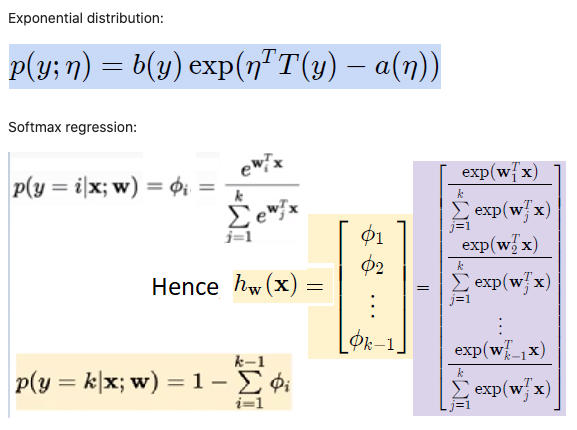

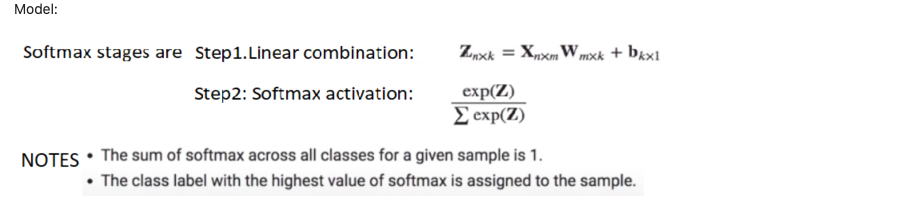

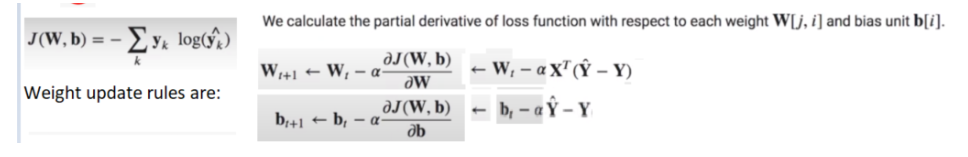

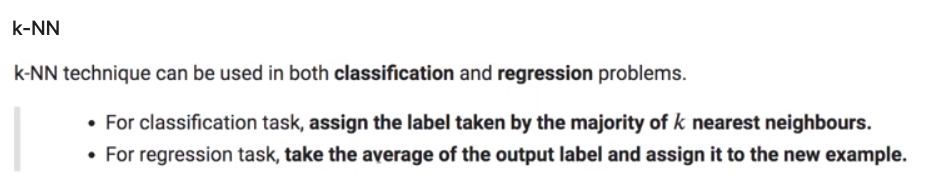

###W8 Notes:

---



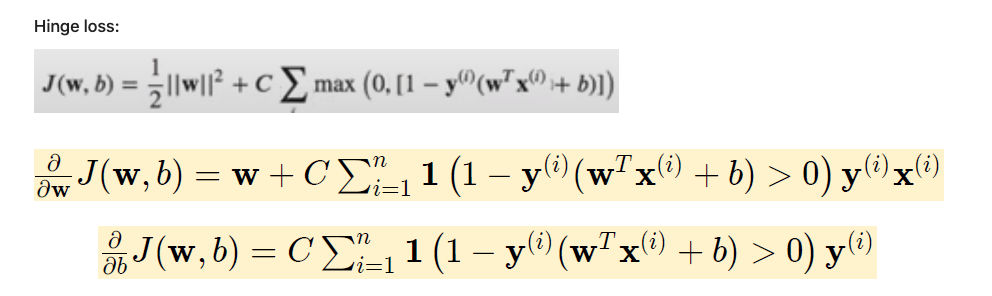

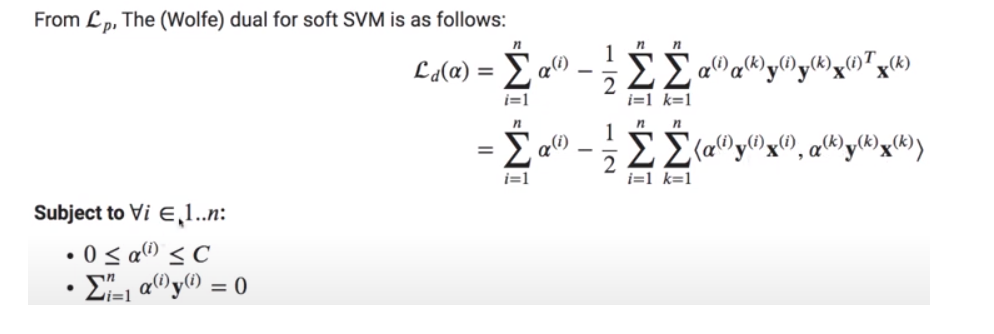

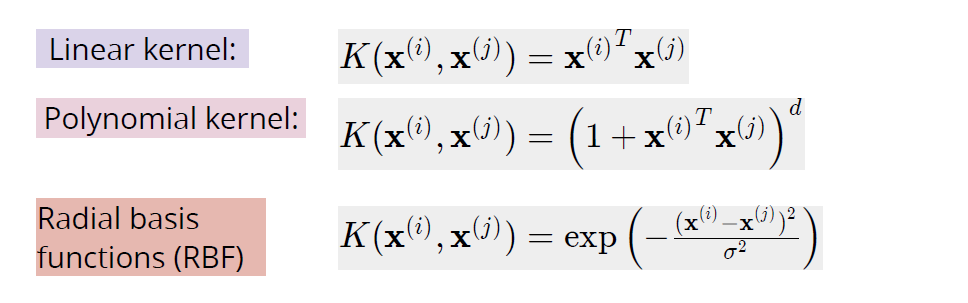

y = np.sign(np.dot(w,x)+b) 

Loss function 

We use **hinge loss** as a loss function: `max(0,1-t)`
* It is equal to 0 when t $ \ge $ 1.
* Its derivative(slope) is equal to -1, if t < 1.
* It is not differentiable at t = -1.



# Misq

### Week5

Week 5:

---


> MLT LiveSession by Karthik




1.   https://youtu.be/PQRLnCUBICw (Jan term )
2.   https://youtu.be/k5VE3LcNMH4 (May term )



---


> Slides

1. Google Drive [Link](https://drive.google.com/drive/folders/1SRmKxen0CBamEsj3JUvstQccB5iKUV3N)


---


> PA, GA Solutions

1. [PA Solutions](https://drive.google.com/drive/folders/10euWj_Ft-AUcdspdqp5YM-vp8X36Pdz6)
2. [GA Solutions](https://drive.google.com/drive/folders/13c4l6JL5tqL17SawwmGNPUj18nmdpzUg)

> Anand's [Notes](https://github.com/ananddotiyer/IIT-M/blob/main/My%20Notes/MLT/Lecture%20Notes.pdf)
---



### Week6

Week 6:

---


> MLT LiveSession by Karthik (May term)


1.   https://www.youtube.com/watch?v=q6-zwrB41rs&t=4076s 
2. https://www.youtube.com/watch?v=0BmqTtoB92I
2. https://www.youtube.com/watch?v=I7BR2mkRggs&t=470s



---


> Slides

1. Google Drive [Link](https://drive.google.com/drive/folders/1Rq-_briT51zK_kY3tJnGnwx6LY4-sFUS)


---


> PA, GA Solutions

1. [PA Solutions](https://drive.google.com/drive/folders/1_98rlR-4KPI7ye5jhqOoh6vGrfnqIsGH)
2. [GA Solutions](https://drive.google.com/drive/folders/13c4l6JL5tqL17SawwmGNPUj18nmdpzUg)

> Anand's [Notes](https://github.com/ananddotiyer/IIT-M/blob/main/My%20Notes/MLT/Lecture%20Notes.pdf)

---



### Week8

Week 8:

---


> MLT LiveSession by Karthik (May term)


1. https://www.youtube.com/watch?v=boQlzzNSrIk
2. https://www.youtube.com/watch?v=RiEs_2NfCcM




---


> Slides

1. Google Drive [Link](https://drive.google.com/drive/folders/1syKqtVfXJABNnfv16_ZPymNjRY-Vwt9Z)


---


> PA, GA Solutions

1. [PA Solutions](https://drive.google.com/drive/folders/1_98rlR-4KPI7ye5jhqOoh6vGrfnqIsGH)
2. [GA Solutions](https://drive.google.com/drive/folders/13c4l6JL5tqL17SawwmGNPUj18nmdpzUg)

> Anand's [Notes](https://github.com/ananddotiyer/IIT-M/blob/main/My%20Notes/MLT/Lecture%20Notes.pdf)

---



### WeekXYZ

Week 5:

---


> MLT LiveSession by Karthik




1.   https://youtu.be/PQRLnCUBICw (Jan term )
2.   https://youtu.be/k5VE3LcNMH4 (May term )



---


> Slides

1. Google Drive [Link](https://drive.google.com/drive/folders/1SRmKxen0CBamEsj3JUvstQccB5iKUV3N)


---


> PA, GA Solutions

1. [PA Solutions](https://drive.google.com/drive/folders/10euWj_Ft-AUcdspdqp5YM-vp8X36Pdz6)
2. [GA Solutions](https://drive.google.com/drive/folders/13c4l6JL5tqL17SawwmGNPUj18nmdpzUg)


> Anand's [Notes](https://github.com/ananddotiyer/IIT-M/blob/main/My%20Notes/MLT/Lecture%20Notes.pdf)
---

